In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

%matplotlib inline
plt.rcParams['figure.figsize'] = 16,9

import warnings
warnings.filterwarnings('ignore')

In [2]:
allBigfish = ["Albacore", "Bluefin Tuna", "Dorado", "Skipjack Tuna", "Yellowfin Tuna", "Yellowtail", "Thresher Shark"]
allSmallfish = ["Barracuda","Barracuda Released", "Black Croaker","Black Seabass Released","Blacksmith",
             "Blue Perch","Bocaccio","Bocaccio Released","Bonito","Brown Rockfish", "Cabezon", "Cabezon Released",
            "Calico Bass", "Calico Bass Released","Copper Rockfish","Halibut","Halibut Released","Jack Mackerel",
               "Lingcod","Mackerel","Mackerel Released","Opaleye","Pacific Halibut Released","Petrale Sole",
               "Rock Sole", "Rockfish","Rockfish Released","Rubberlip Seaperch","Sand Bass","Sand Bass Released",
                "Sanddab","Sargo","Sculpin","Sculpin Released","Sheephead","Sheephead Released","Spanish Jack",
               "Spanish Mackerel","Triggerfish","Vermilion Rockfish","Vermilion Rockfish Released","White Croaker",
               "White Seabass","White Seabass Released","Whitefish","Whitefish Released","Wolf Eel","Yellowfin Croaker"]

In [3]:
daveysdf = pd.read_csv("cleanData-daveys.csv",index_col=0)
#danadf = pd.read_csv("cleanData-dana.csv",index_col=0)

# Cast Date column as Date type
daveysdf.Date = pd.to_datetime(daveysdf.Date)
#danadf.Date = pd.to_datetime(danadf.Date)
daveysdf.head()

,Landing,Date,Boat,Trip Type,Anglers,Albacore,Barracuda,Barracuda Released,Bat Ray Released,Black Croaker,...,Vermilion Rockfish Released,White Croaker,White Seabass,White Seabass Released,Whitefish,Whitefish Released,Wolf Eel,Yellowfin Croaker,Yellowfin Tuna,Yellowtail
0,daveys-locker,2019-01-11,Western Pride,1/2 Day PM,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,daveys-locker,2019-01-12,Western Pride,1/2 Day Twilight,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,daveys-locker,2019-01-19,Western Pride,1/2 Day AM,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,daveys-locker,2019-01-19,Western Pride,1/2 Day Twilight,67,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,daveys-locker,2019-01-20,Western Pride,1/2 Day AM,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set date as index
#daveysdf = daveysdf.set_index(daveysdf['Date'])
#danadf = danadf.set_index(danadf['Date'])

#!#! SETTING INDEX AS DATE CAUSED ERRORS LATER ON WHEN SPLITTING BETWEEN BIG AND SMALL FISH

# Add column of total fish caught(and released)
daveysdf['Total Caught'] = daveysdf.iloc[:,5:-1].sum(axis=1)
#danadf['Total Caught'] = danadf.iloc[:,5:-1].sum(axis=1)
daveysdf.head()

,Landing,Date,Boat,Trip Type,Anglers,Albacore,Barracuda,Barracuda Released,Bat Ray Released,Black Croaker,...,White Croaker,White Seabass,White Seabass Released,Whitefish,Whitefish Released,Wolf Eel,Yellowfin Croaker,Yellowfin Tuna,Yellowtail,Total Caught
0,daveys-locker,2019-01-11,Western Pride,1/2 Day PM,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64
1,daveys-locker,2019-01-12,Western Pride,1/2 Day Twilight,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,166
2,daveys-locker,2019-01-19,Western Pride,1/2 Day AM,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,292
3,daveys-locker,2019-01-19,Western Pride,1/2 Day Twilight,67,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,193
4,daveys-locker,2019-01-20,Western Pride,1/2 Day AM,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,161


In [5]:
# Split by year
daveysdf_2019 = daveysdf[daveysdf['Date'] <= '2019-12-31']
daveysdf_2020 = daveysdf[daveysdf['Date'] >= '2020-01-01']
#danadf_2019 = daveysdf[:'2019-12-31']
#danadf_2020 = daveysdf['2020-01-01':]
daveysdf_2020

,Landing,Date,Boat,Trip Type,Anglers,Albacore,Barracuda,Barracuda Released,Bat Ray Released,Black Croaker,...,White Croaker,White Seabass,White Seabass Released,Whitefish,Whitefish Released,Wolf Eel,Yellowfin Croaker,Yellowfin Tuna,Yellowtail,Total Caught
803,daveys-locker,2020-01-01,Freelance,3/4 Day,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,223
804,daveys-locker,2020-01-01,Western Pride,1/2 Day PM,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,137
805,daveys-locker,2020-01-02,Freelance,3/4 Day,75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,185
806,daveys-locker,2020-01-02,Western Pride,1/2 Day PM,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,144
807,daveys-locker,2020-01-03,Freelance,3/4 Day,77,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,daveys-locker,2020-10-27,Freelance,3/4 Day,39,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,115
1460,daveys-locker,2020-10-27,Thunderbird,1.5 Day,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,daveys-locker,2020-10-27,Western Pride,1/2 Day AM,30,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,261
1462,daveys-locker,2020-10-28,Freelance,3/4 Day,45,0,6,0,0,0,...,0,0,0,0,0,0,0,0,2,107


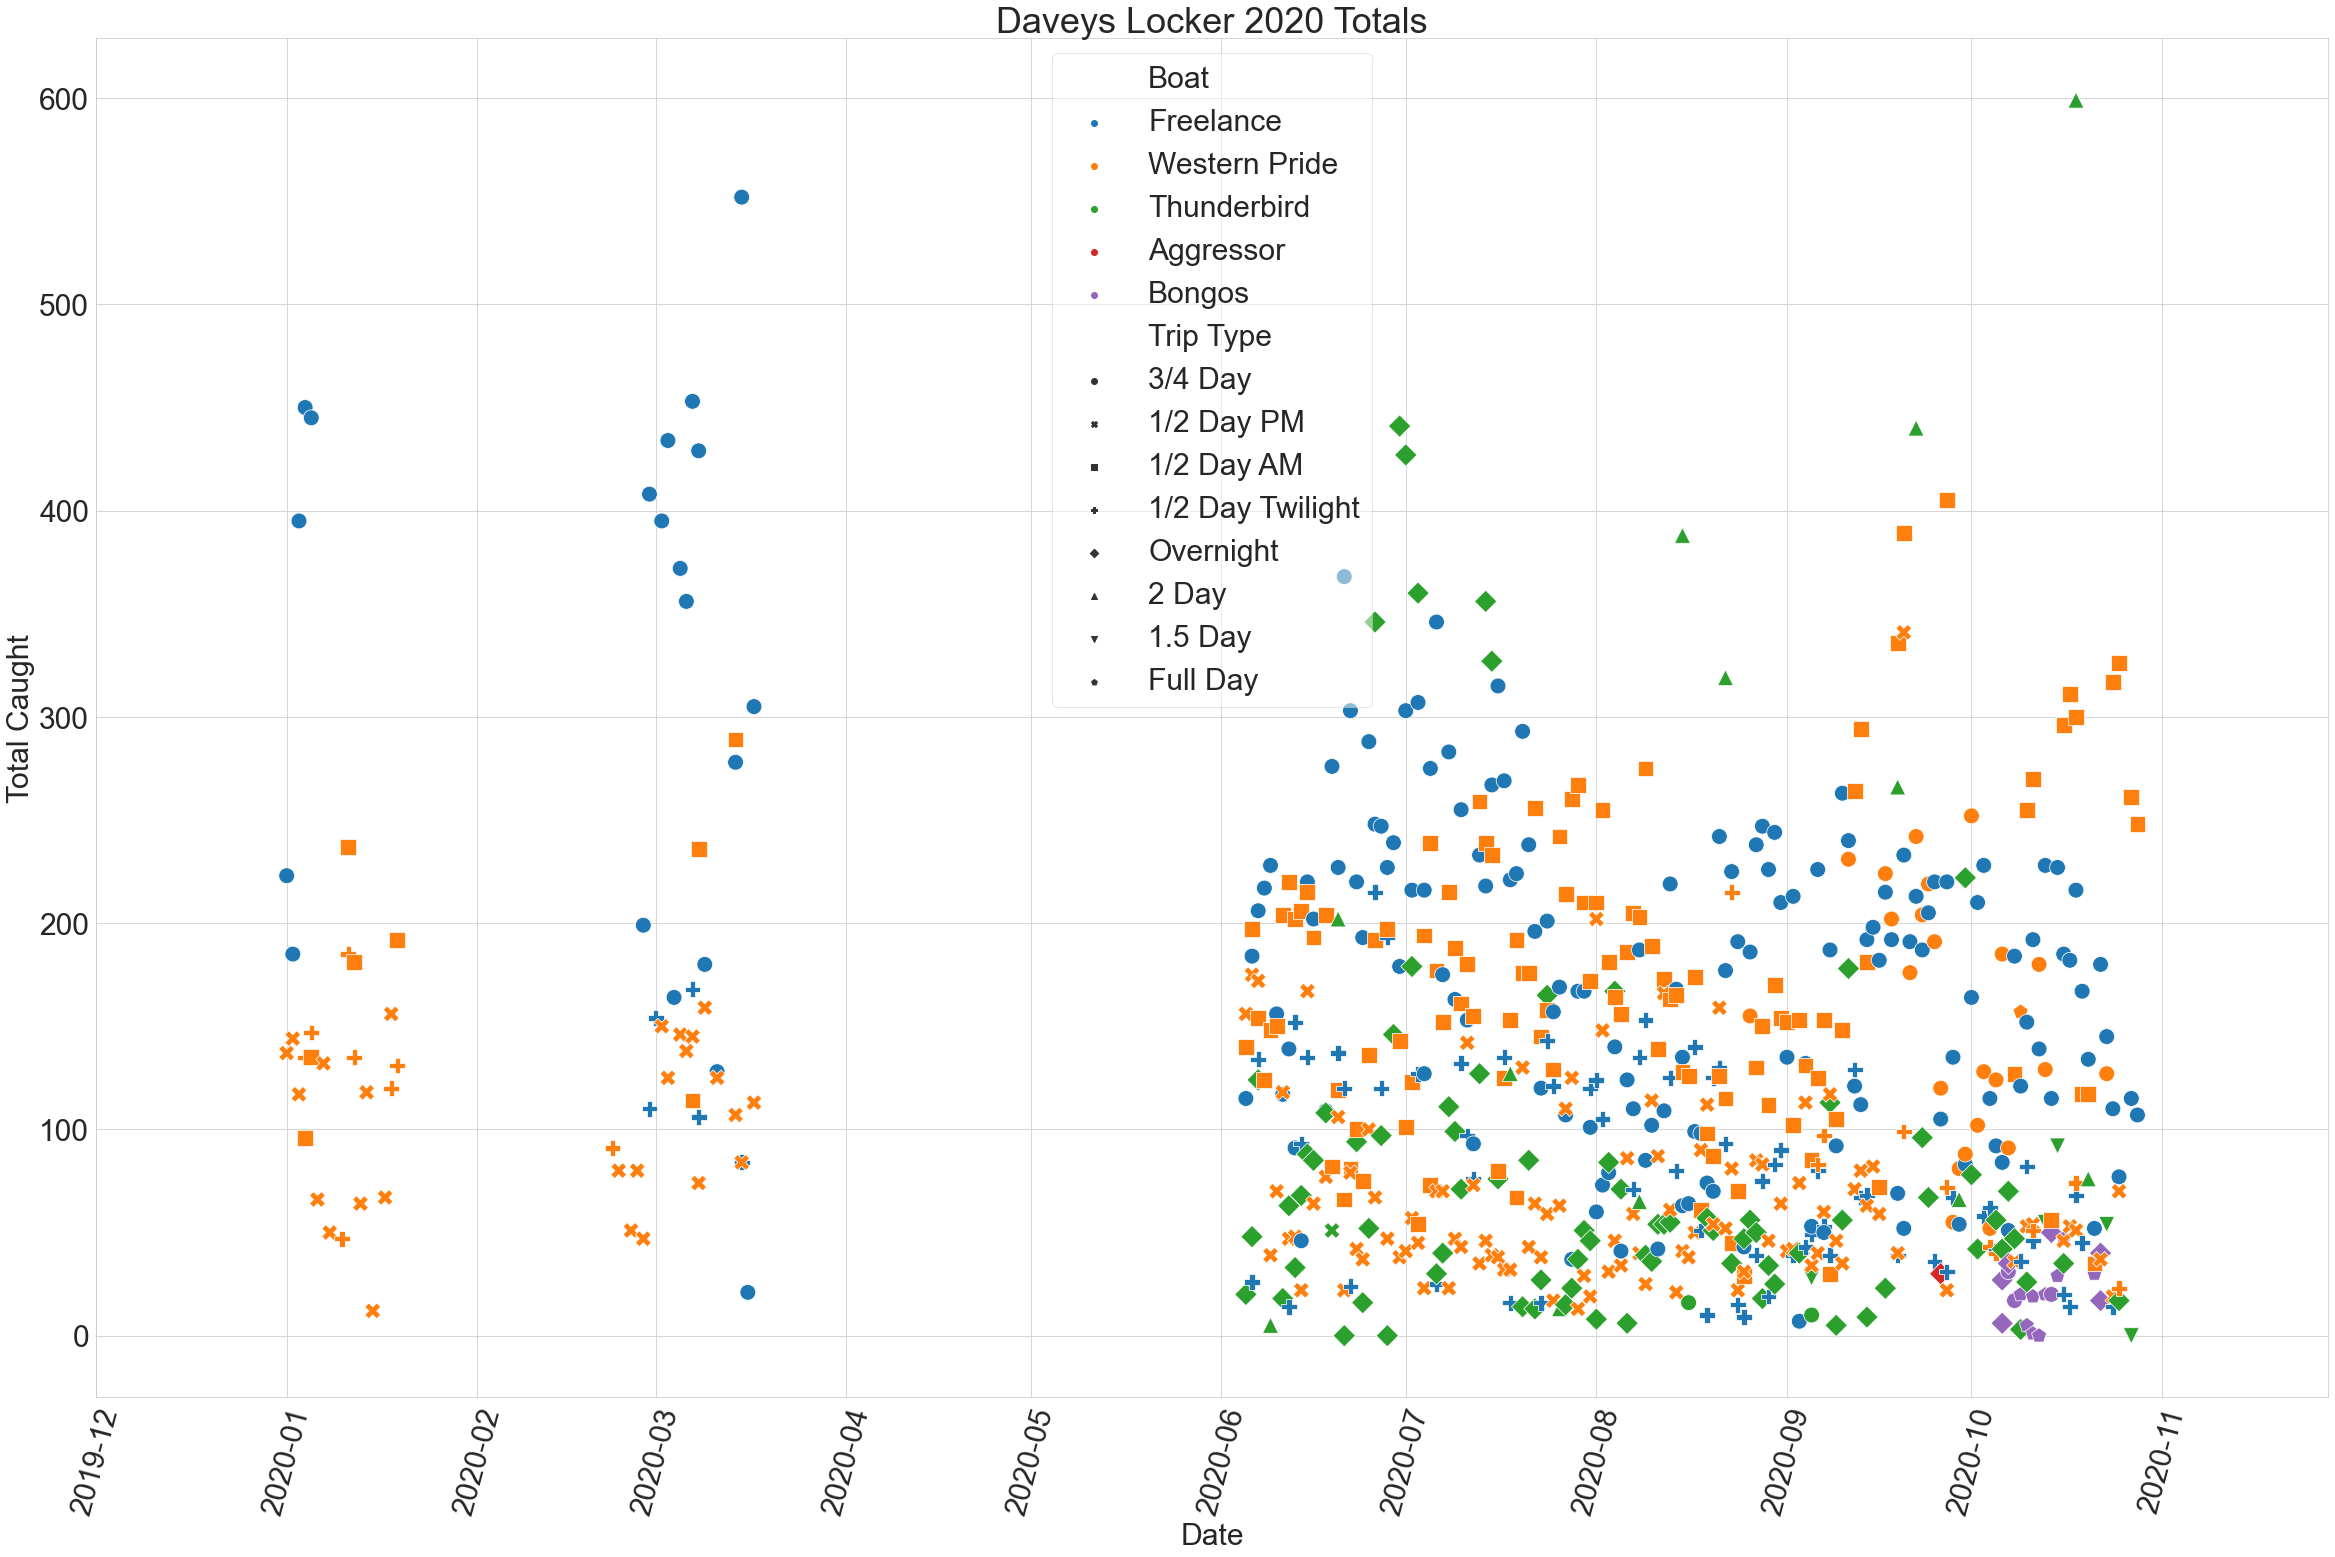

In [6]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':30})
fig, ax = plt.subplots(figsize=(40,25))
chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysdf_2020, hue='Boat', style='Trip Type',s=250)
ax.set_title('Daveys Locker 2020 Totals')
ax.legend(framealpha=0.5)
chart.set_xticklabels(labels=daveysdf_2020.Date.unique(),rotation=75)
ax.set_xlim([daveysdf_2020['Date'].iloc[0] - pd.DateOffset(months=1),
             daveysdf_2020['Date'].iloc[-1] + pd.DateOffset(months=1)])
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
figure = chart.get_figure()
#figure.savefig("daveys 2020 Totals")

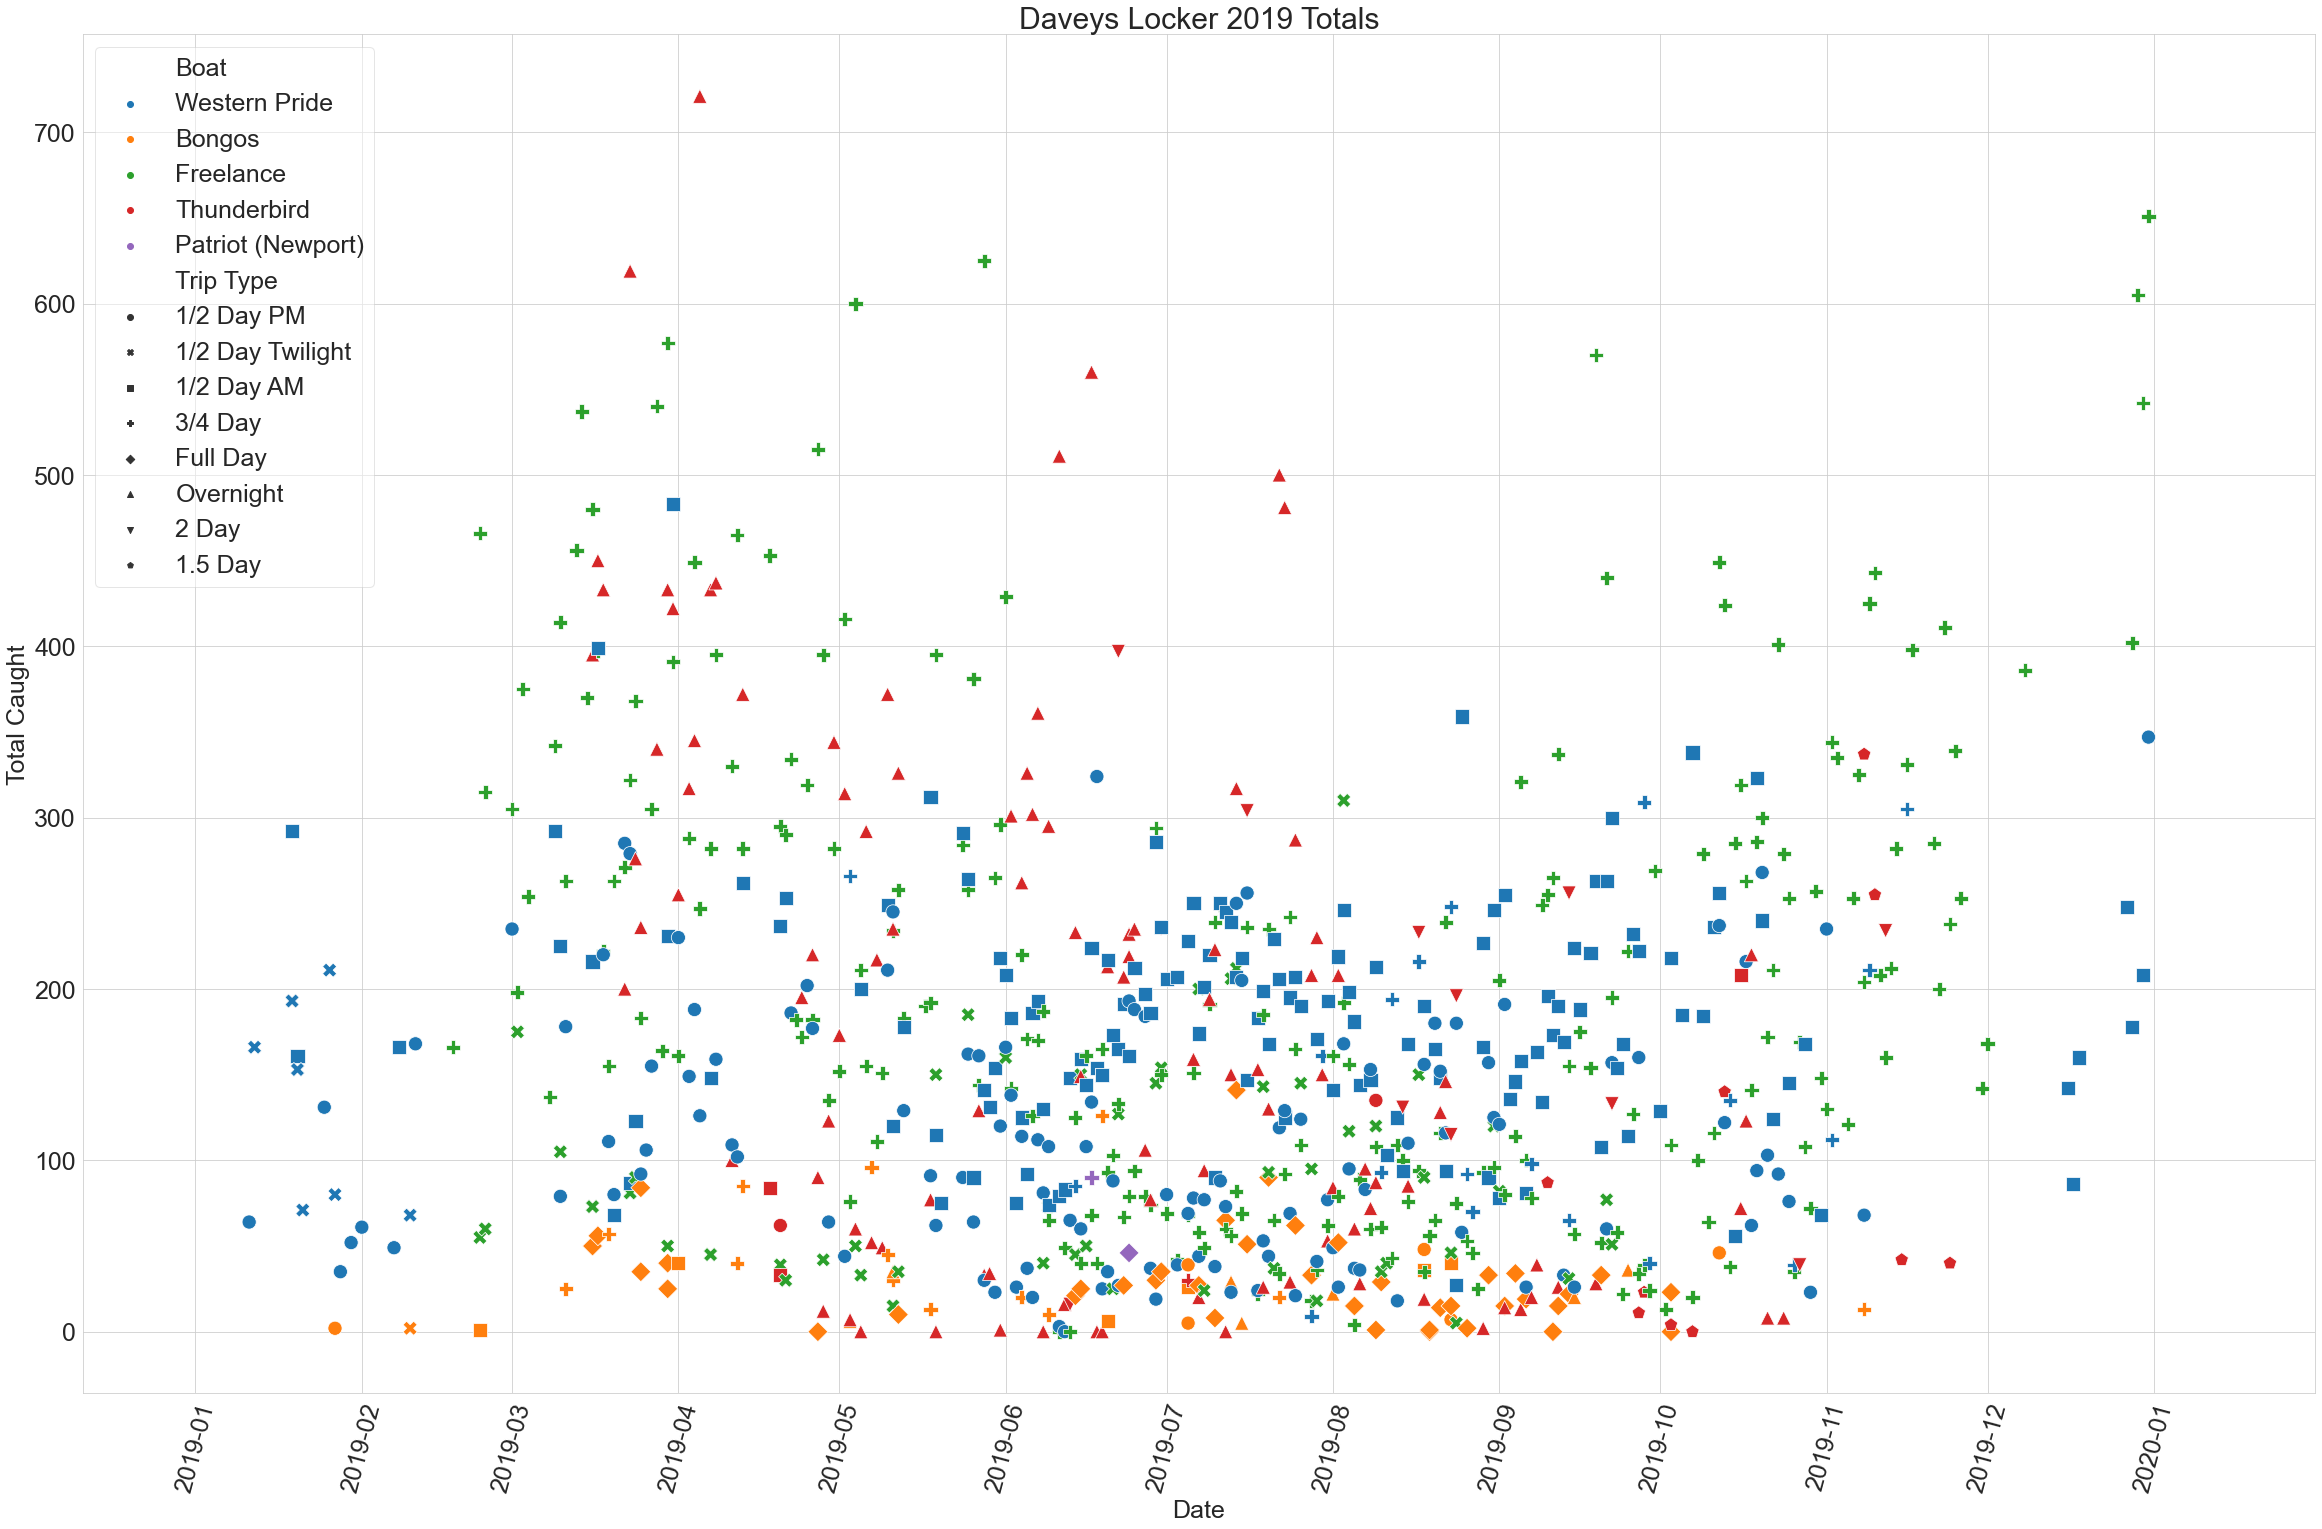

In [7]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':25})
fig, ax = plt.subplots(figsize=(40,25))
chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysdf_2019, hue='Boat', style='Trip Type',s=200)
ax.set_title('Daveys Locker 2019 Totals')
ax.legend(framealpha=0.5)
chart.set_xticklabels(labels=daveysdf_2019.Date.unique(),rotation=75)
ax.set_xlim([daveysdf_2019['Date'].iloc[0] - pd.DateOffset(months=1),
             daveysdf_2019['Date'].iloc[-1] + pd.DateOffset(months=1)])
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
figure = chart.get_figure()
#figure.savefig("daveys 2019 Totals")

In [8]:
daveysdf.iloc[:,:5]

,Landing,Date,Boat,Trip Type,Anglers
0,daveys-locker,2019-01-11,Western Pride,1/2 Day PM,35
1,daveys-locker,2019-01-12,Western Pride,1/2 Day Twilight,66
2,daveys-locker,2019-01-19,Western Pride,1/2 Day AM,76
3,daveys-locker,2019-01-19,Western Pride,1/2 Day Twilight,67
4,daveys-locker,2019-01-20,Western Pride,1/2 Day AM,62
...,...,...,...,...,...
1459,daveys-locker,2020-10-27,Freelance,3/4 Day,39
1460,daveys-locker,2020-10-27,Thunderbird,1.5 Day,24
1461,daveys-locker,2020-10-27,Western Pride,1/2 Day AM,30
1462,daveys-locker,2020-10-28,Freelance,3/4 Day,45


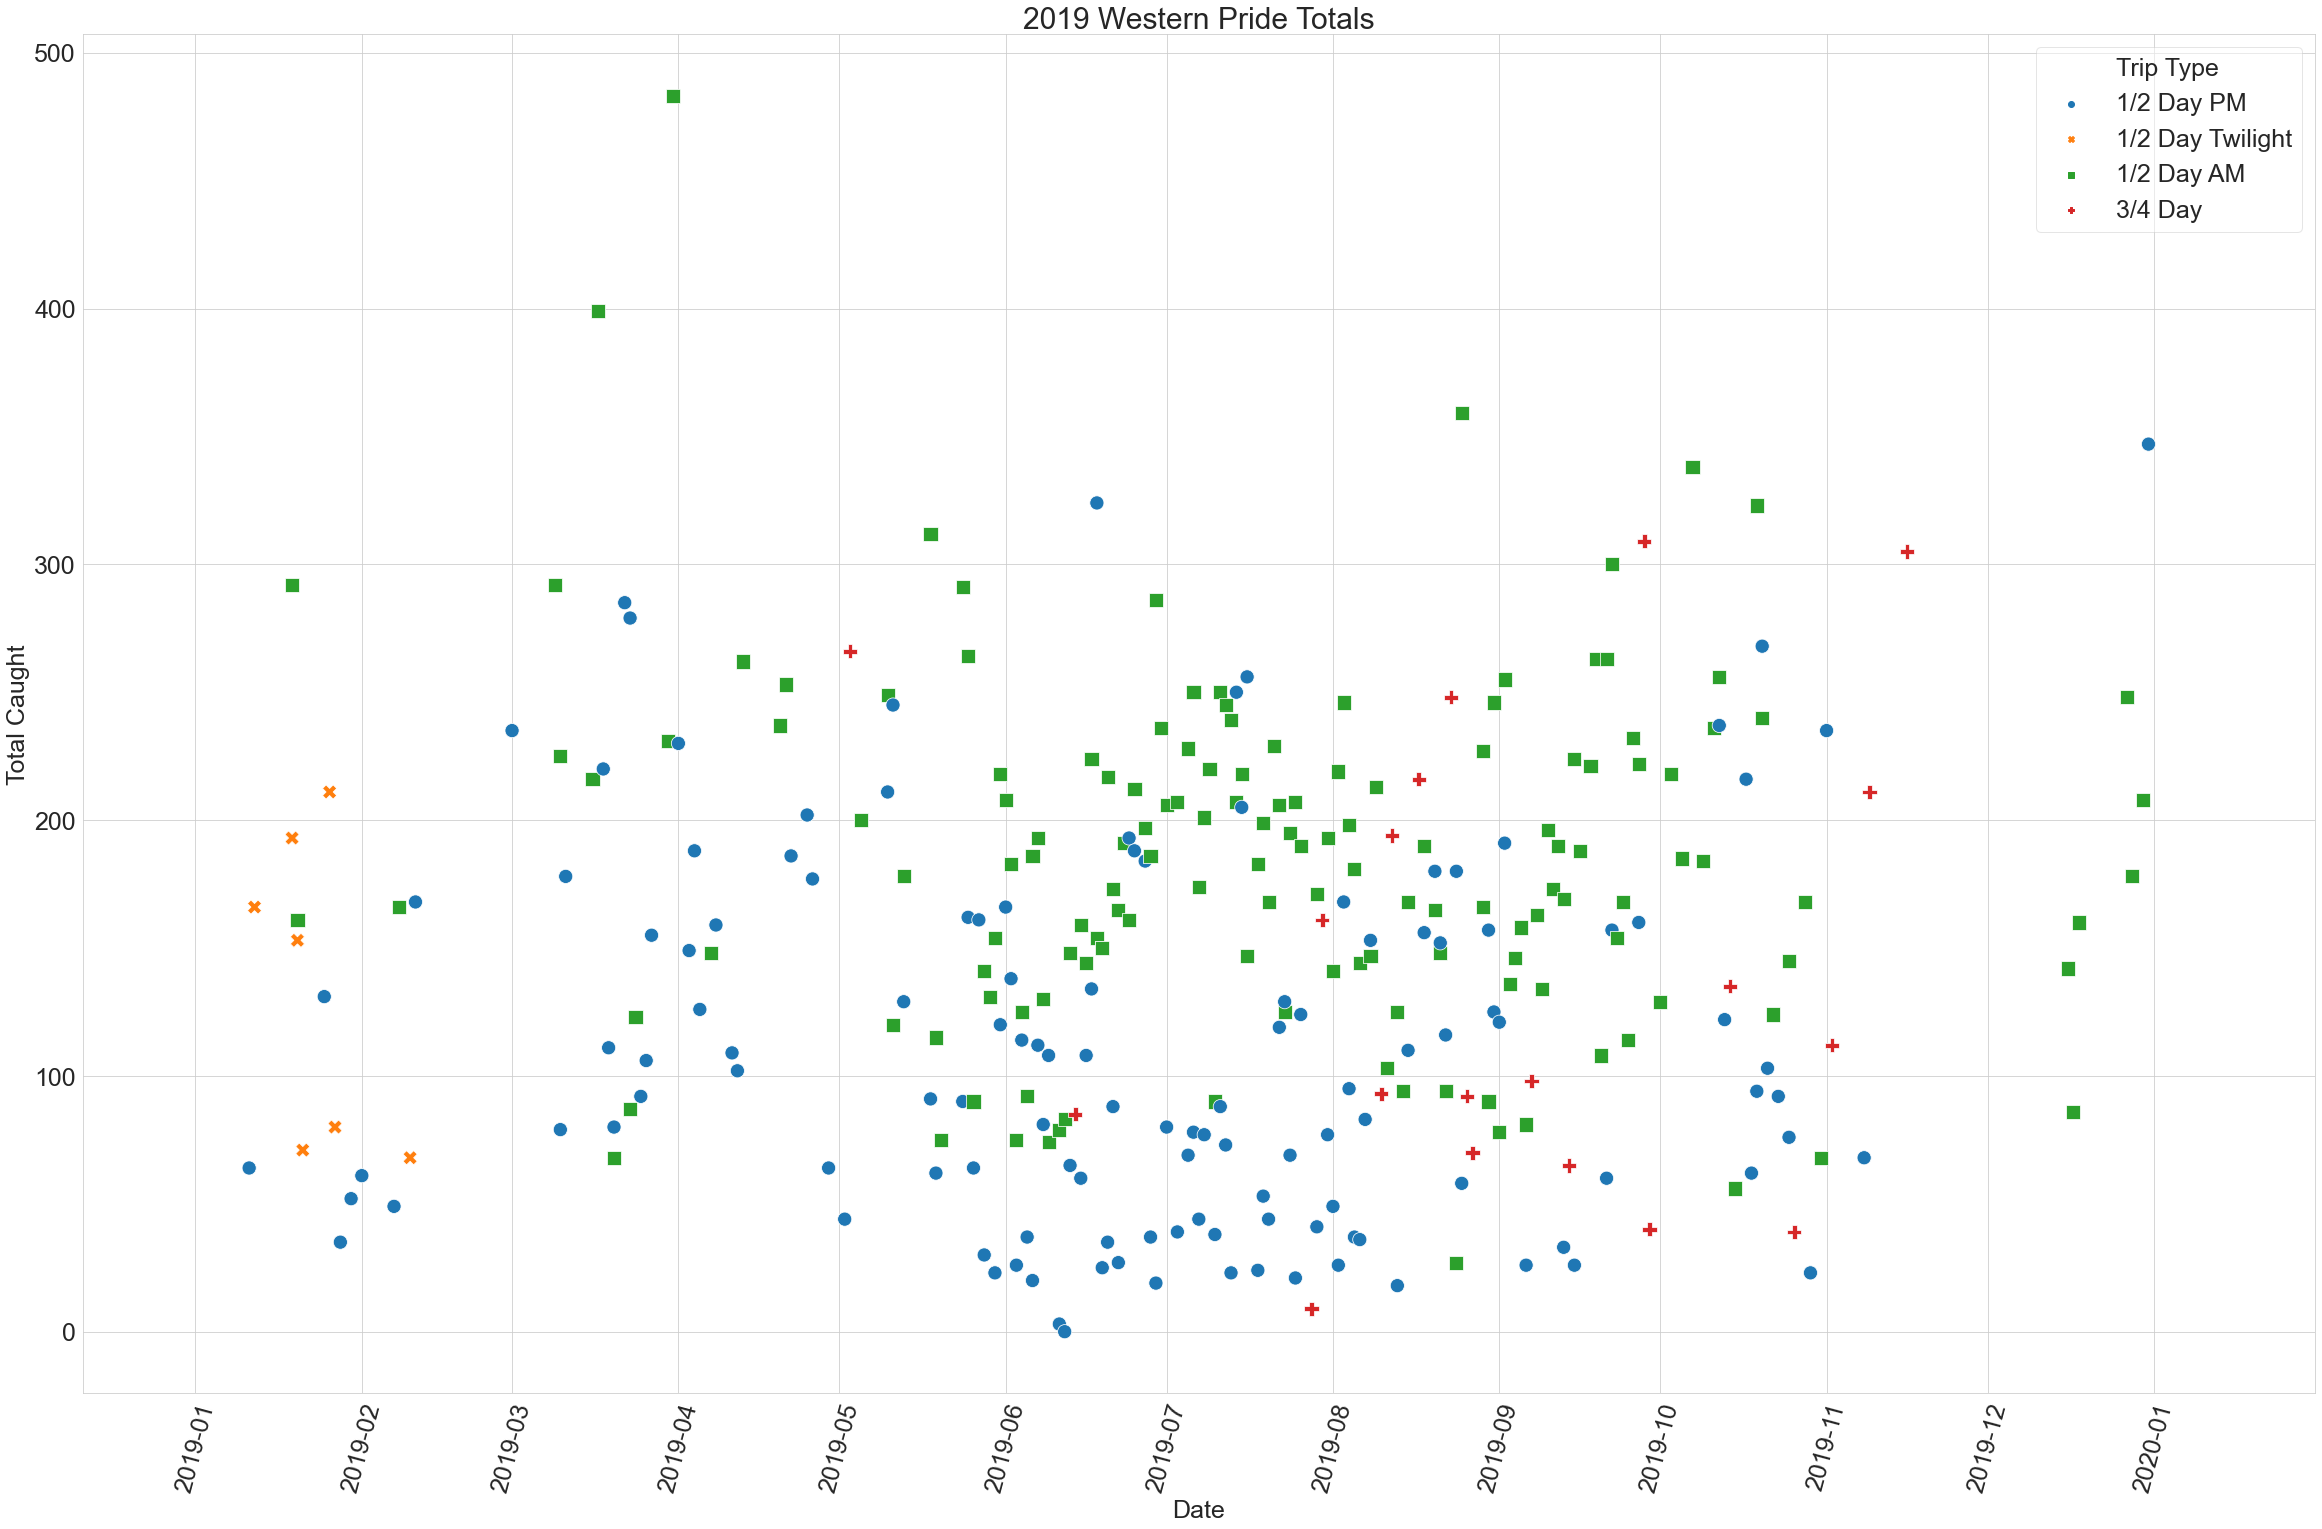

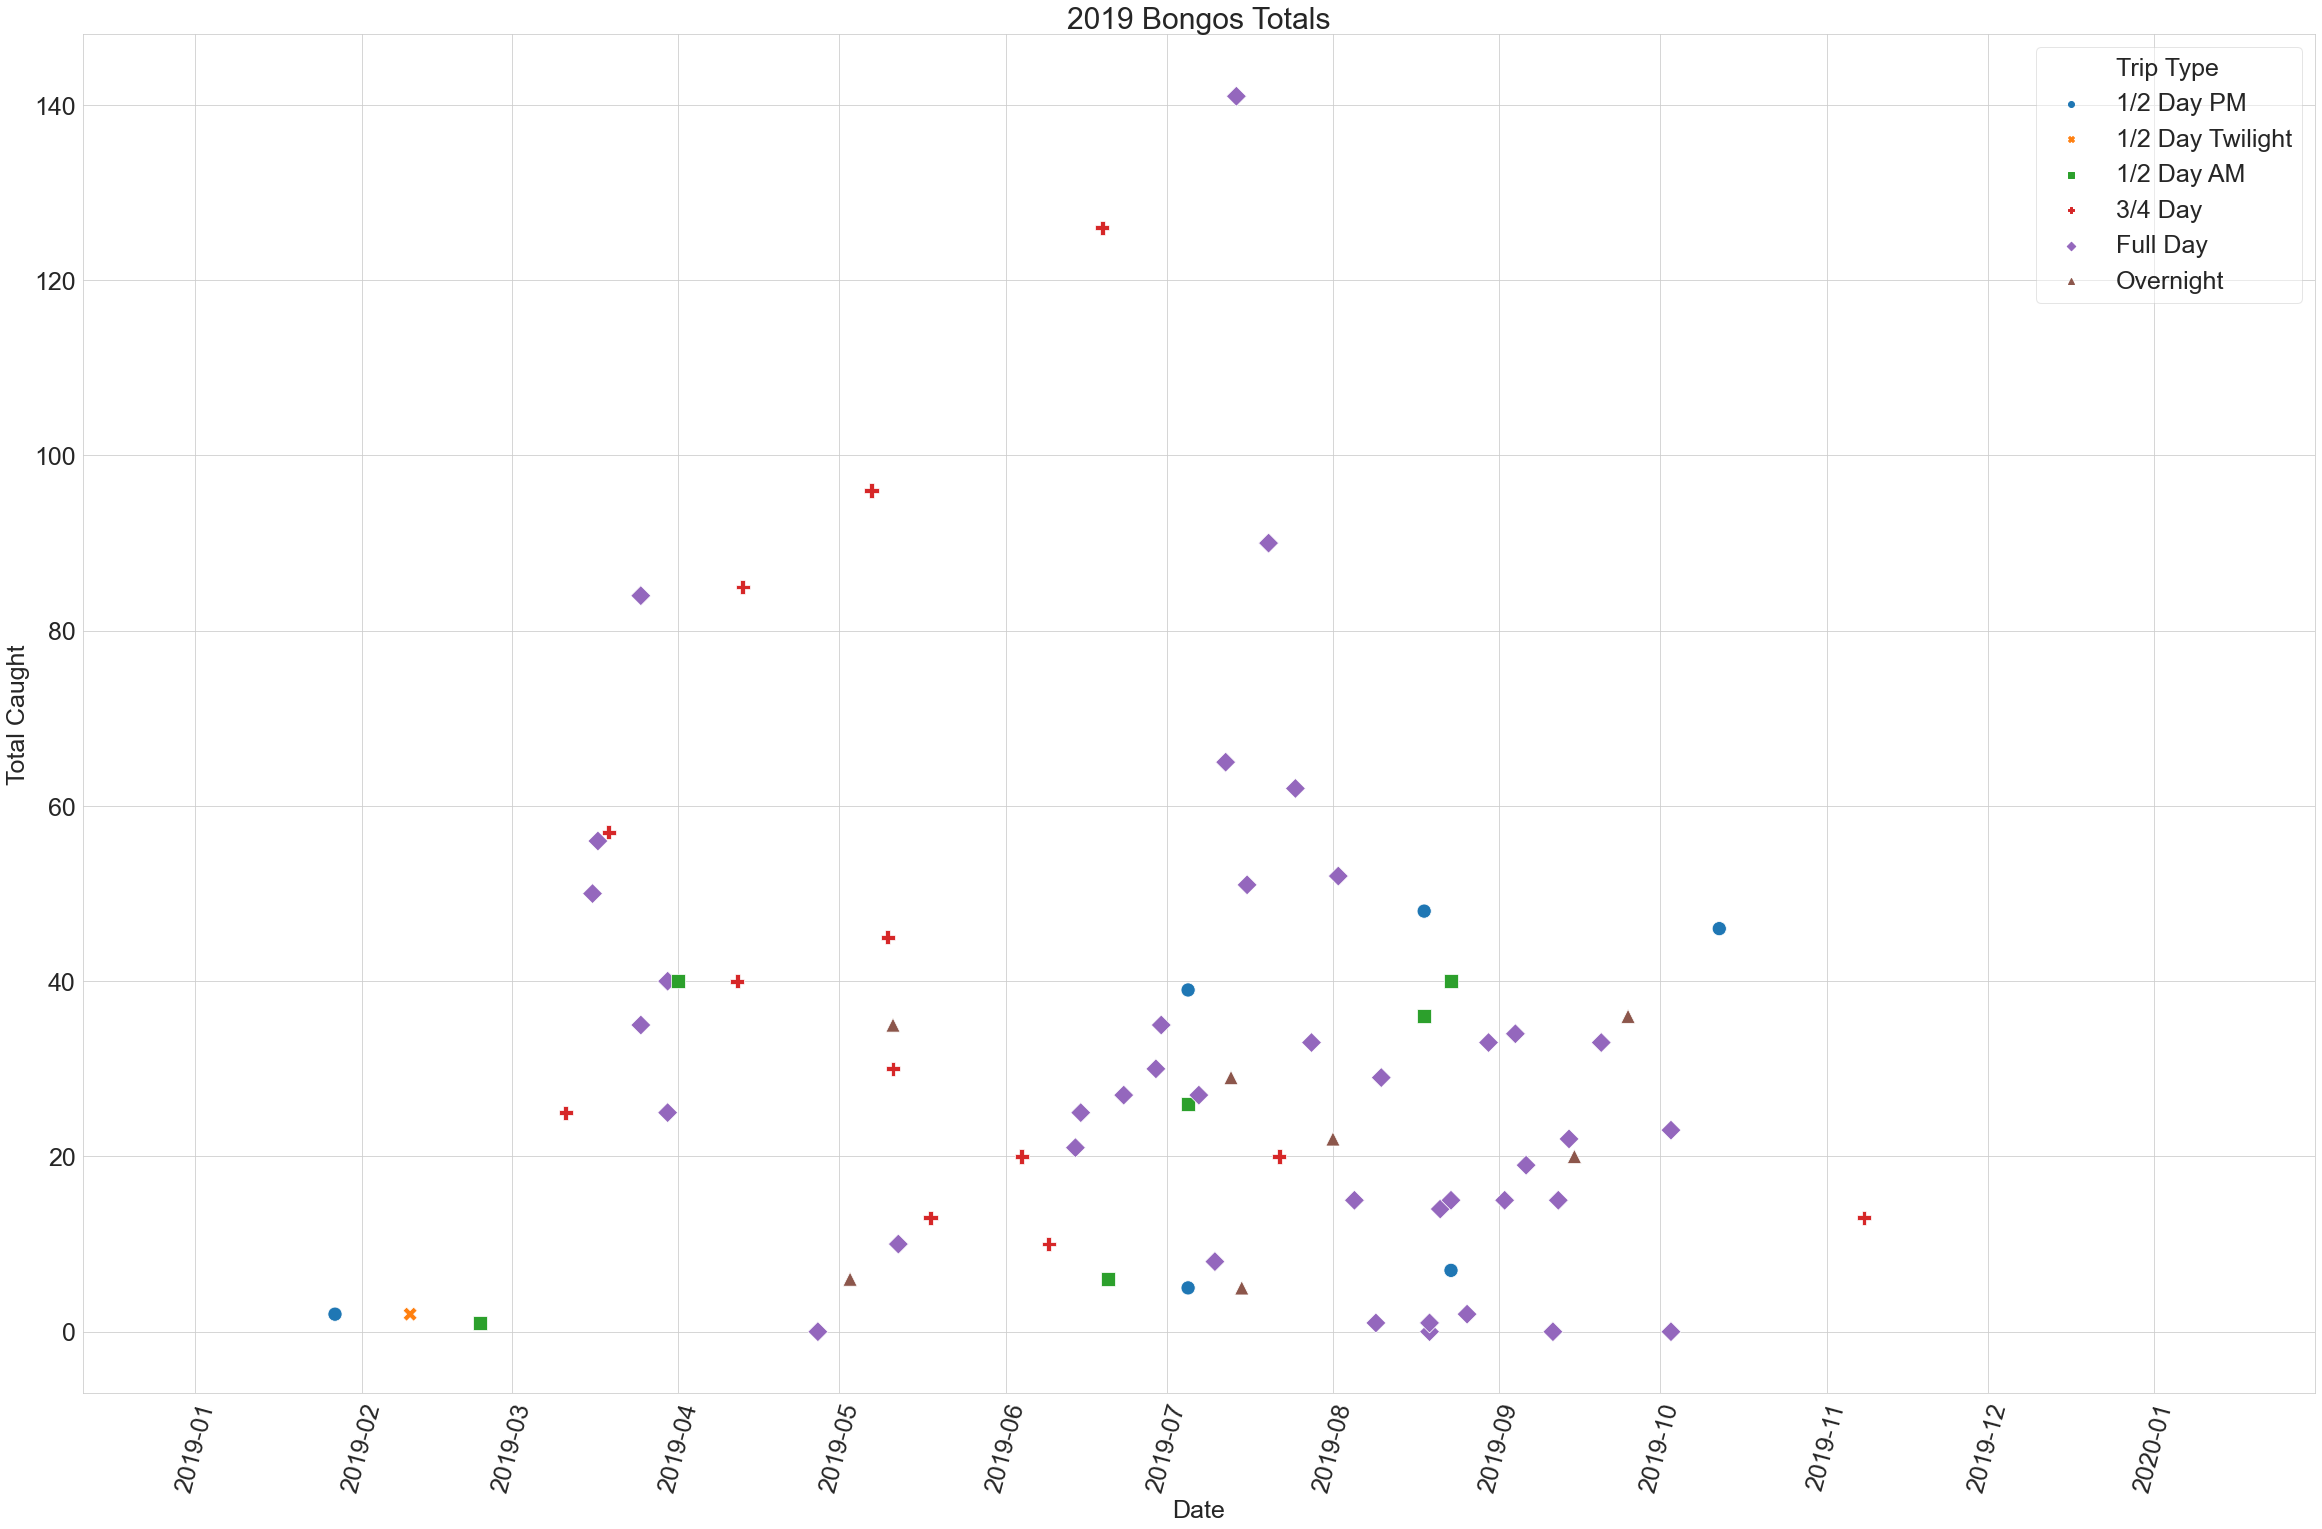

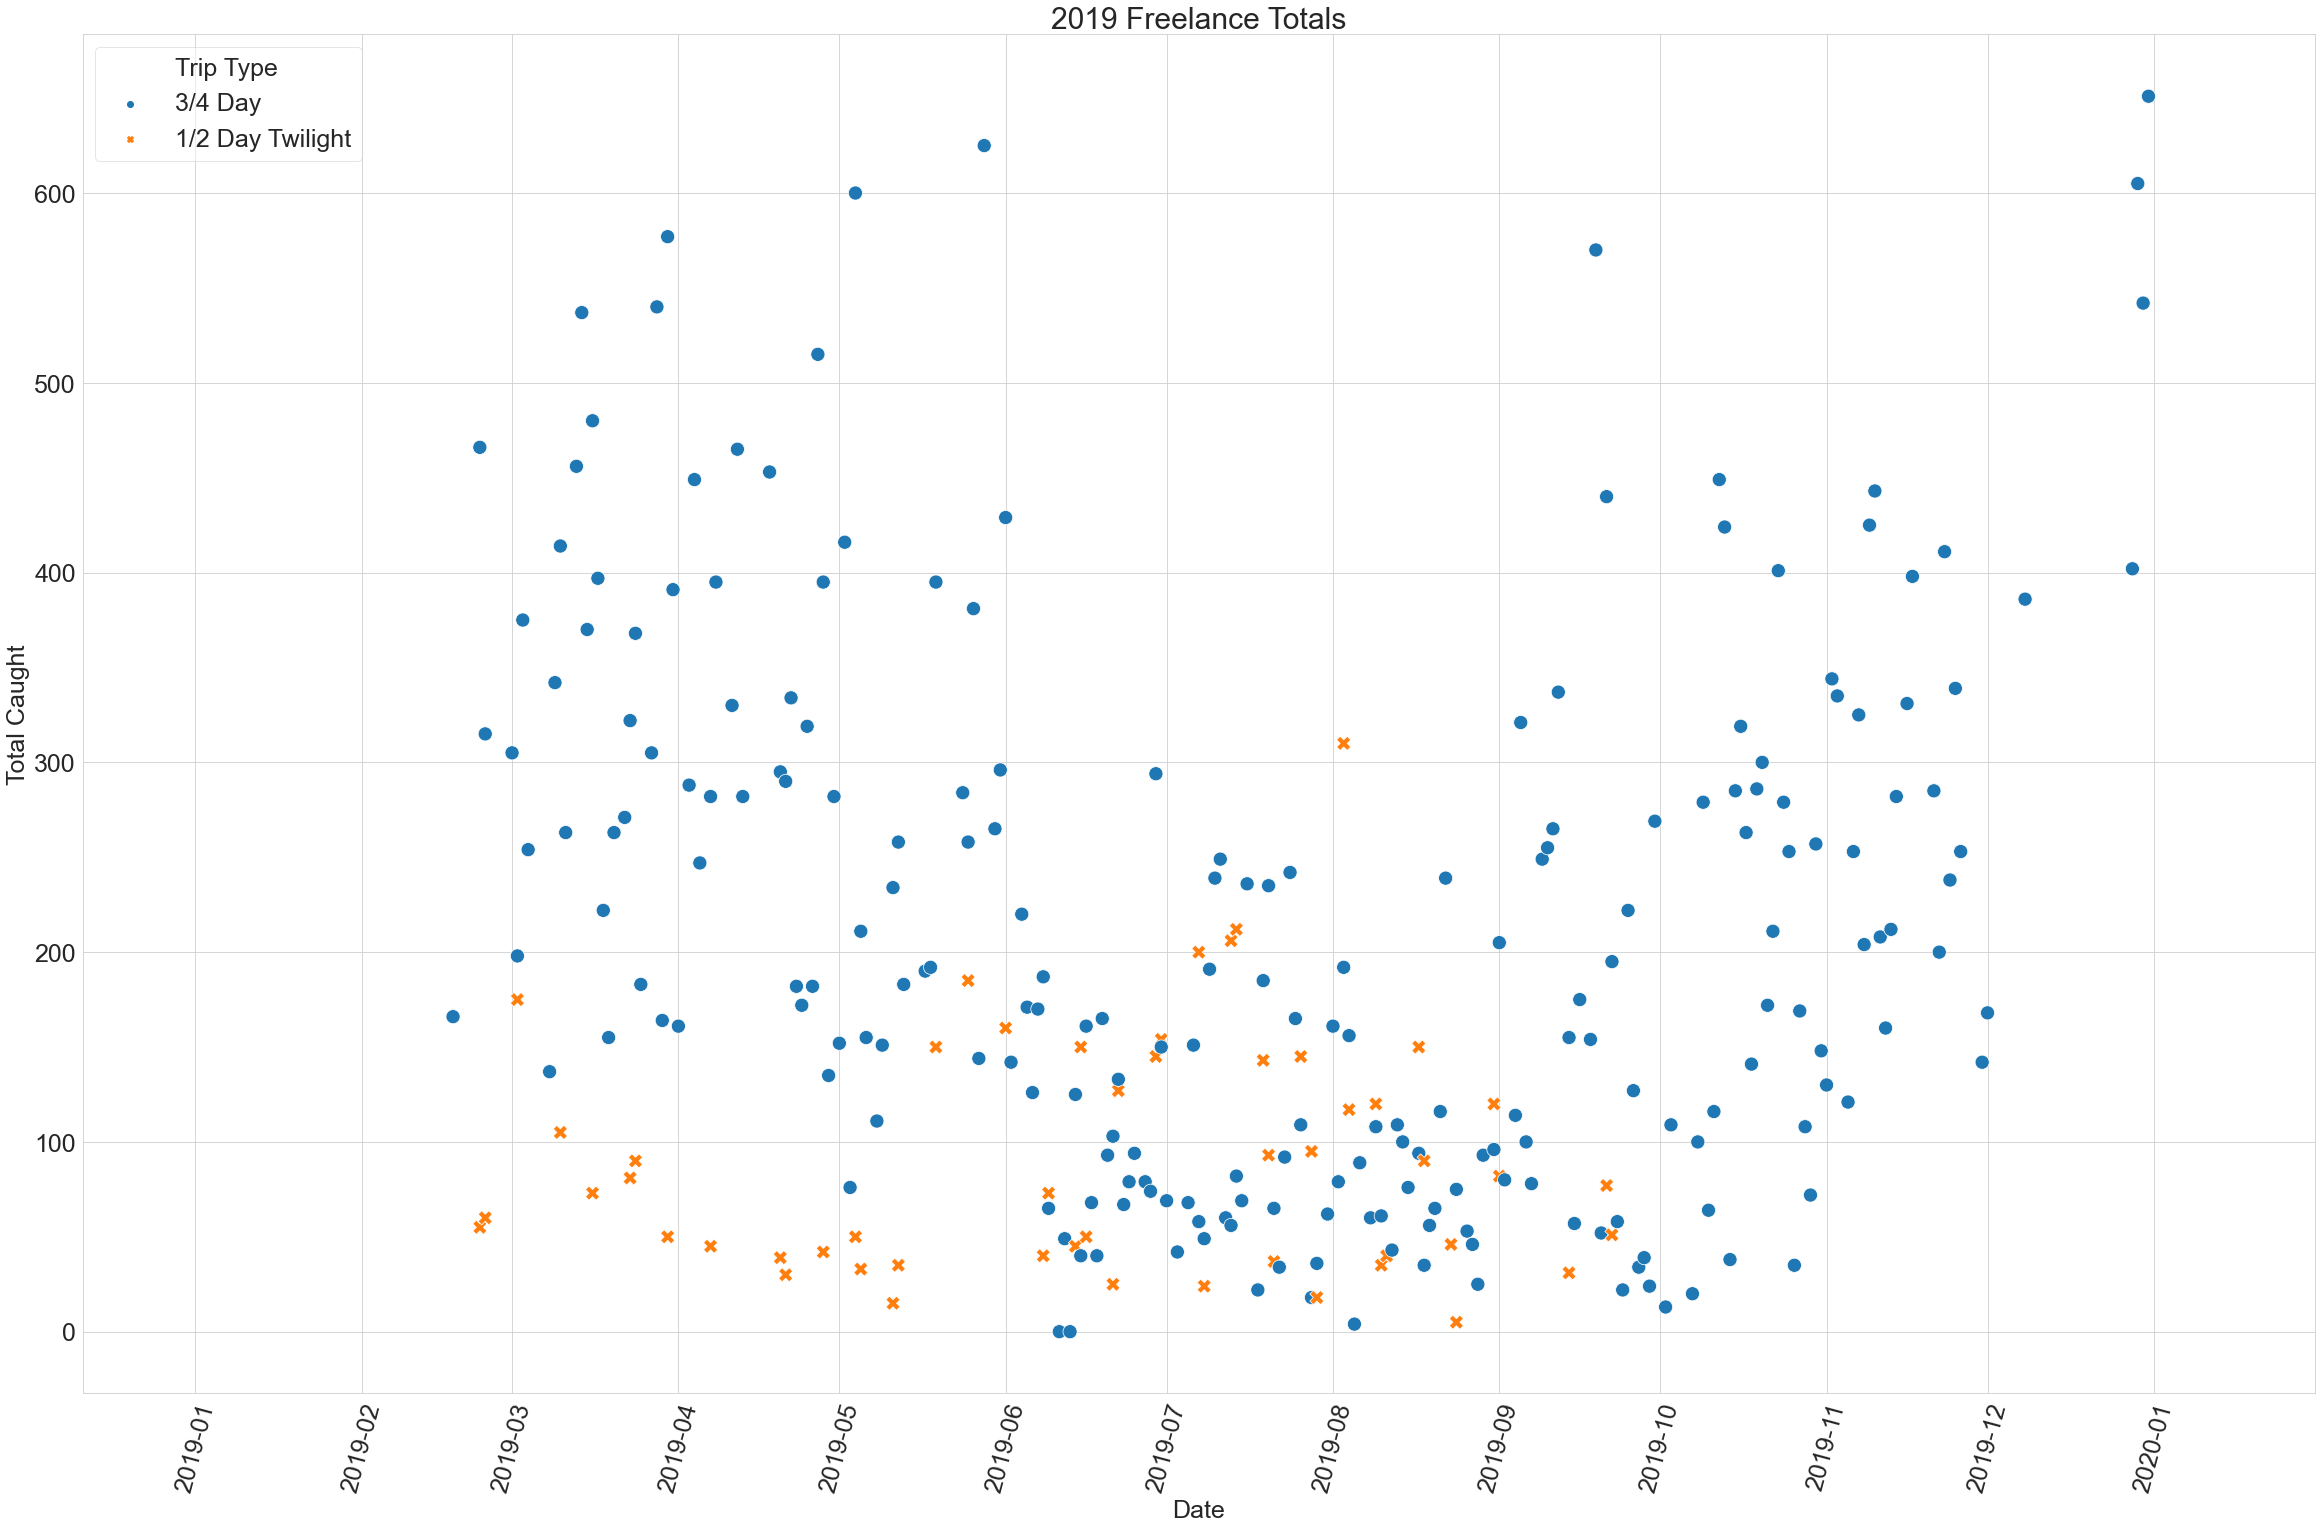

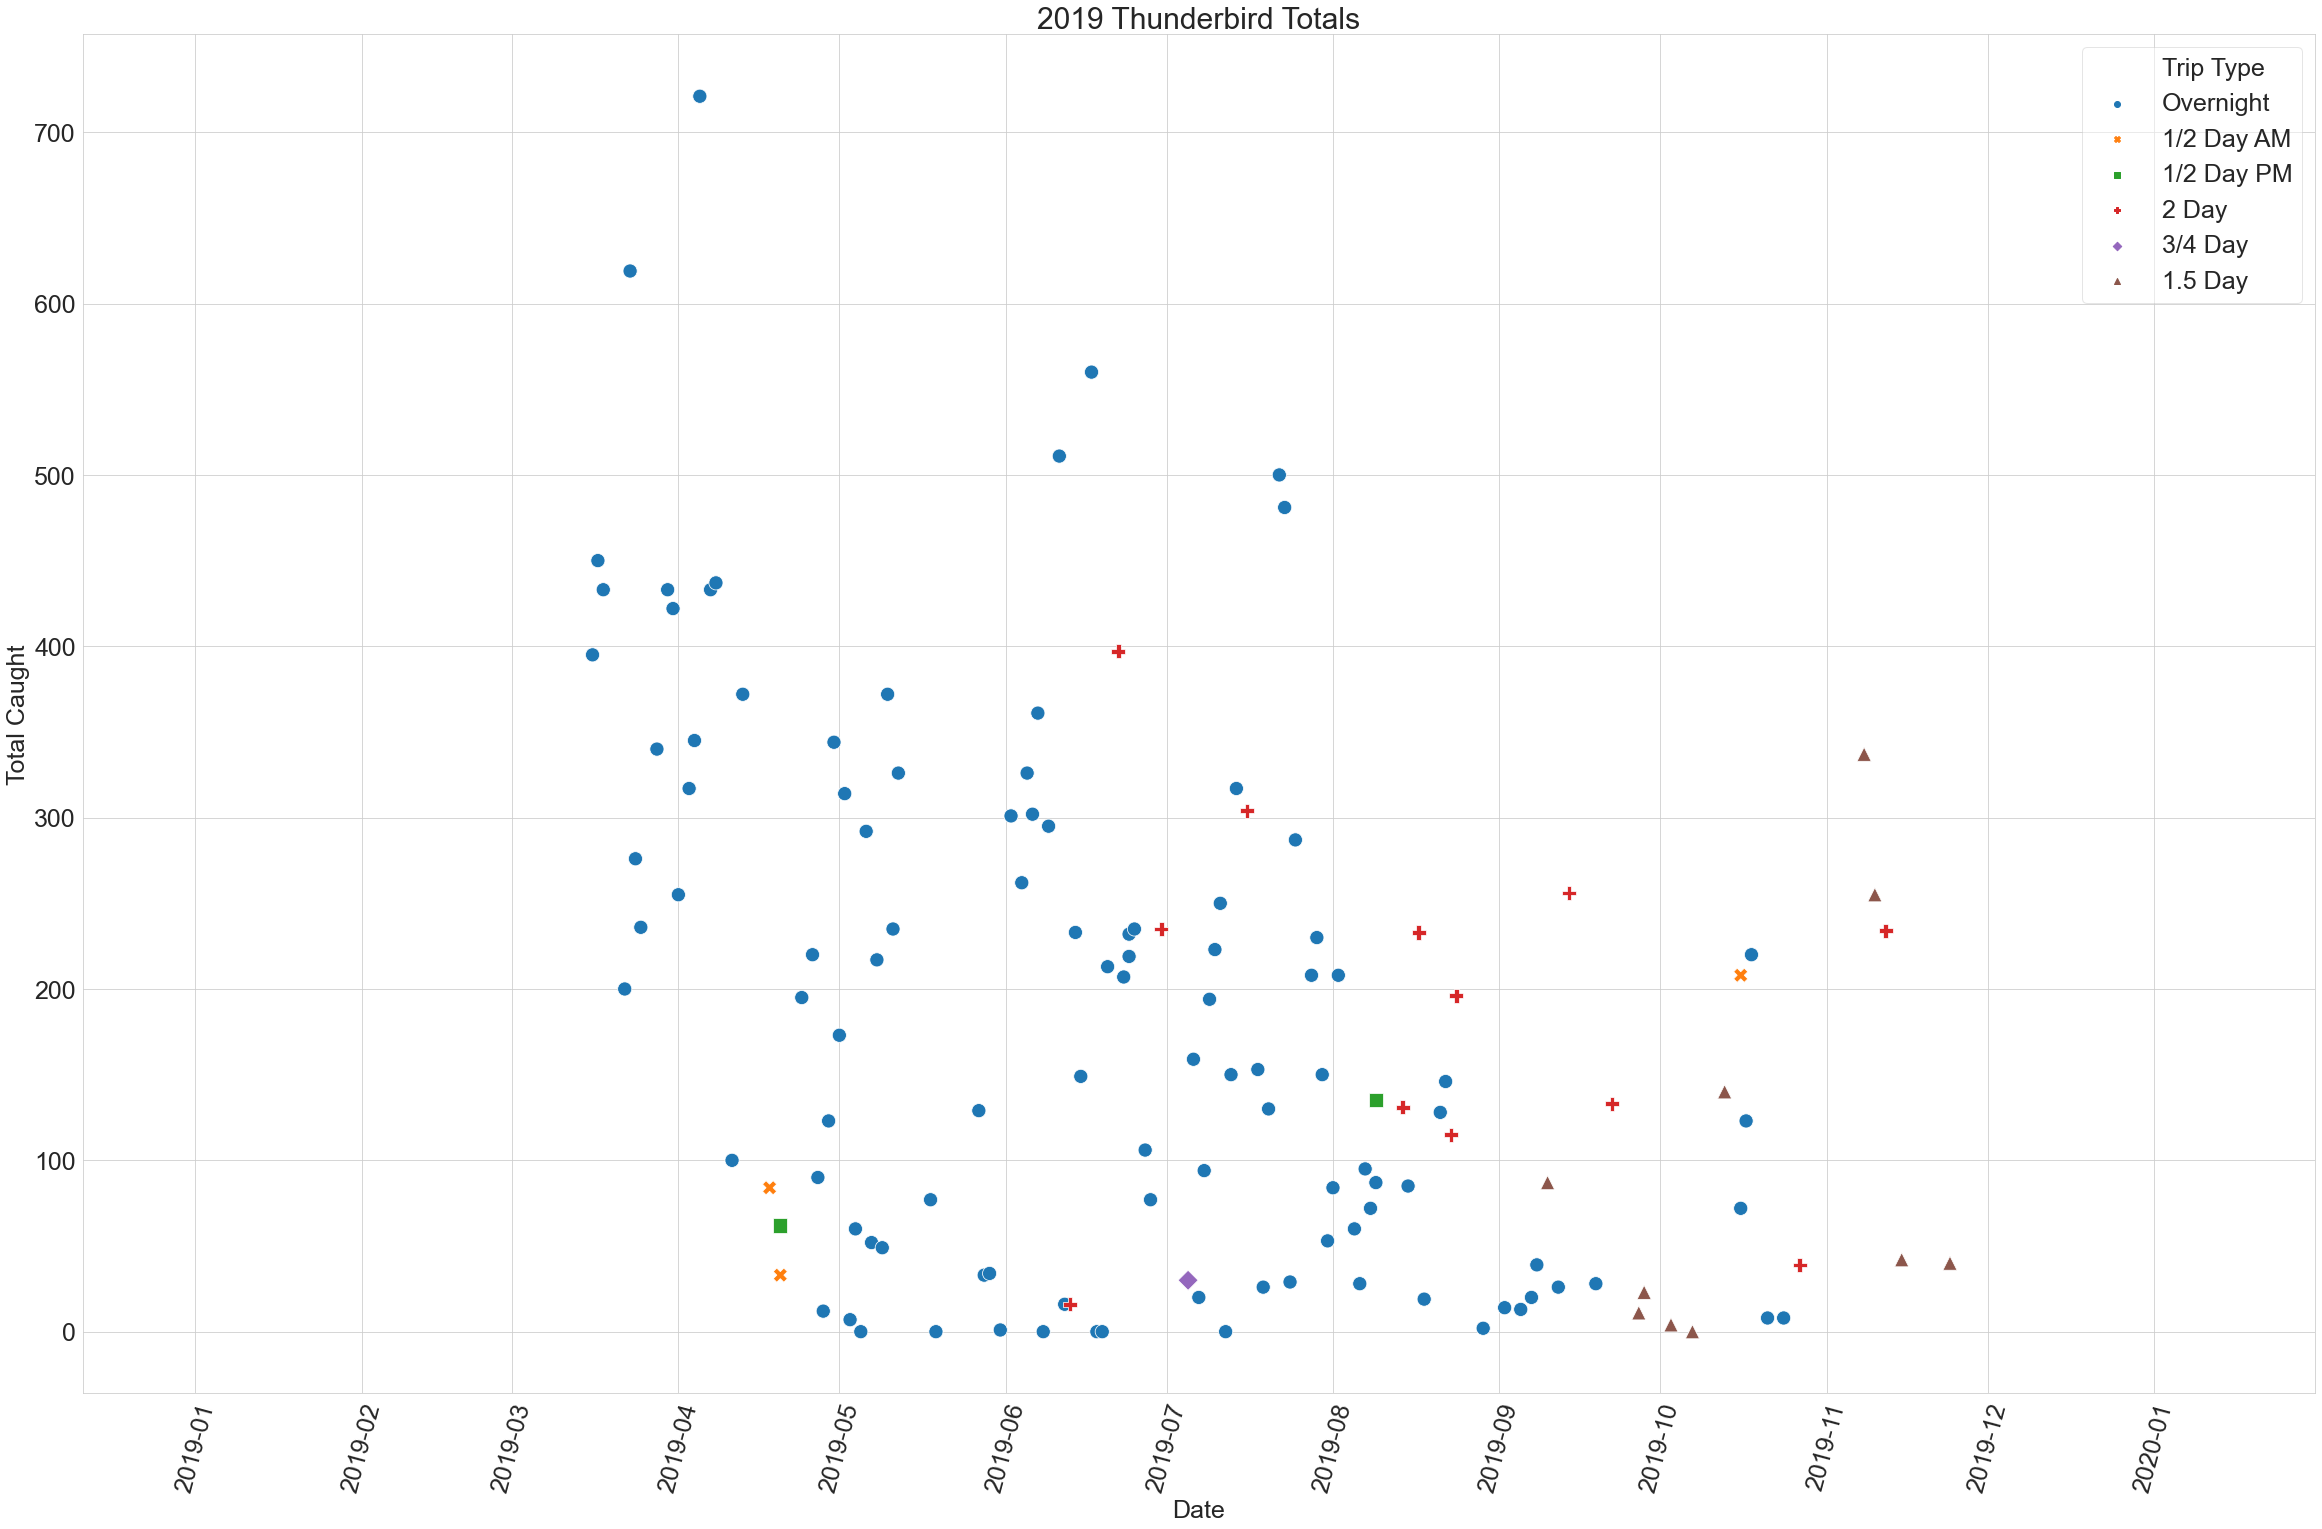

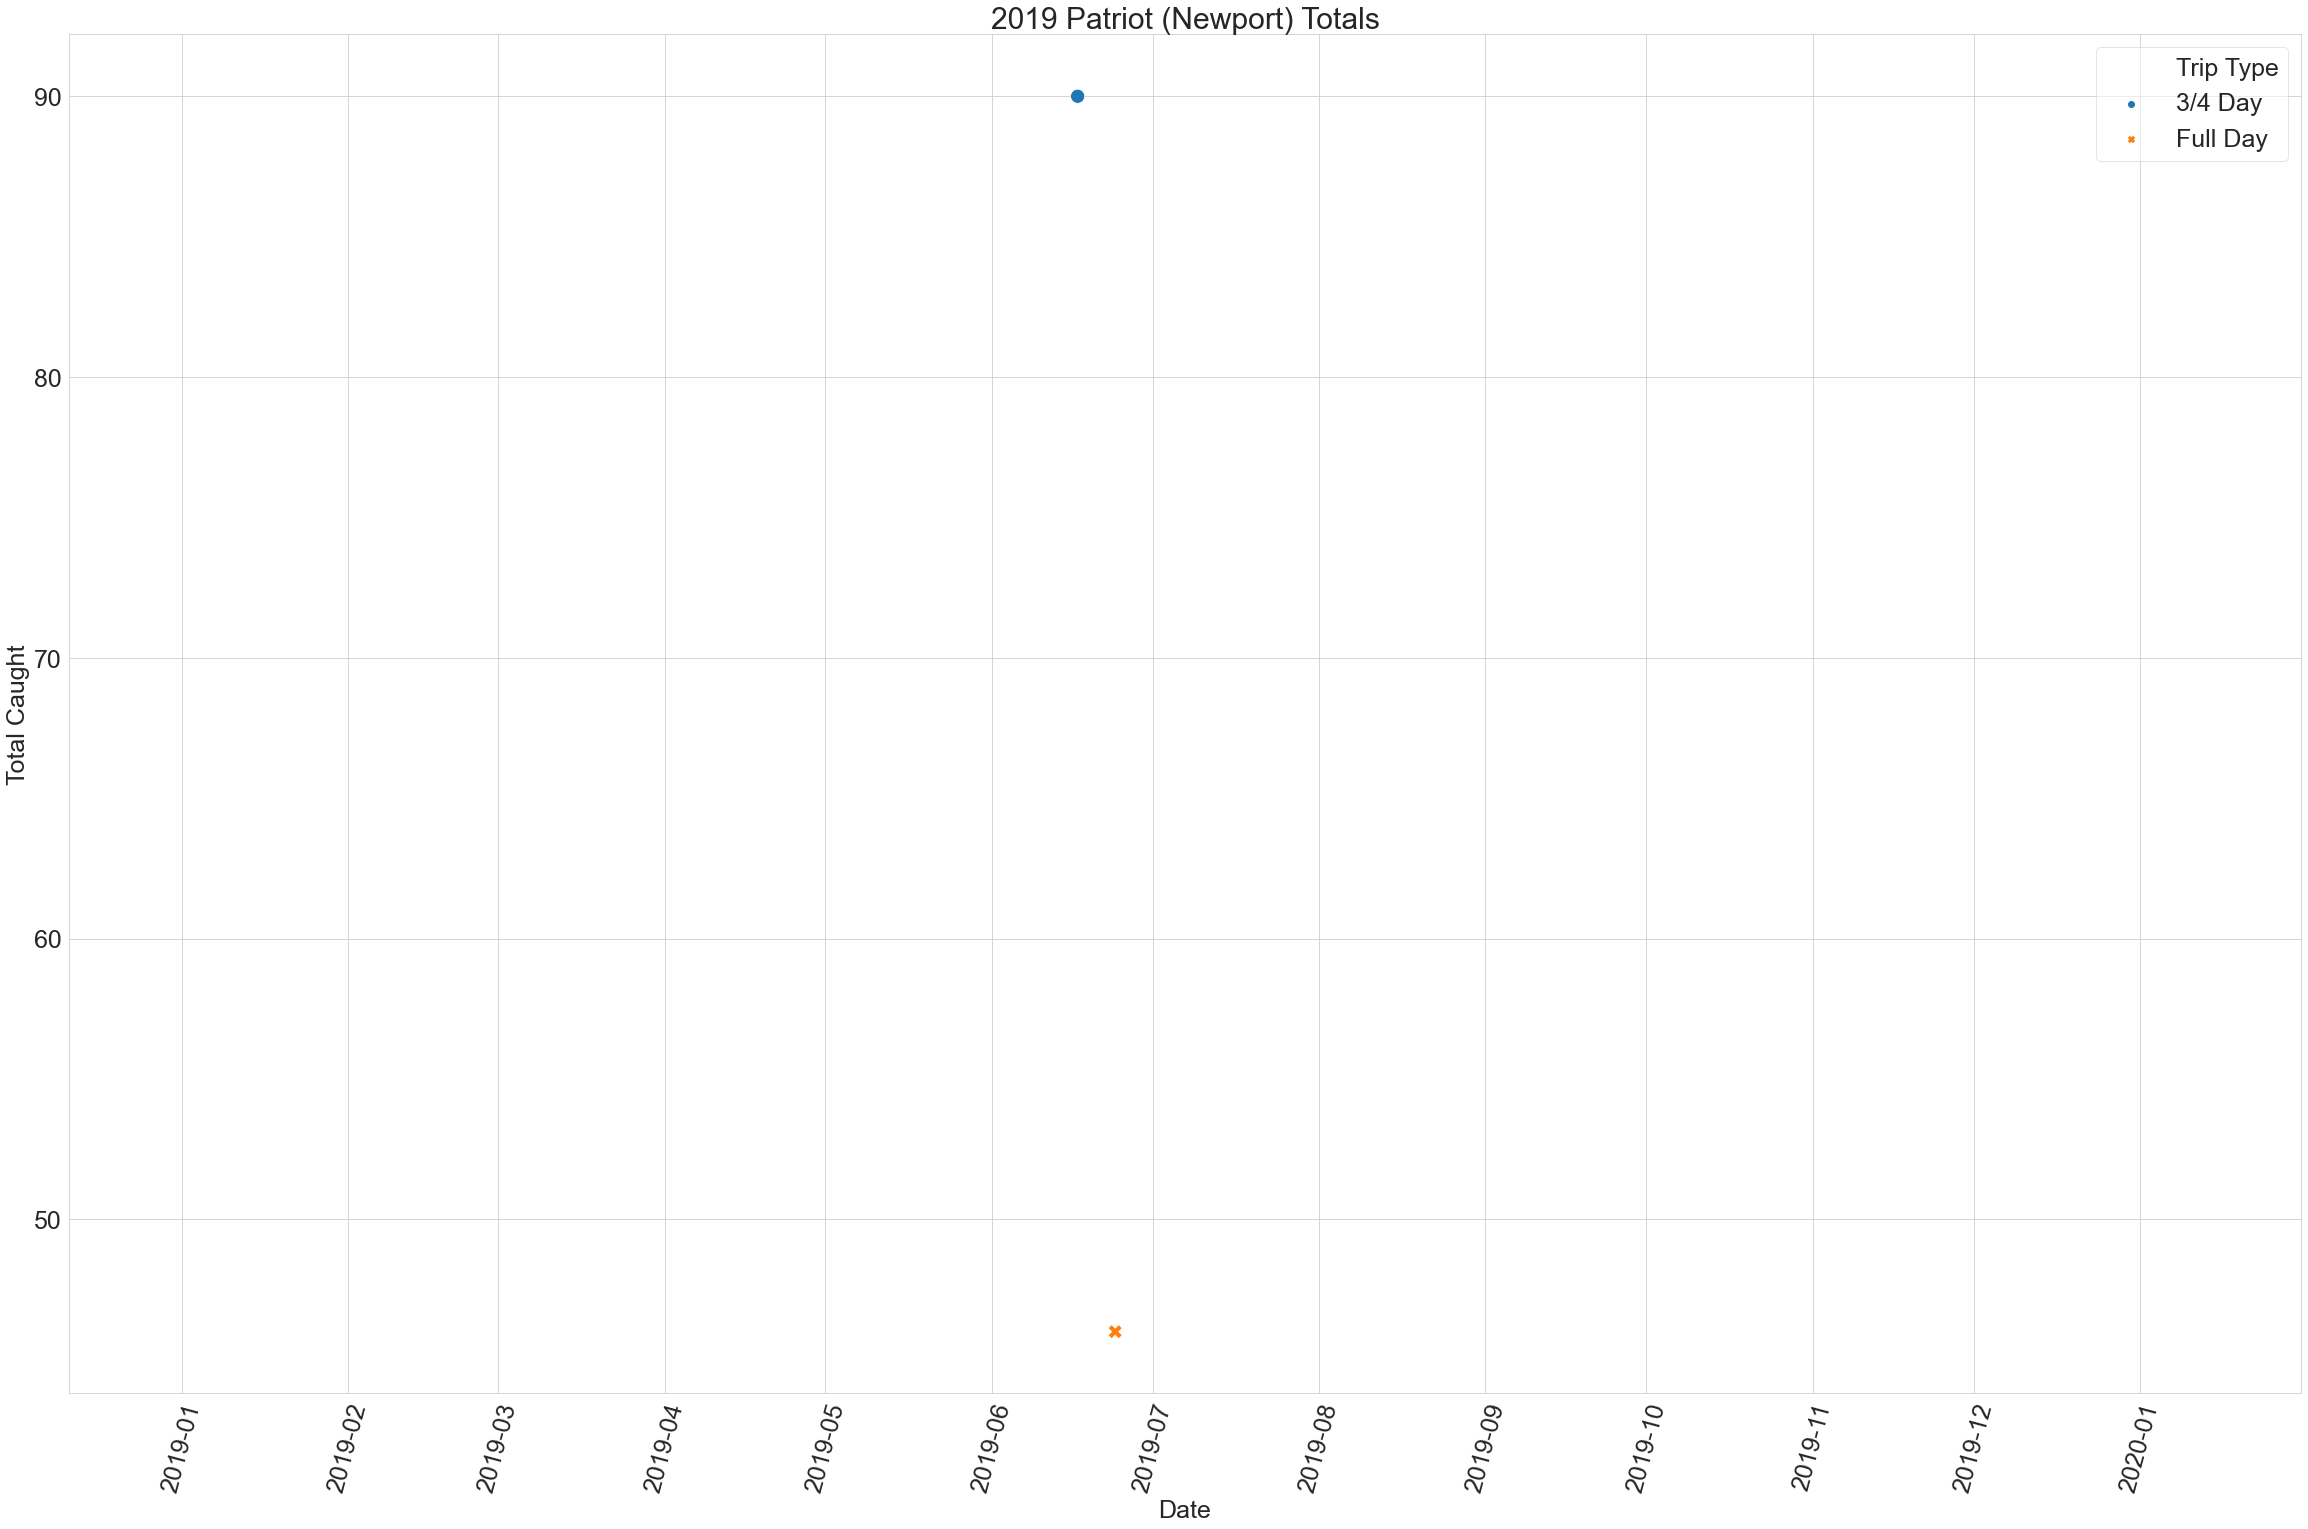

In [9]:
for boat in daveysdf_2019.Boat.unique():
    #sbn.set_style('whitegrid')
    plt.rcParams.update({'font.size':25})
    fig, ax = plt.subplots(figsize=(40,25))
    chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysdf_2019[daveysdf_2019.Boat==boat],
                            hue='Trip Type', style='Trip Type',s=200)
    ax.set_title('2019 '+ boat + ' Totals')
    ax.legend(framealpha=0.5)
    chart.set_xticklabels(labels=daveysdf_2019.Date.unique(),rotation=75)
    ax.set_xlim([daveysdf_2019['Date'].iloc[0] - pd.DateOffset(months=1),
                 daveysdf_2019['Date'].iloc[-1] + pd.DateOffset(months=1)])
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    figure = chart.get_figure()
    #figure.savefig('2019 '+ boat + ' Totals')

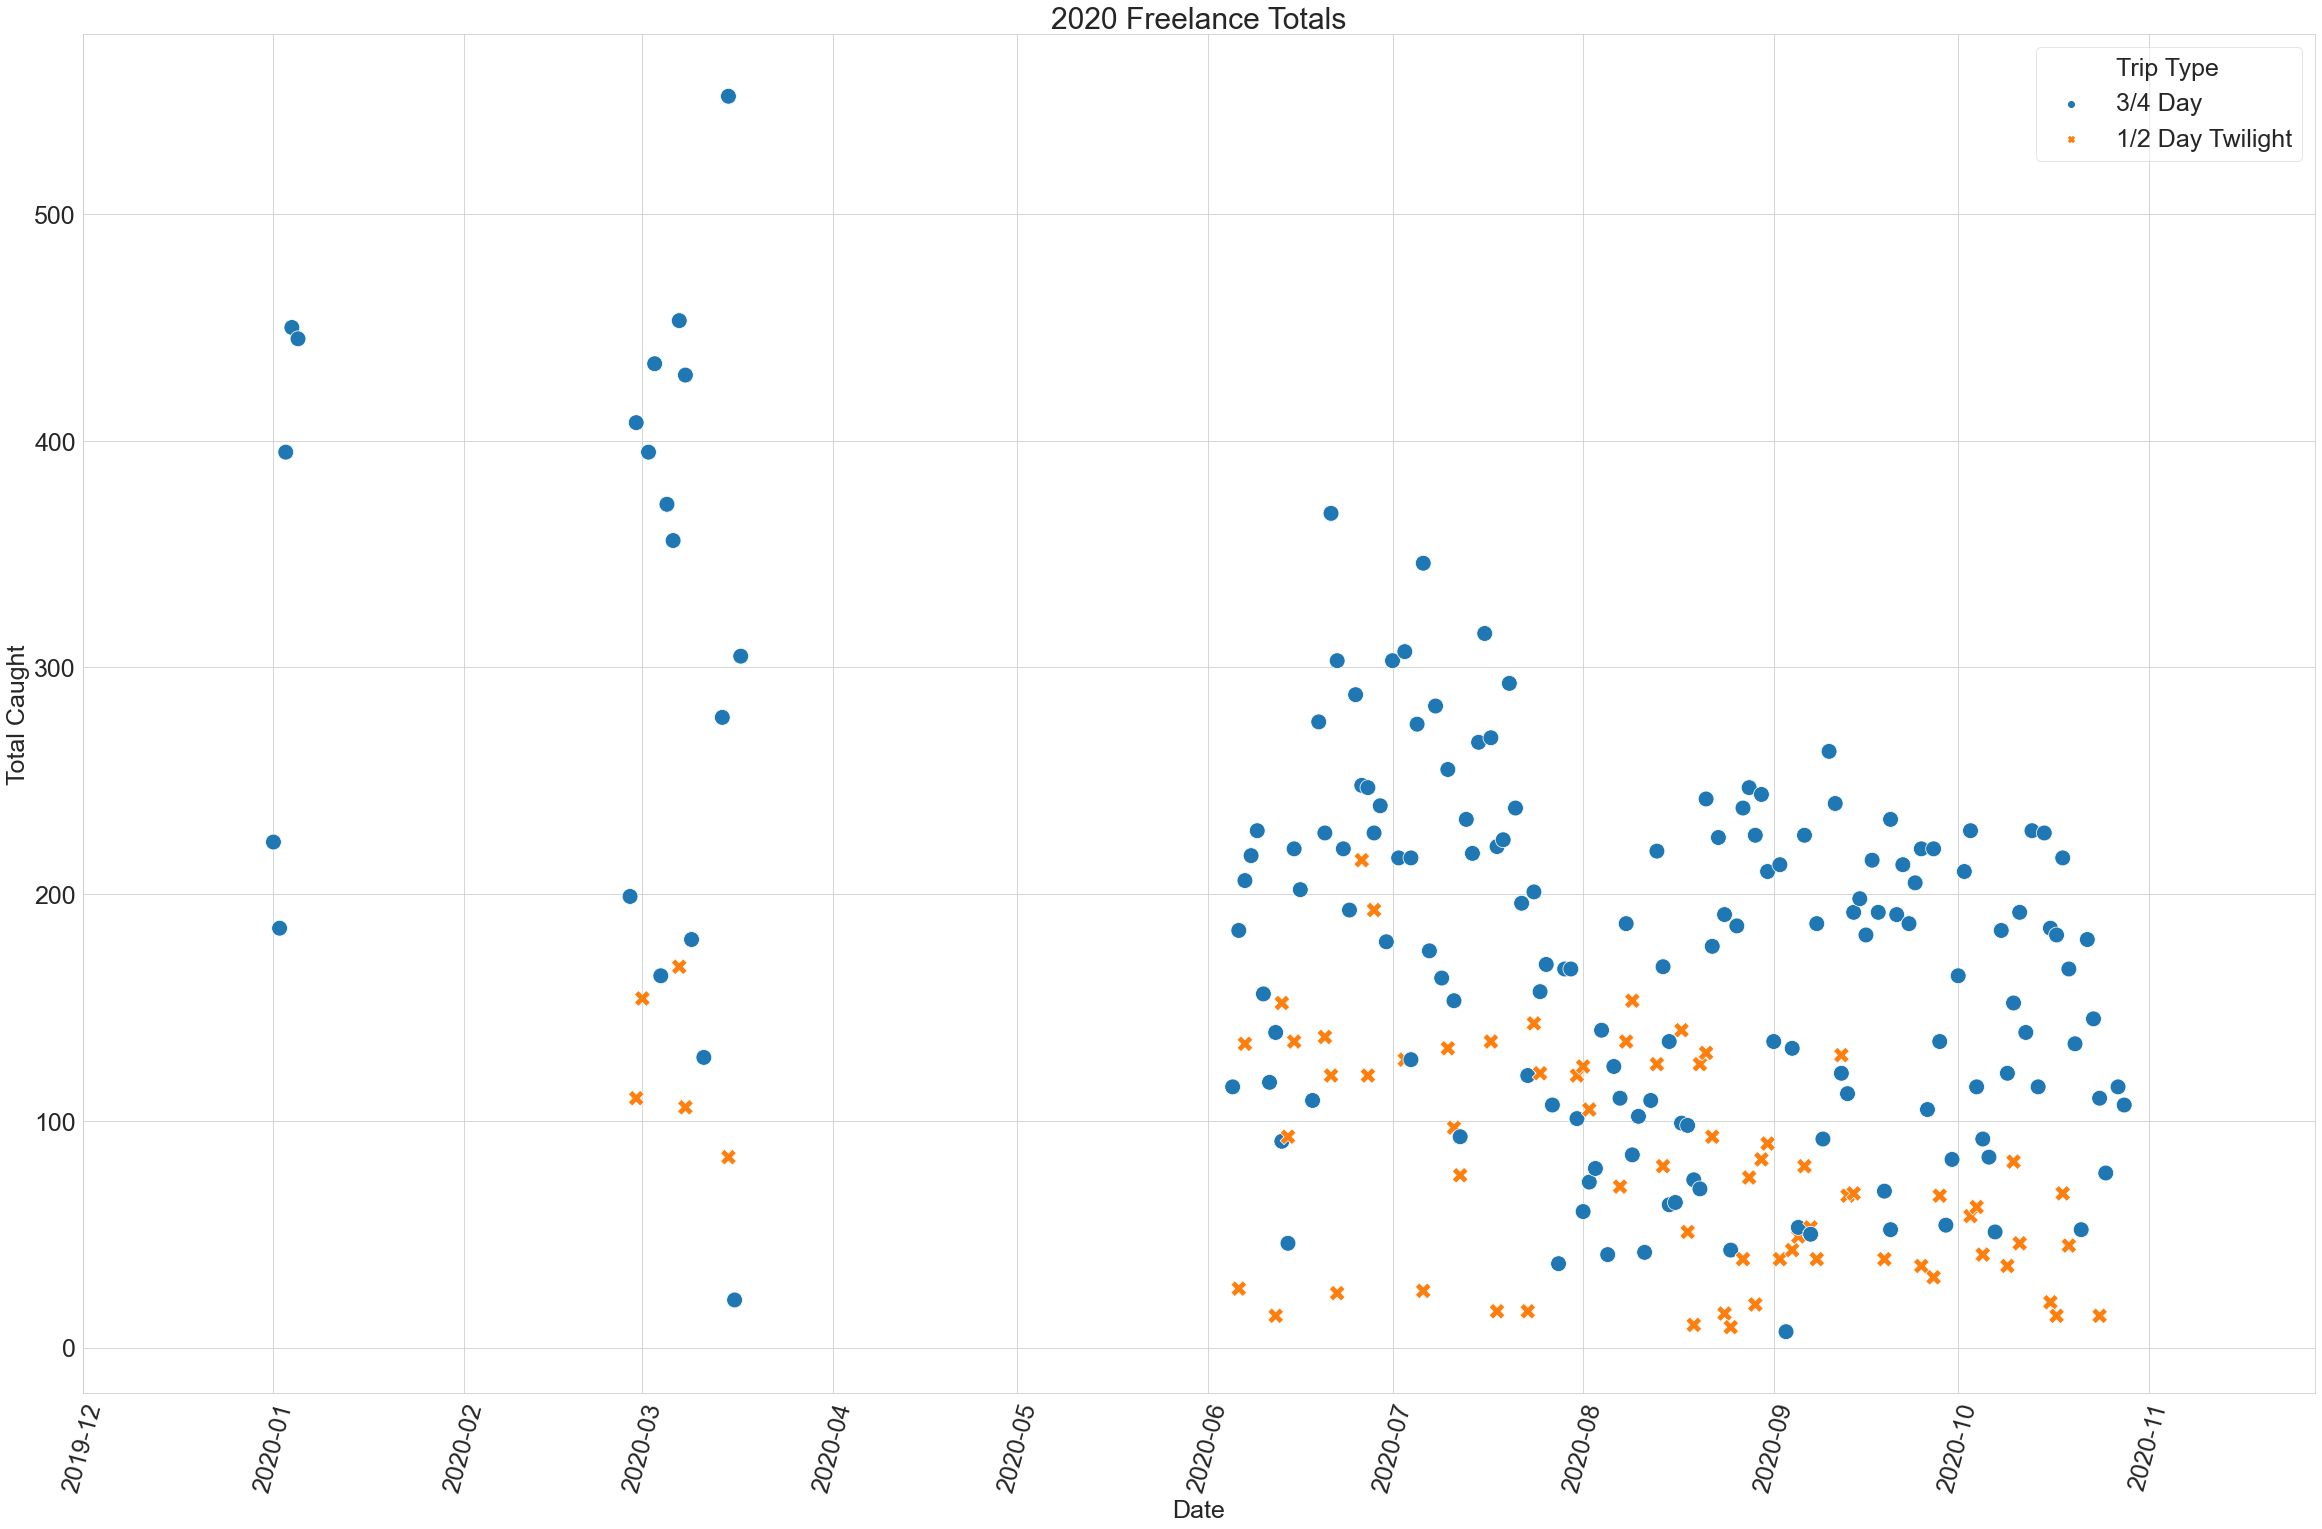

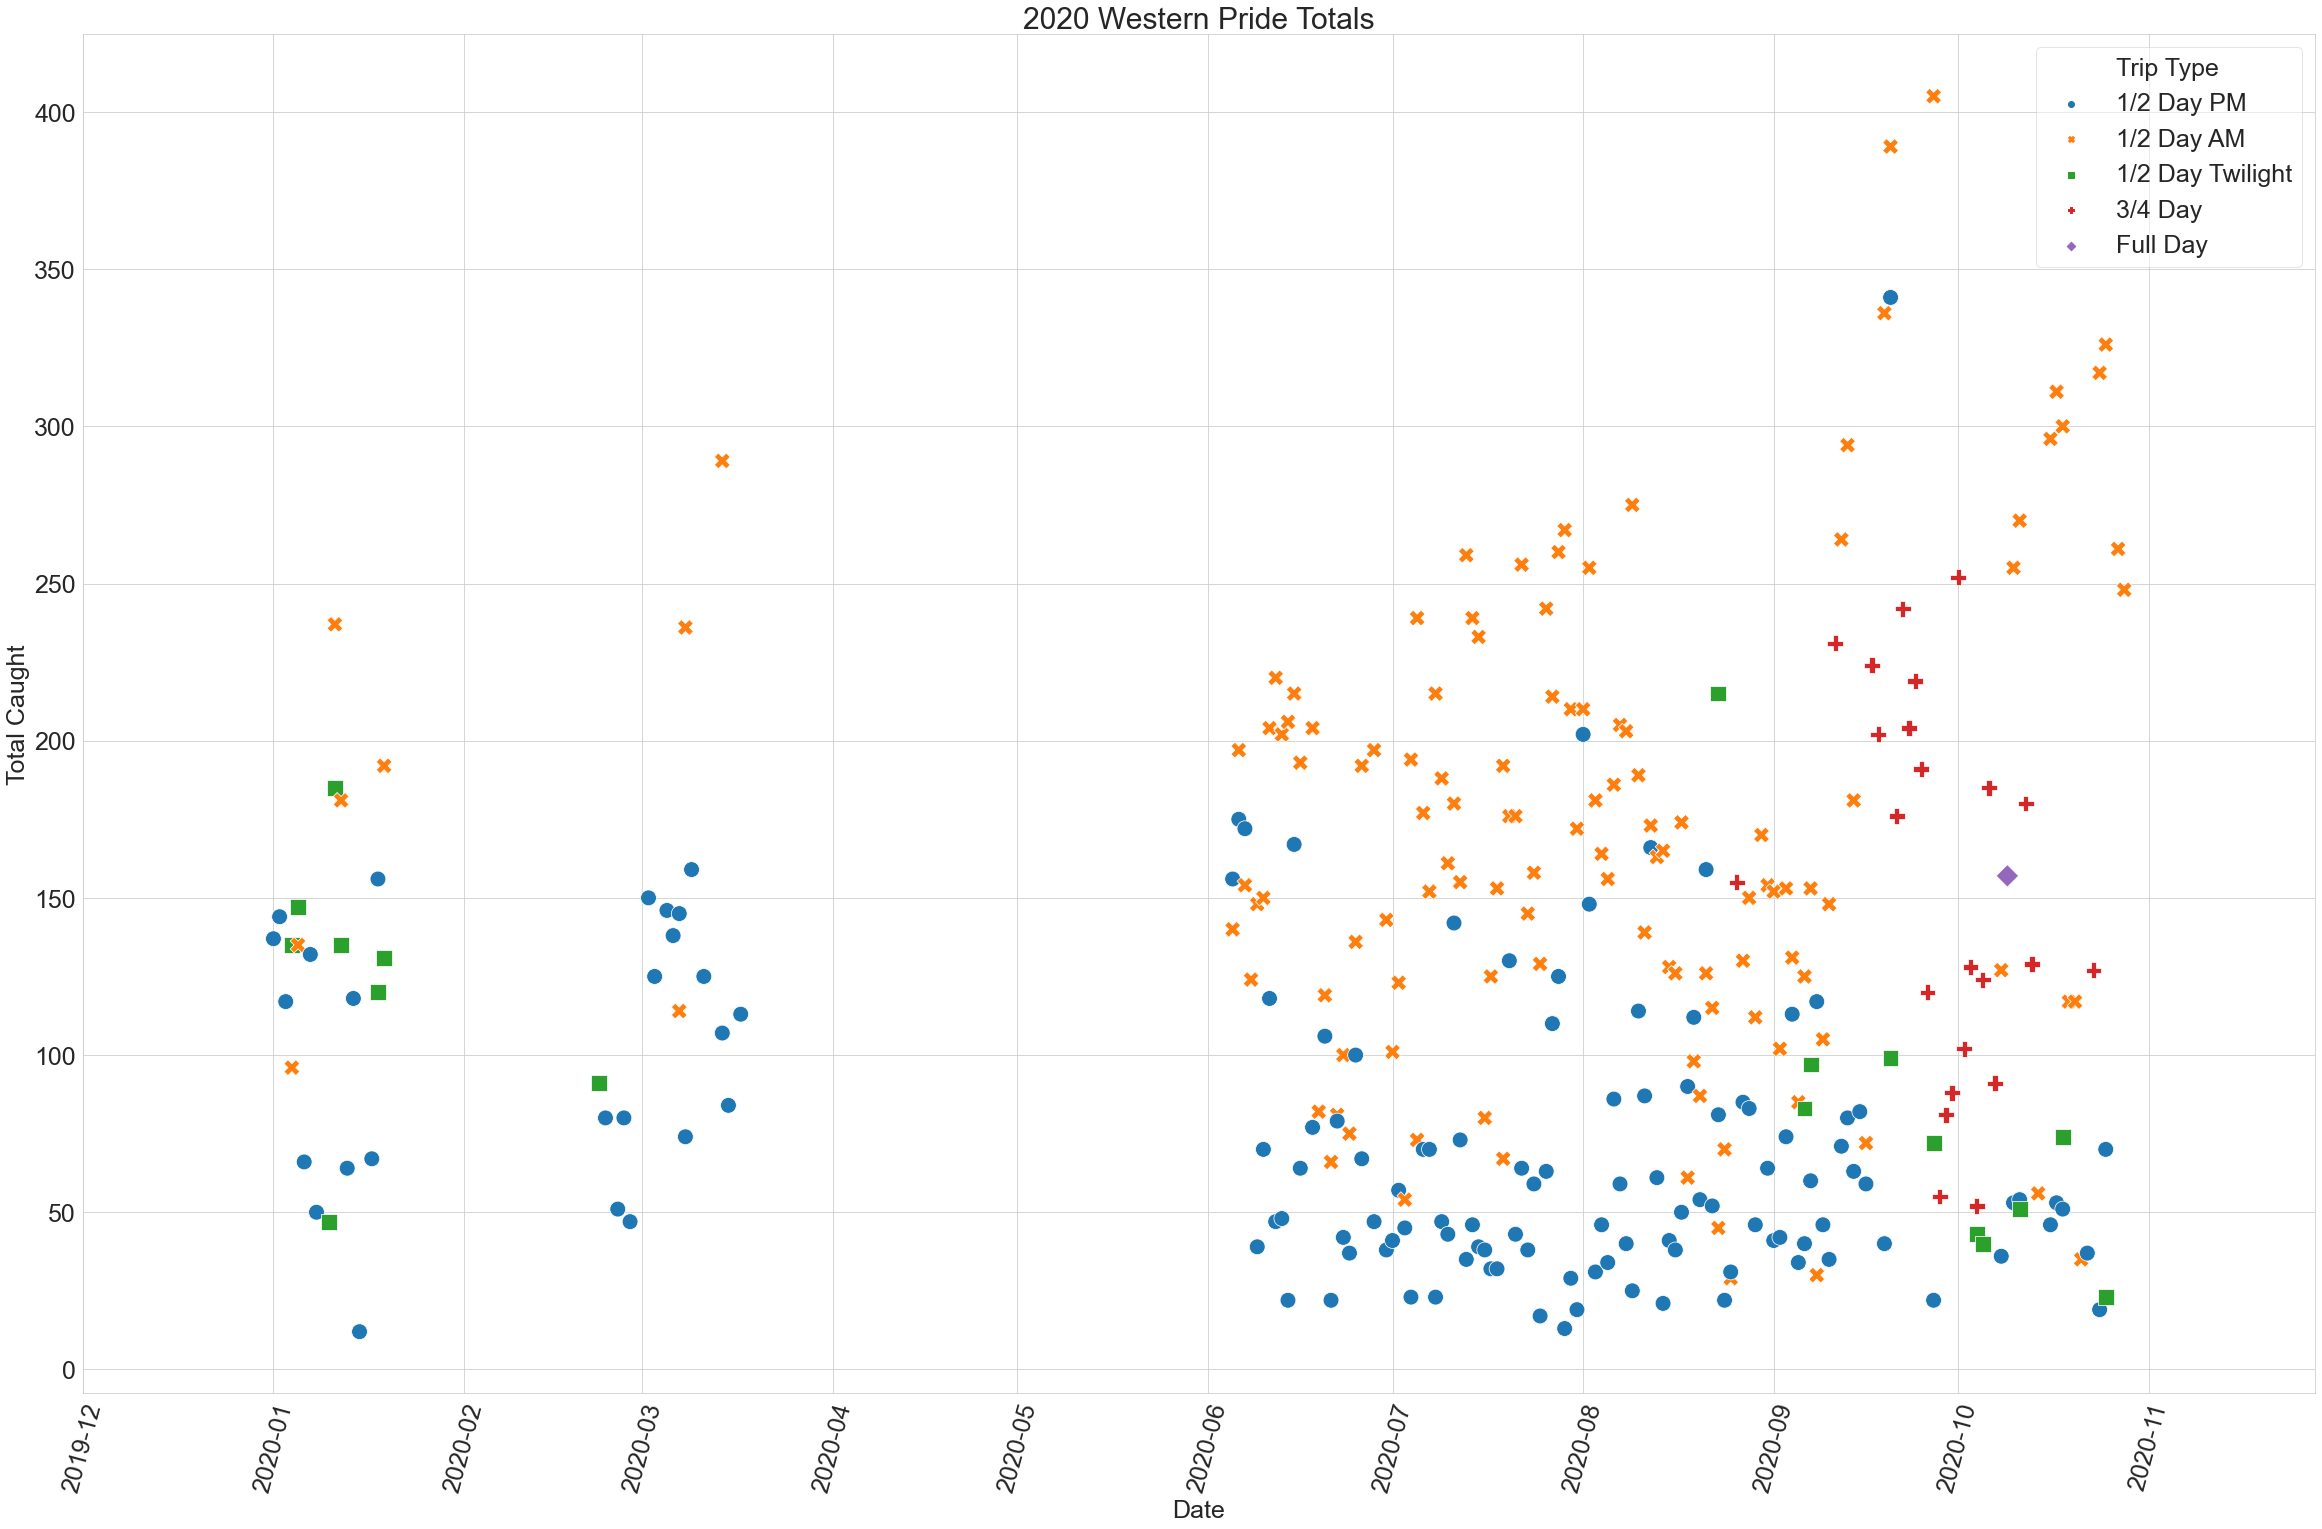

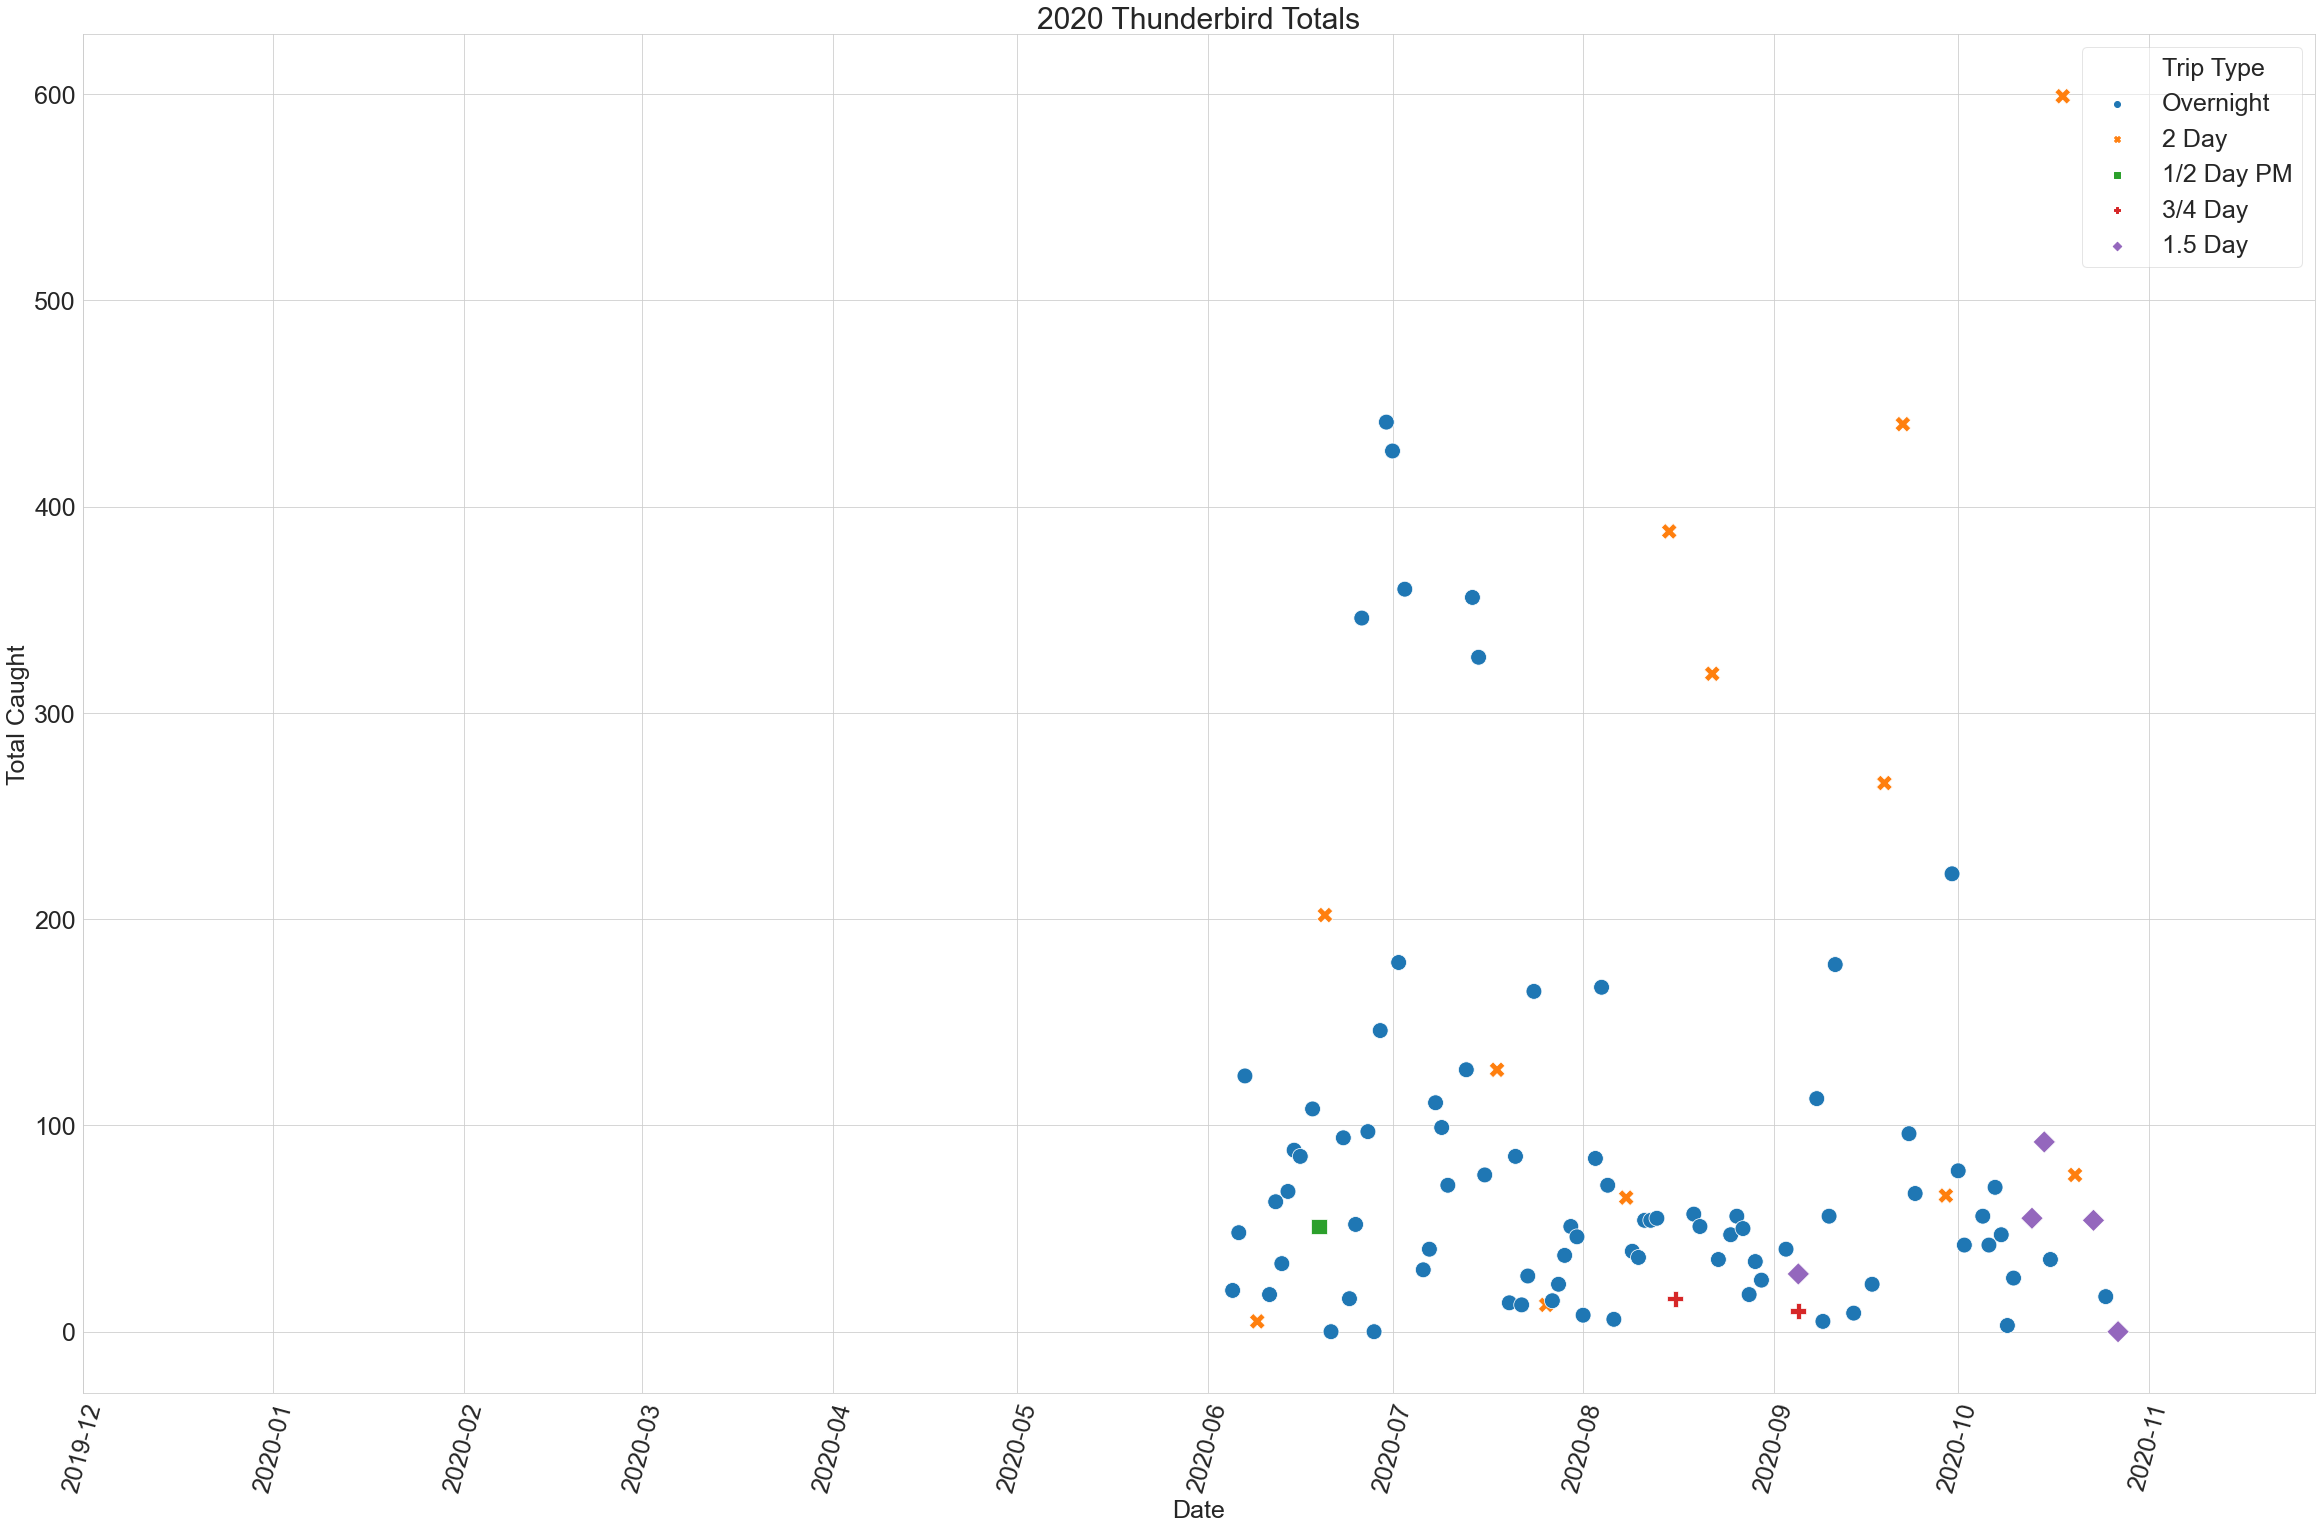

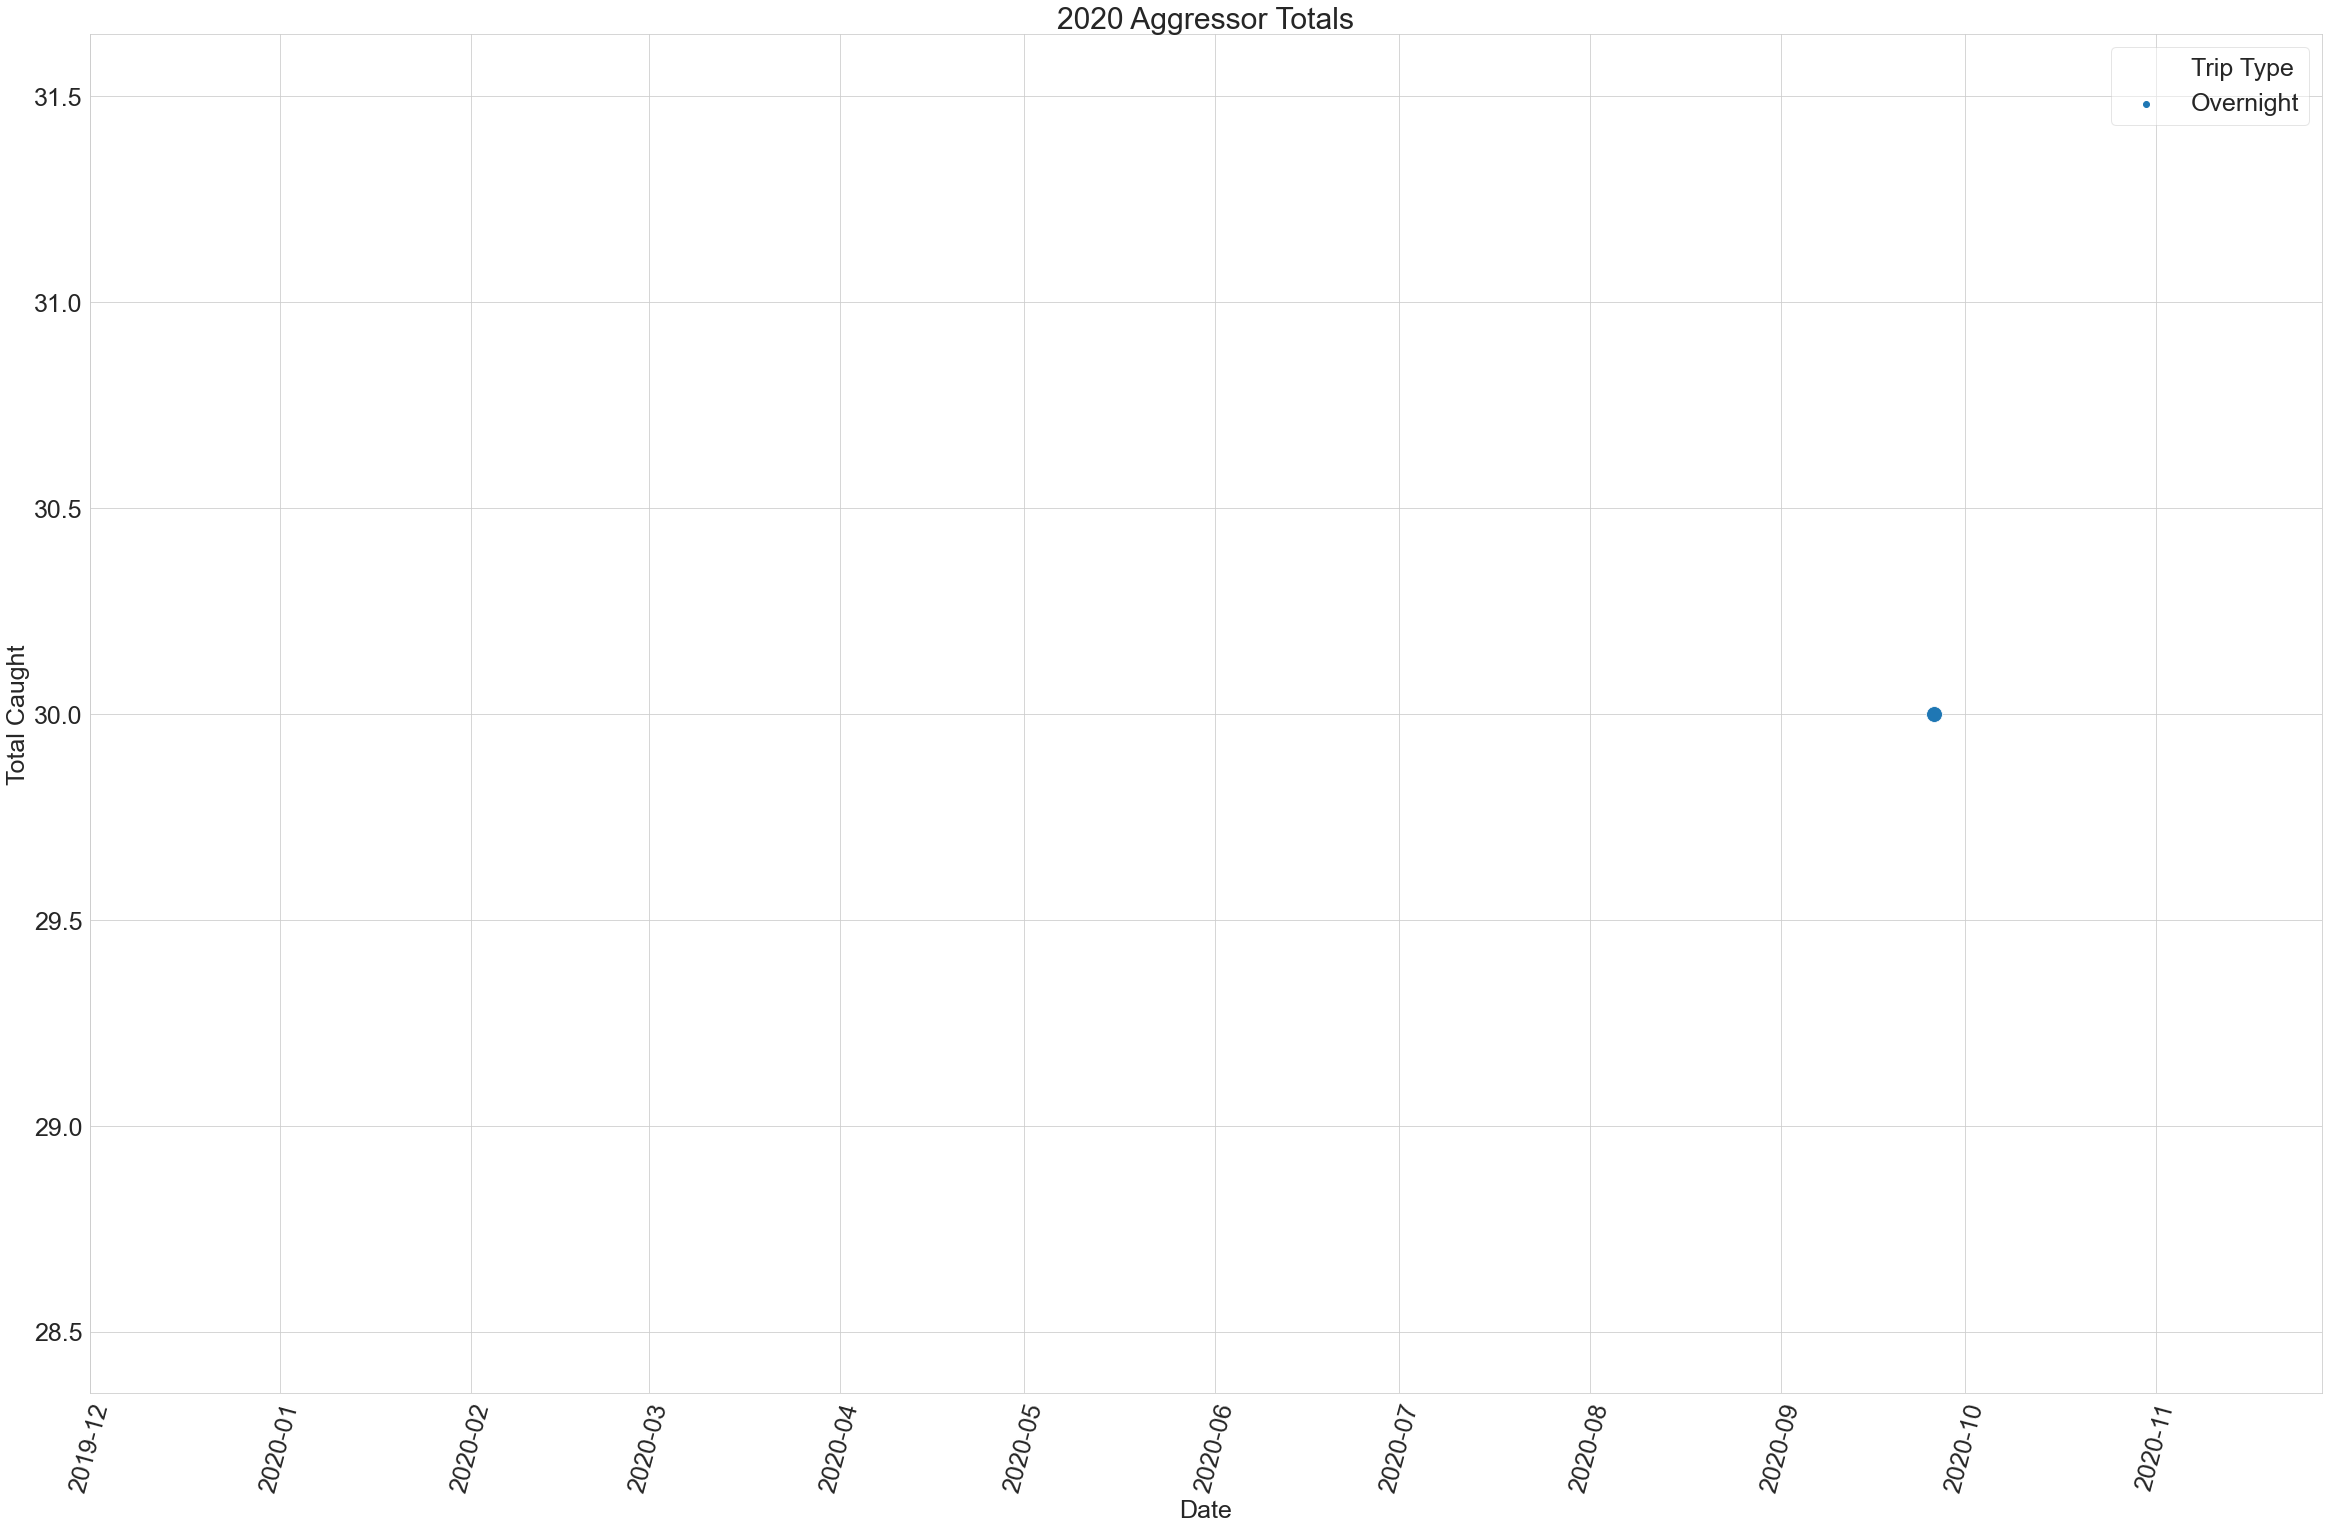

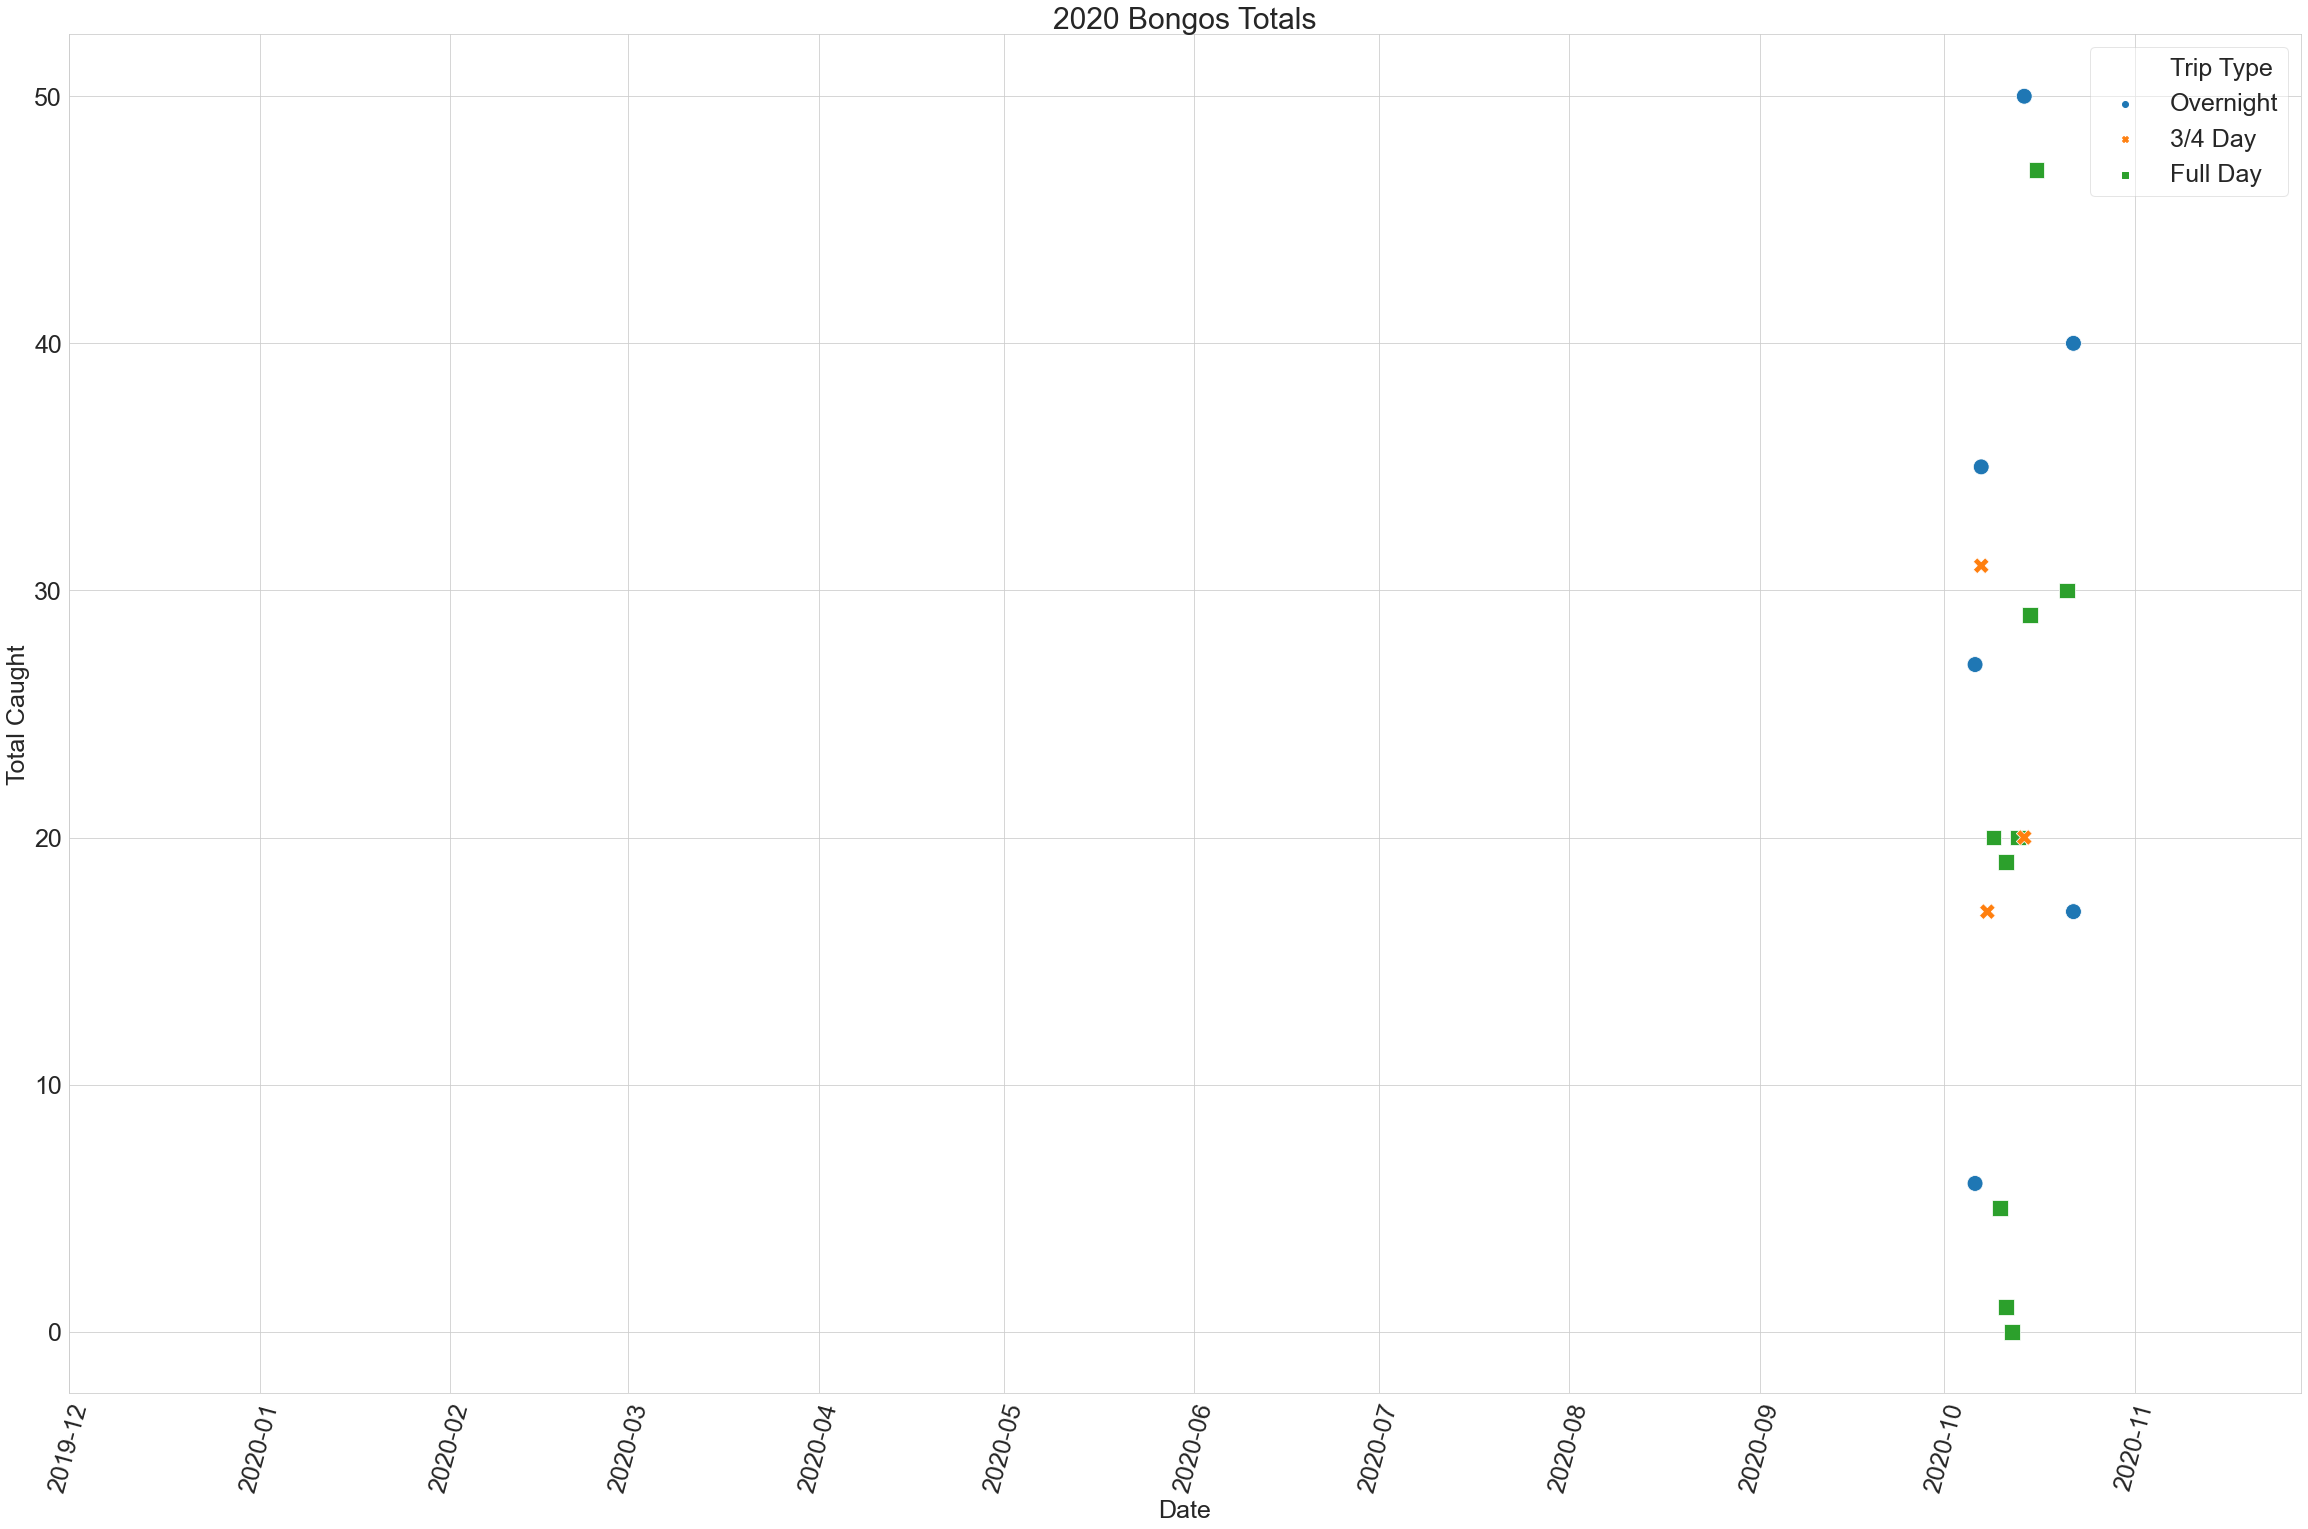

In [10]:
for boat in daveysdf_2020.Boat.unique():
    #sbn.set_style('whitegrid')
    plt.rcParams.update({'font.size':25})
    fig, ax = plt.subplots(figsize=(40,25))
    chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysdf_2020[daveysdf_2020.Boat==boat],
                            hue='Trip Type', style='Trip Type',s=250)
    ax.set_title('2020 '+ boat + ' Totals')
    ax.legend(framealpha=0.5)
    chart.set_xticklabels(labels=daveysdf_2020.Date.unique(),rotation=75)
    ax.set_xlim([daveysdf_2020['Date'].iloc[0] - pd.DateOffset(months=1),
                 daveysdf_2020['Date'].iloc[-1] + pd.DateOffset(months=1)])
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    figure = chart.get_figure()
    #figure.savefig('2020 '+ boat + ' Totals')

In [11]:
daveysBig2019 = daveysdf_2019.iloc[:,:5].copy()
daveysSmall2019 = daveysdf_2019.iloc[:,:5].copy()
#noReleased = df.loc[:,~df.columns.str.endswith("Released")]
daveysBig2019 = daveysBig2019.join(daveysdf_2019[allBigfish])
daveysSmall2019 = daveysSmall2019.join(daveysdf_2019[allSmallfish])
daveysBig2019['Total Caught'] = daveysBig2019.iloc[:,6:-1].sum(axis=1)
daveysSmall2019['Total Caught'] =daveysSmall2019.iloc[:,6:-1].sum(axis=1)
daveysBig2019['Average'] = daveysBig2019['Total Caught'] / daveysBig2019.Anglers
daveysSmall2019['Average'] =daveysSmall2019['Total Caught'] / daveysBig2019.Anglers
daveysSmall2019

,Landing,Date,Boat,Trip Type,Anglers,Barracuda,Barracuda Released,Black Croaker,Black Seabass Released,Blacksmith,...,Vermilion Rockfish Released,White Croaker,White Seabass,White Seabass Released,Whitefish,Whitefish Released,Wolf Eel,Yellowfin Croaker,Total Caught,Average
0,daveys-locker,2019-01-11,Western Pride,1/2 Day PM,35,0,0,0,0,10,...,0,0,0,0,0,0,0,0,64,1.828571
1,daveys-locker,2019-01-12,Western Pride,1/2 Day Twilight,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,166,2.515152
2,daveys-locker,2019-01-19,Western Pride,1/2 Day AM,76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,292,3.842105
3,daveys-locker,2019-01-19,Western Pride,1/2 Day Twilight,67,0,0,5,0,0,...,0,0,0,0,0,0,0,0,193,2.880597
4,daveys-locker,2019-01-20,Western Pride,1/2 Day AM,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,161,2.596774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,daveys-locker,2019-12-29,Freelance,3/4 Day,80,0,0,0,0,300,...,0,0,0,0,201,0,0,0,605,7.562500
799,daveys-locker,2019-12-30,Freelance,3/4 Day,64,0,0,0,0,112,...,0,0,0,0,308,0,0,0,542,8.468750
800,daveys-locker,2019-12-30,Western Pride,1/2 Day AM,38,0,0,0,0,12,...,0,0,0,0,10,0,0,0,208,5.473684
801,daveys-locker,2019-12-31,Freelance,3/4 Day,71,0,0,0,0,31,...,0,0,0,0,410,0,0,0,651,9.169014


In [12]:
daveysBig2020 = daveysdf_2020.iloc[:,:5].copy()
daveysSmall2020 = daveysdf_2020.iloc[:,:5].copy()
#noReleased = df.loc[:,~df.columns.str.endswith("Released")]
daveysBig2020 = daveysBig2020.join(daveysdf_2020[allBigfish])
daveysSmall2020 = daveysSmall2020.join(daveysdf_2020[allSmallfish])
daveysBig2020['Total Caught'] = daveysBig2020.iloc[:,6:-1].sum(axis=1)
daveysSmall2020['Total Caught'] =daveysSmall2020.iloc[:,6:-1].sum(axis=1)
daveysBig2020['Average'] = daveysBig2020['Total Caught'] / daveysBig2020.Anglers
daveysSmall2020['Average'] =daveysSmall2020['Total Caught'] / daveysSmall2020.Anglers
daveysBig2020

,Landing,Date,Boat,Trip Type,Anglers,Albacore,Bluefin Tuna,Dorado,Skipjack Tuna,Yellowfin Tuna,Yellowtail,Thresher Shark,Total Caught,Average
803,daveys-locker,2020-01-01,Freelance,3/4 Day,55,0,0,0,0,0,0,0,0,0.000000
804,daveys-locker,2020-01-01,Western Pride,1/2 Day PM,38,0,0,0,0,0,0,0,0,0.000000
805,daveys-locker,2020-01-02,Freelance,3/4 Day,75,0,0,0,0,0,0,0,0,0.000000
806,daveys-locker,2020-01-02,Western Pride,1/2 Day PM,38,0,0,0,0,0,0,0,0,0.000000
807,daveys-locker,2020-01-03,Freelance,3/4 Day,77,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,daveys-locker,2020-10-27,Freelance,3/4 Day,39,0,0,0,0,0,1,0,1,0.025641
1460,daveys-locker,2020-10-27,Thunderbird,1.5 Day,24,0,0,0,0,0,0,0,0,0.000000
1461,daveys-locker,2020-10-27,Western Pride,1/2 Day AM,30,0,0,0,0,0,0,0,0,0.000000
1462,daveys-locker,2020-10-28,Freelance,3/4 Day,45,0,0,0,0,0,2,0,2,0.044444


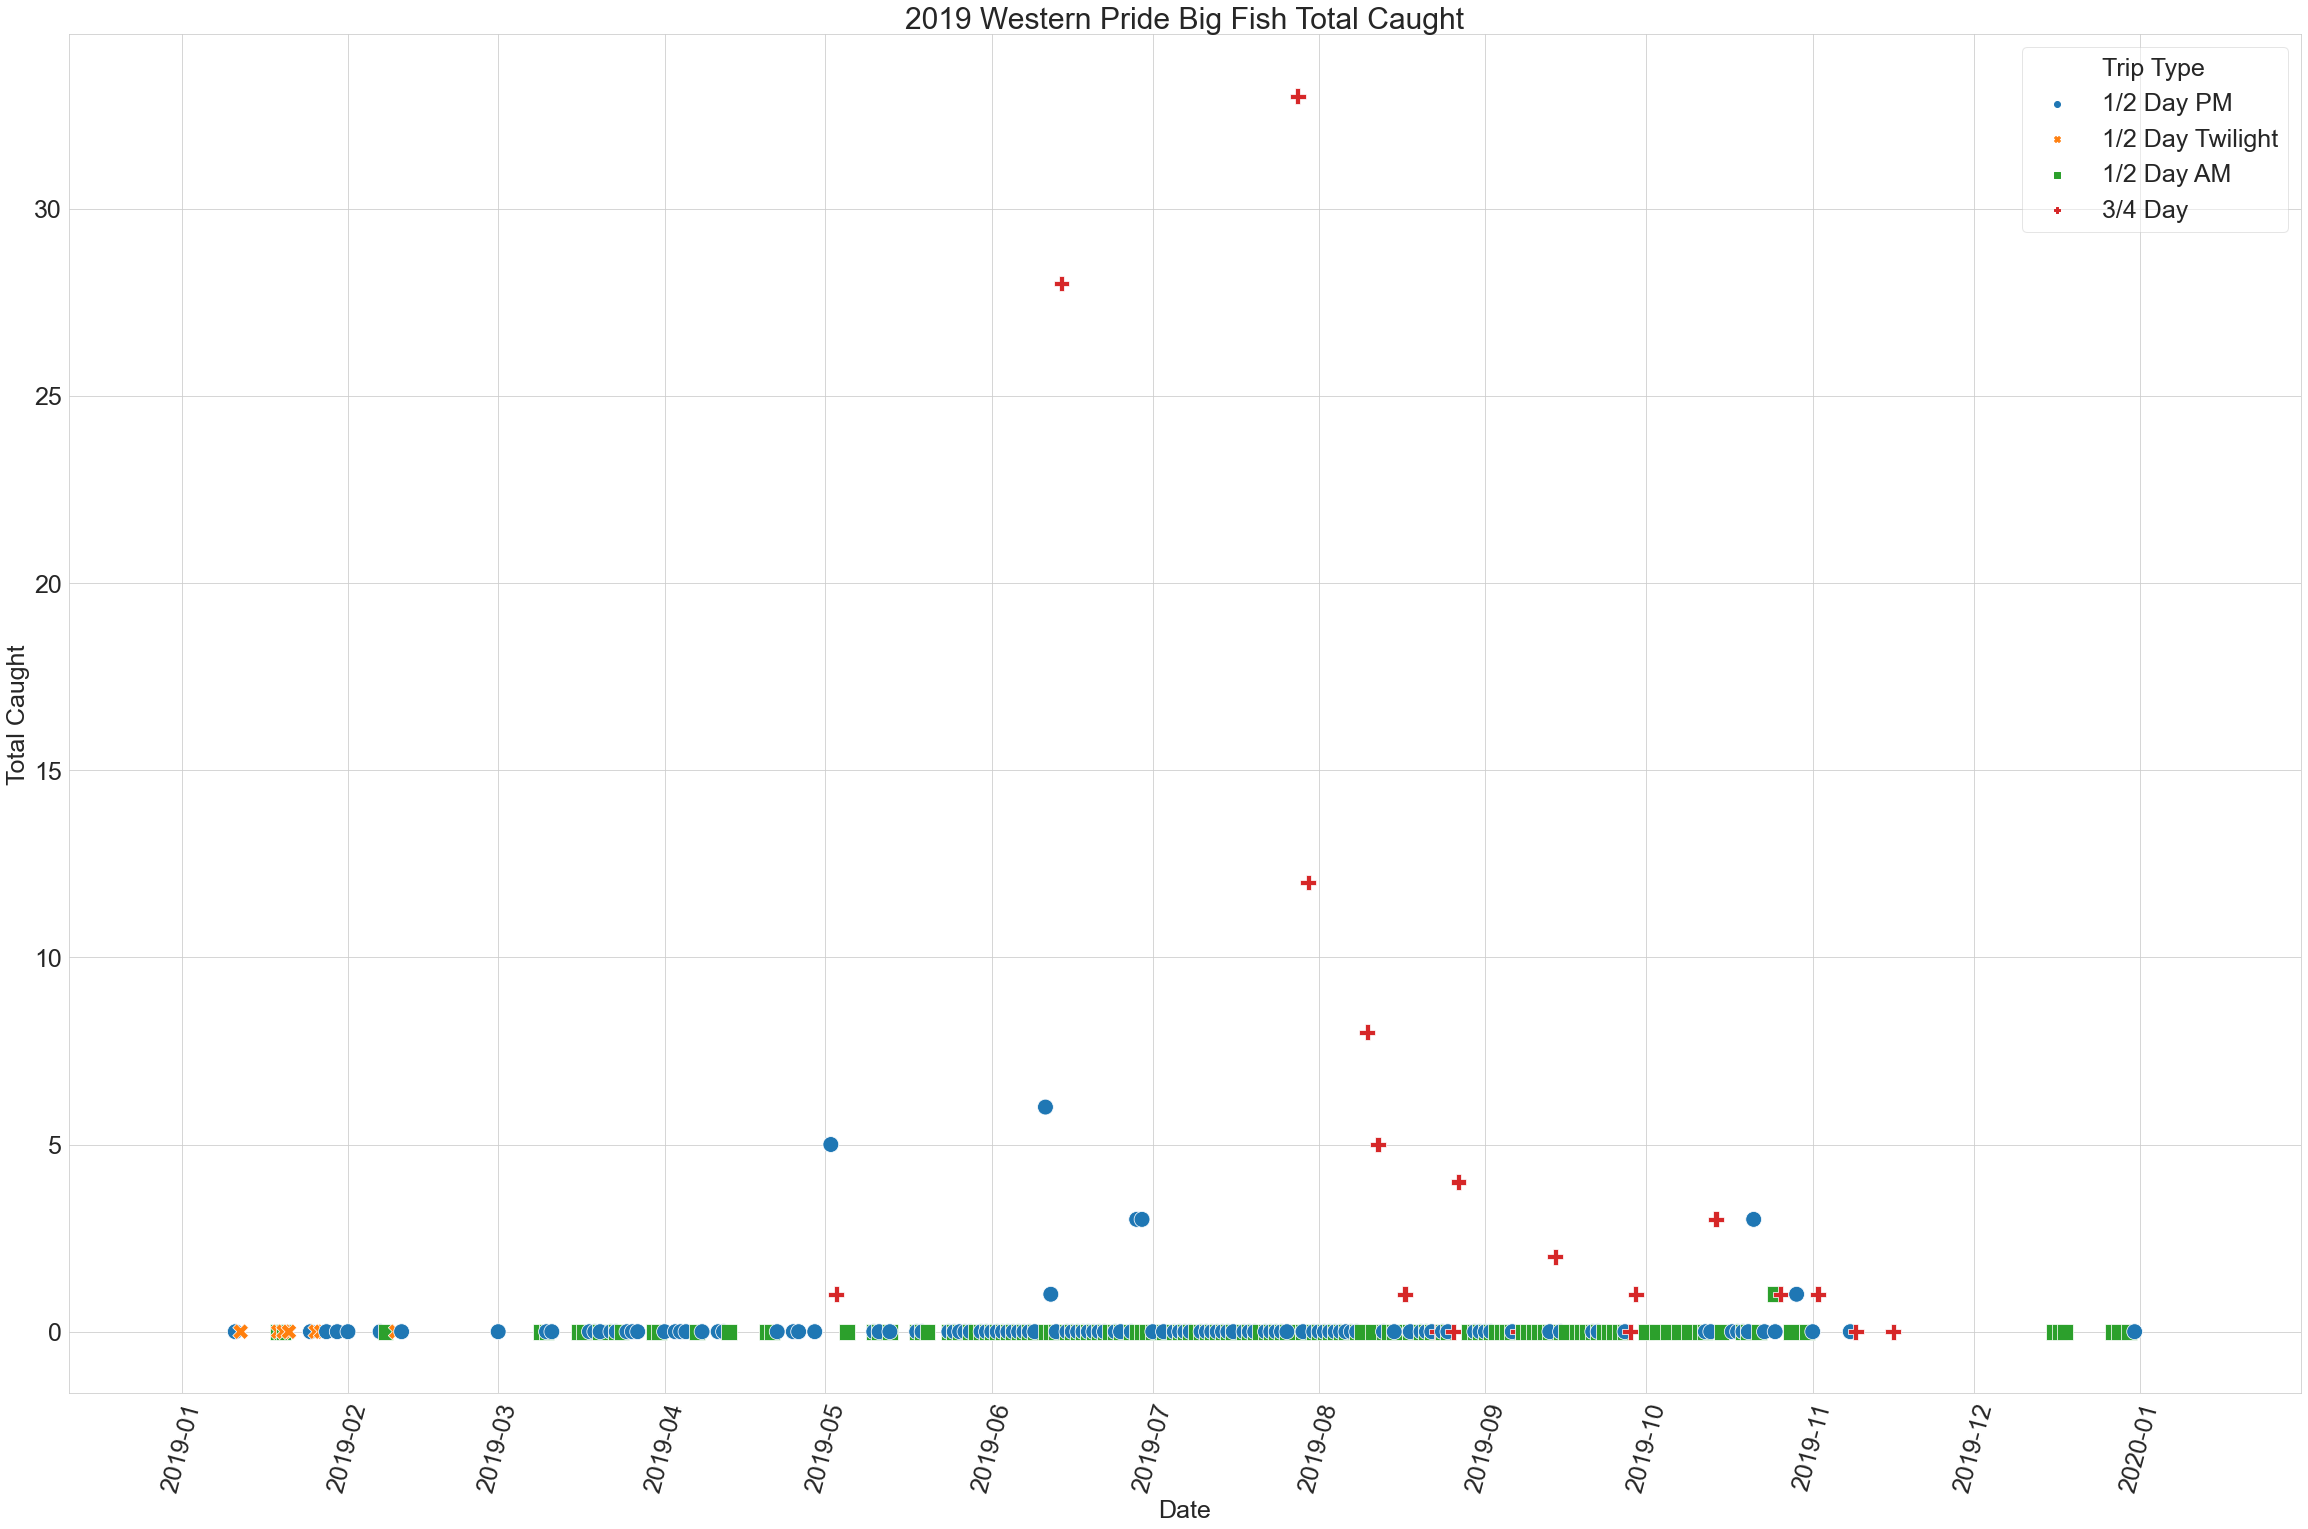

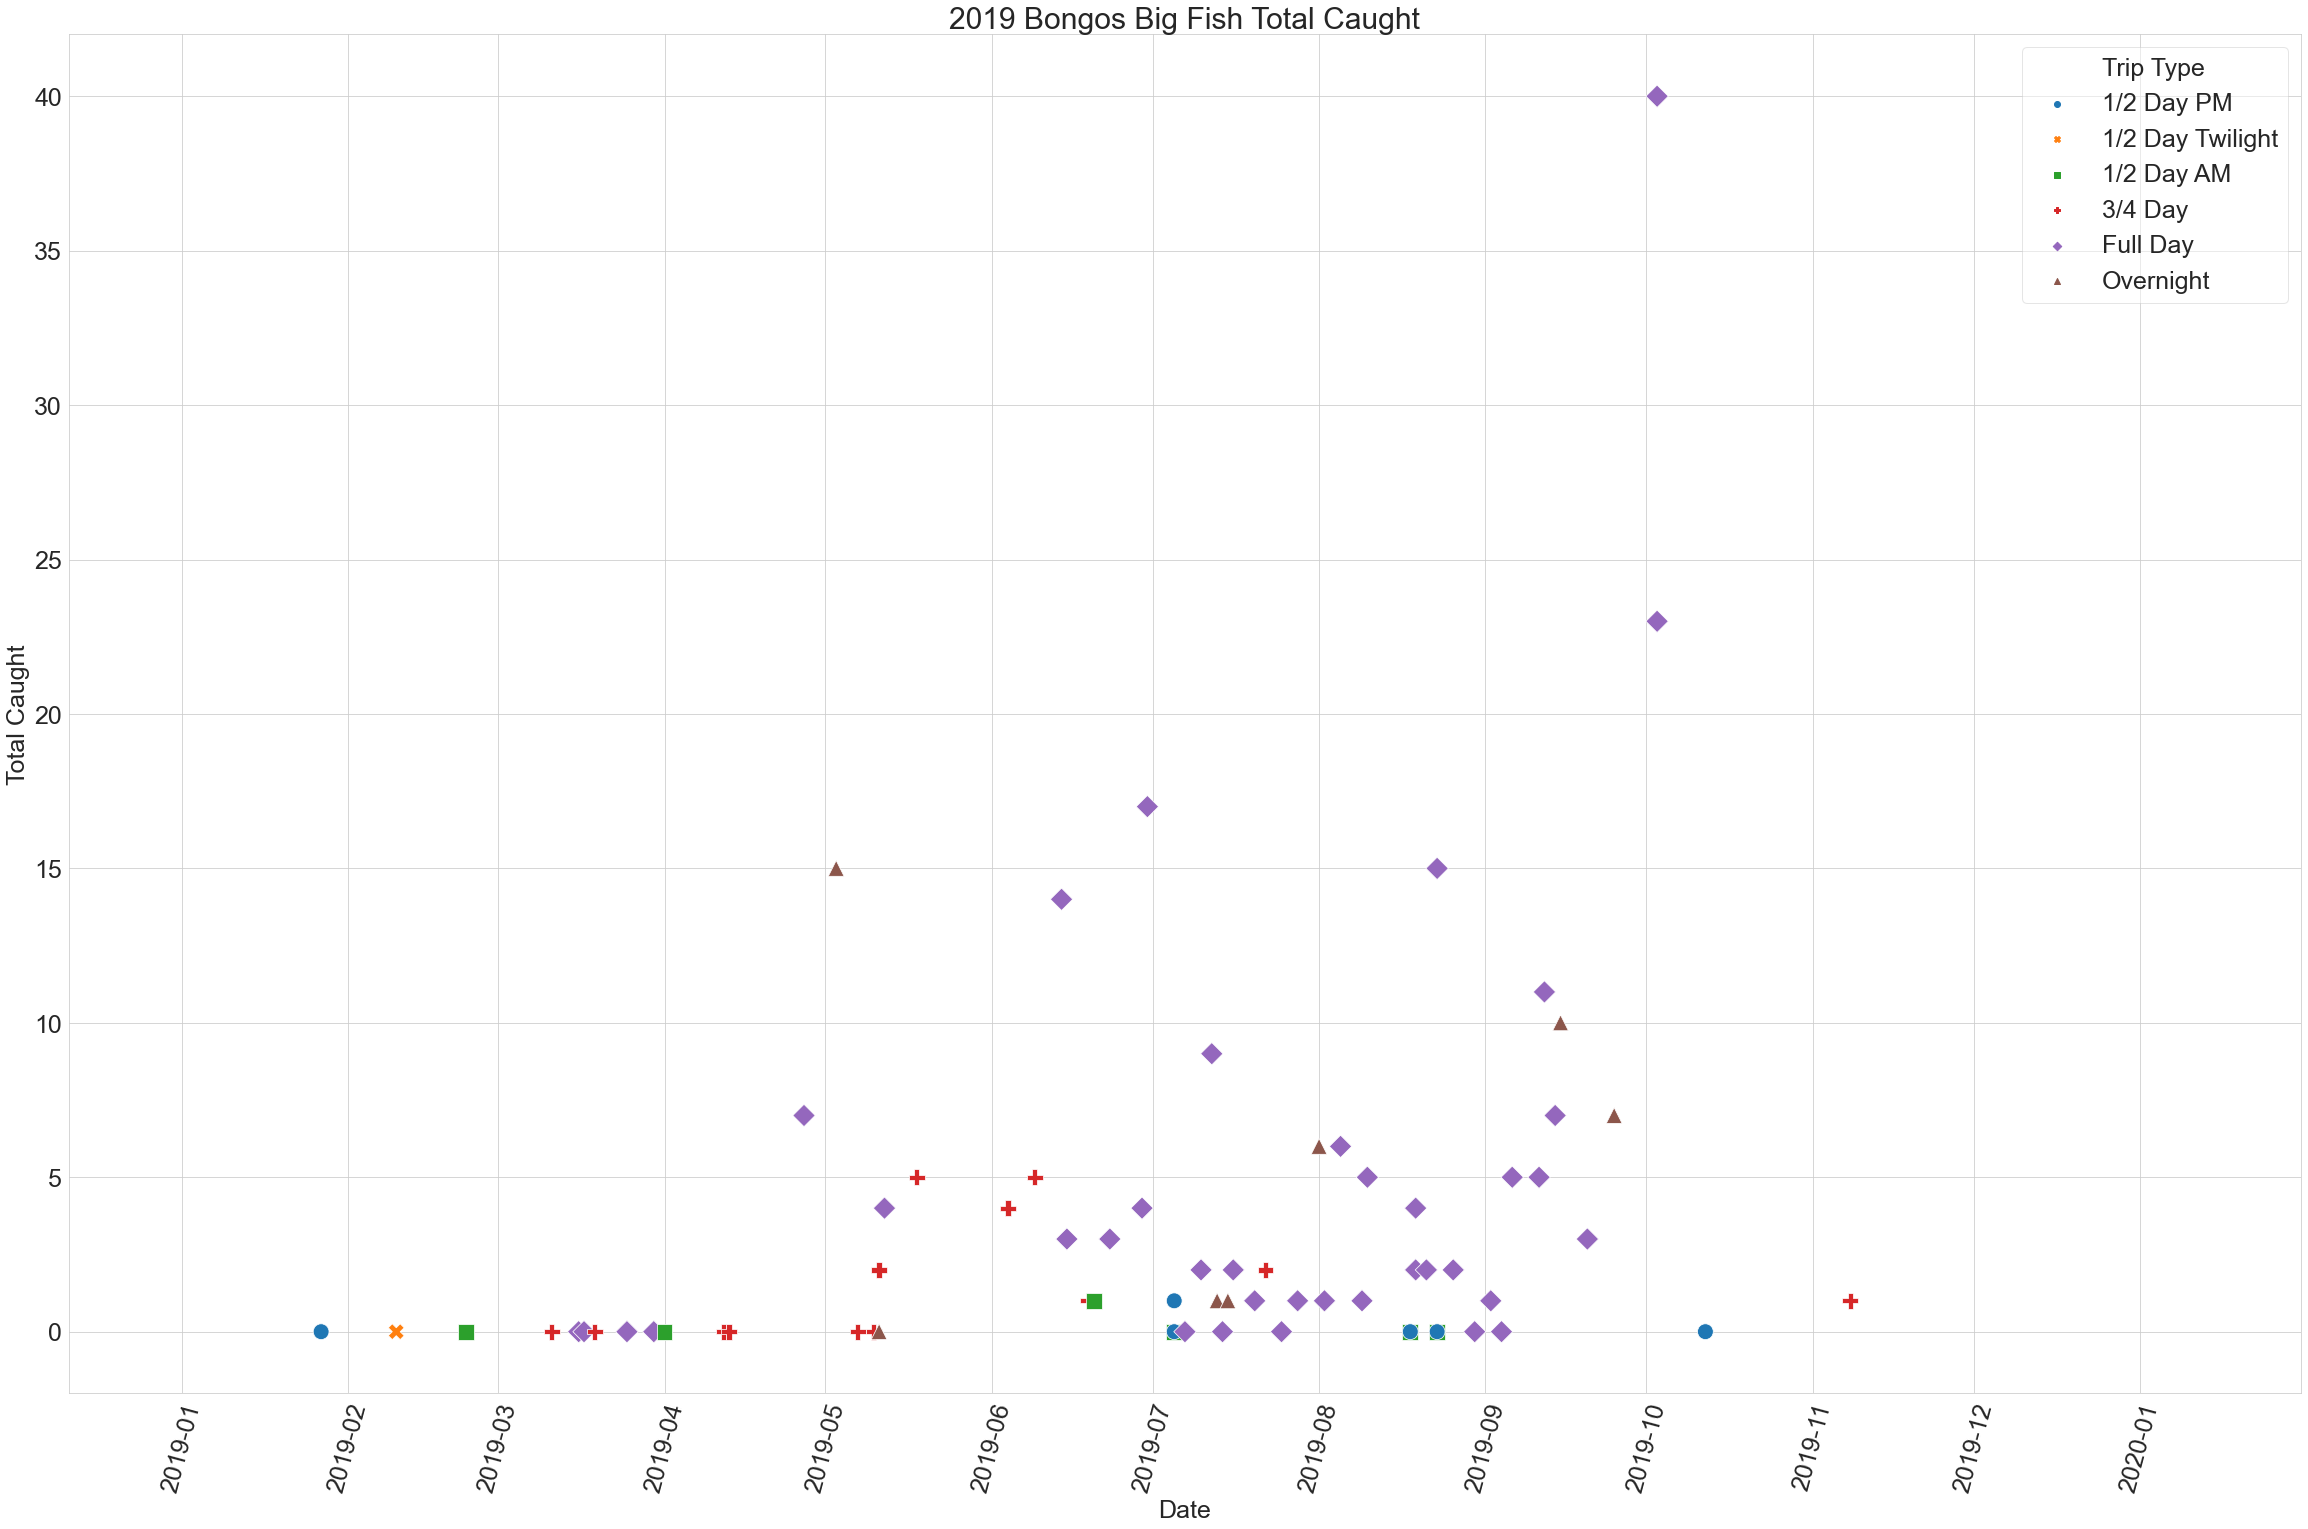

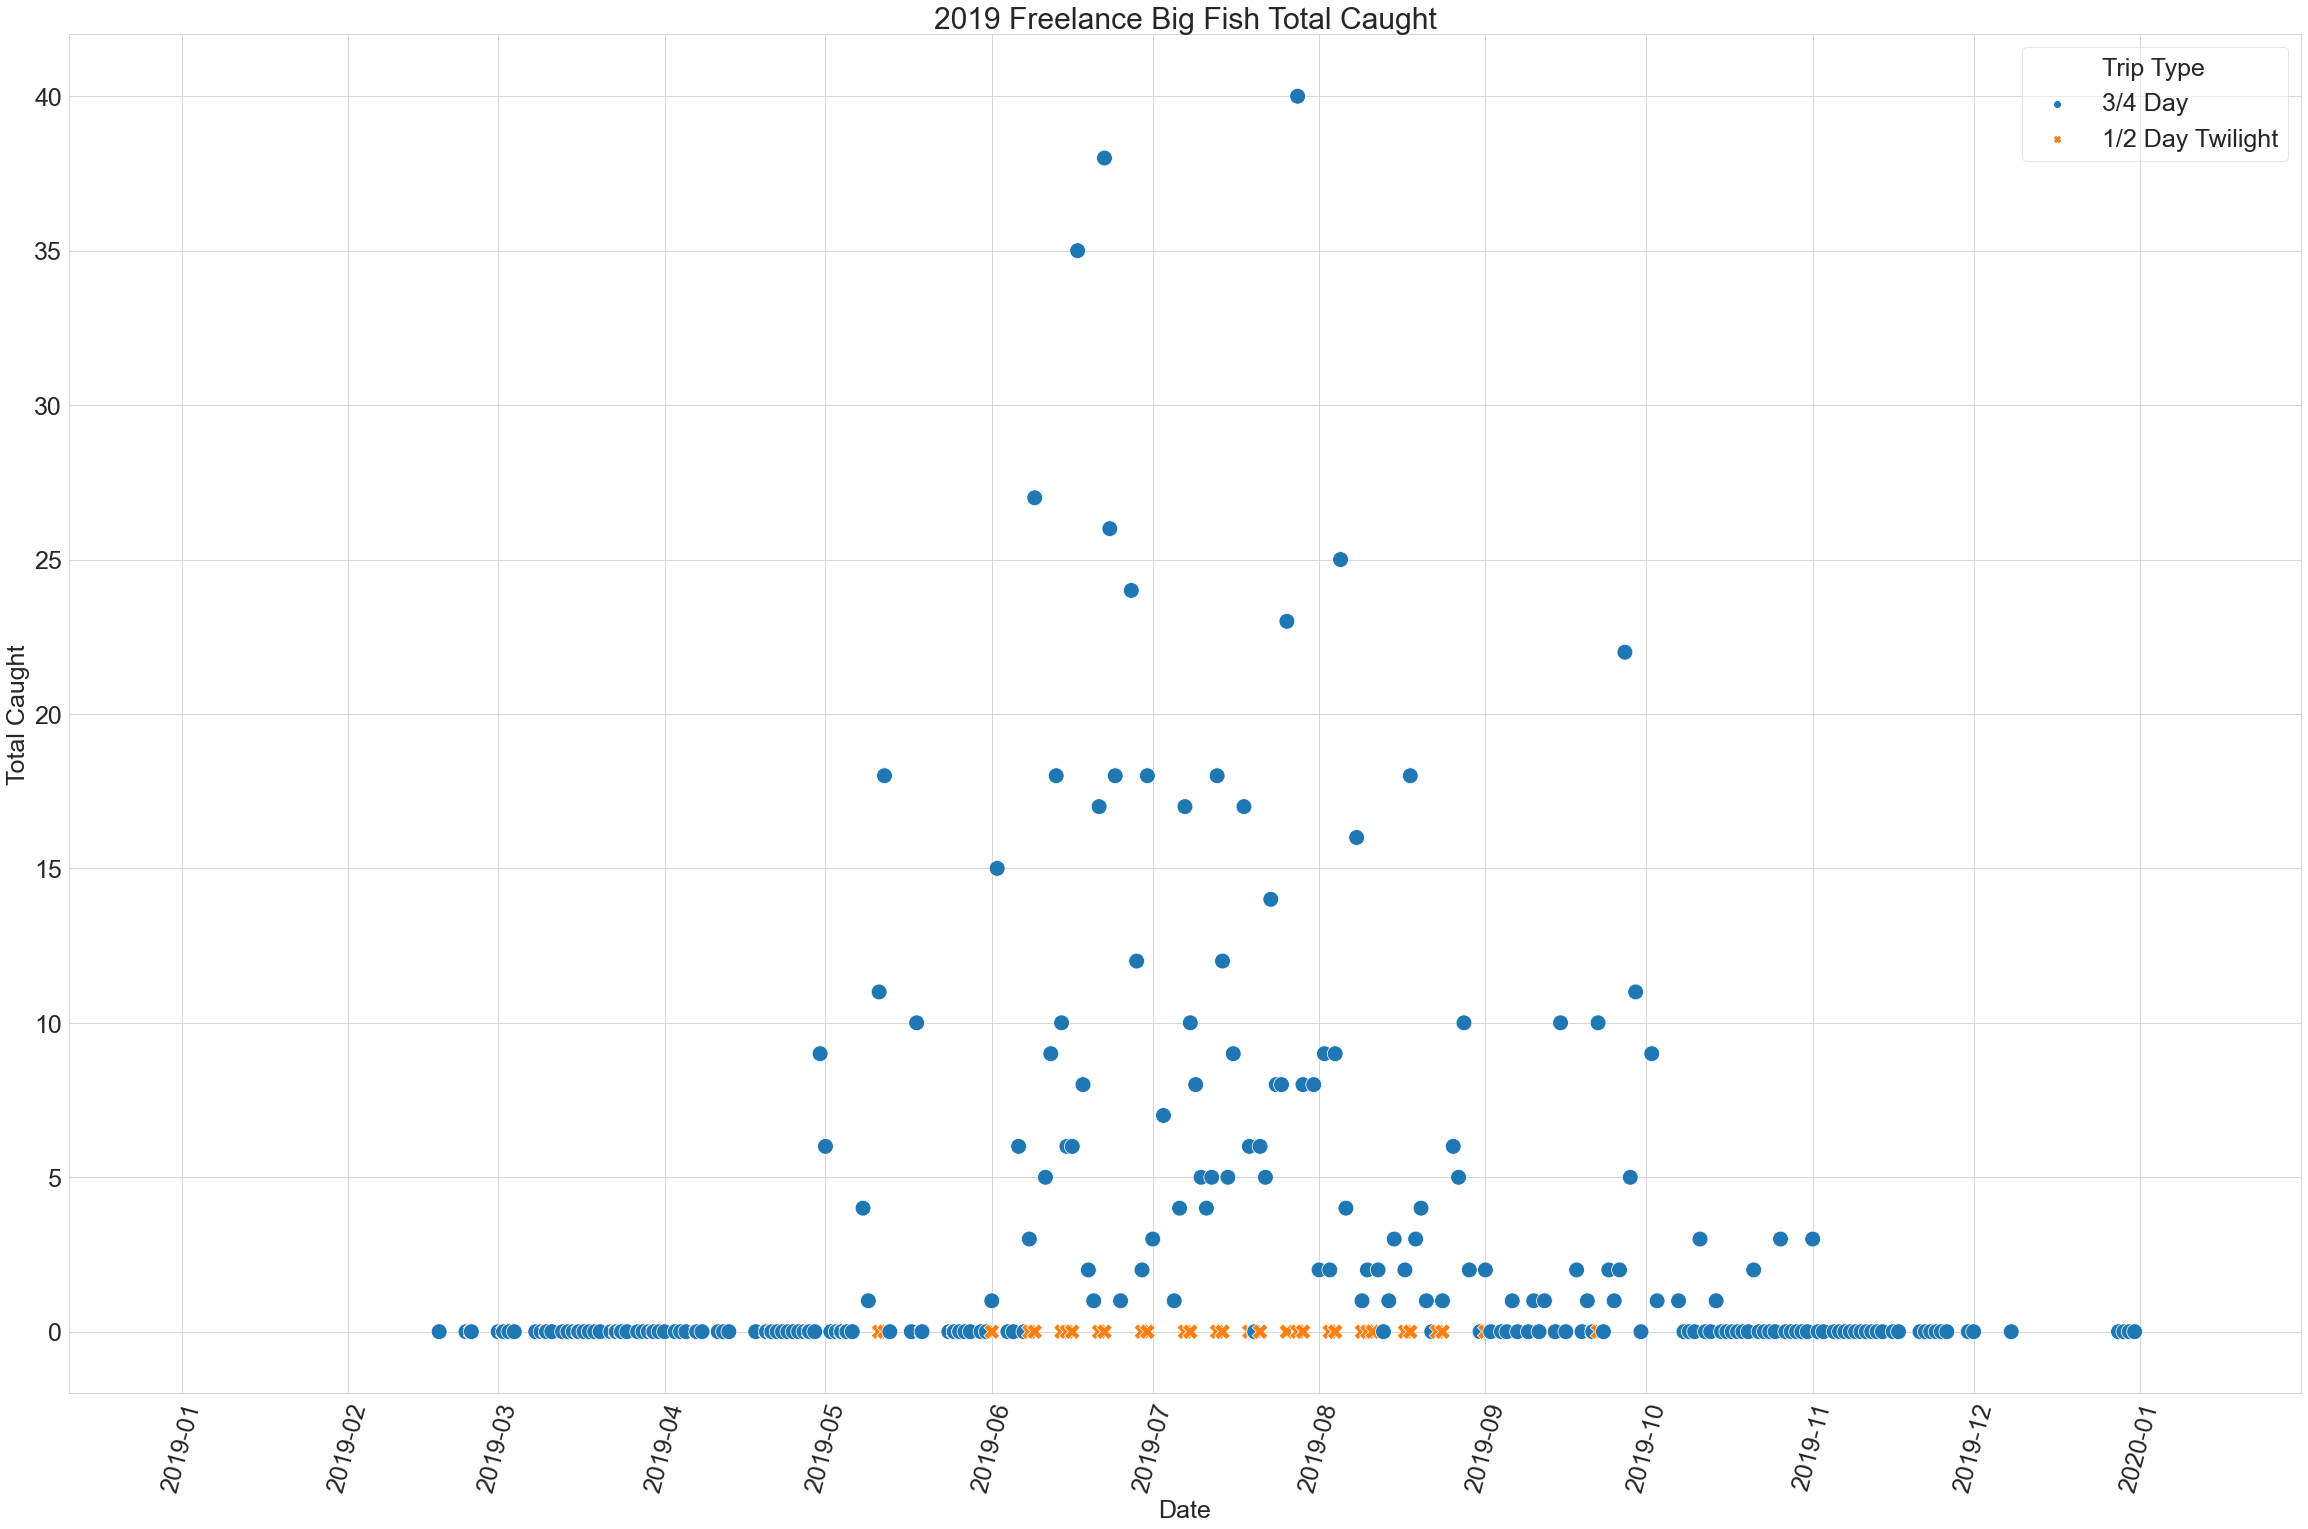

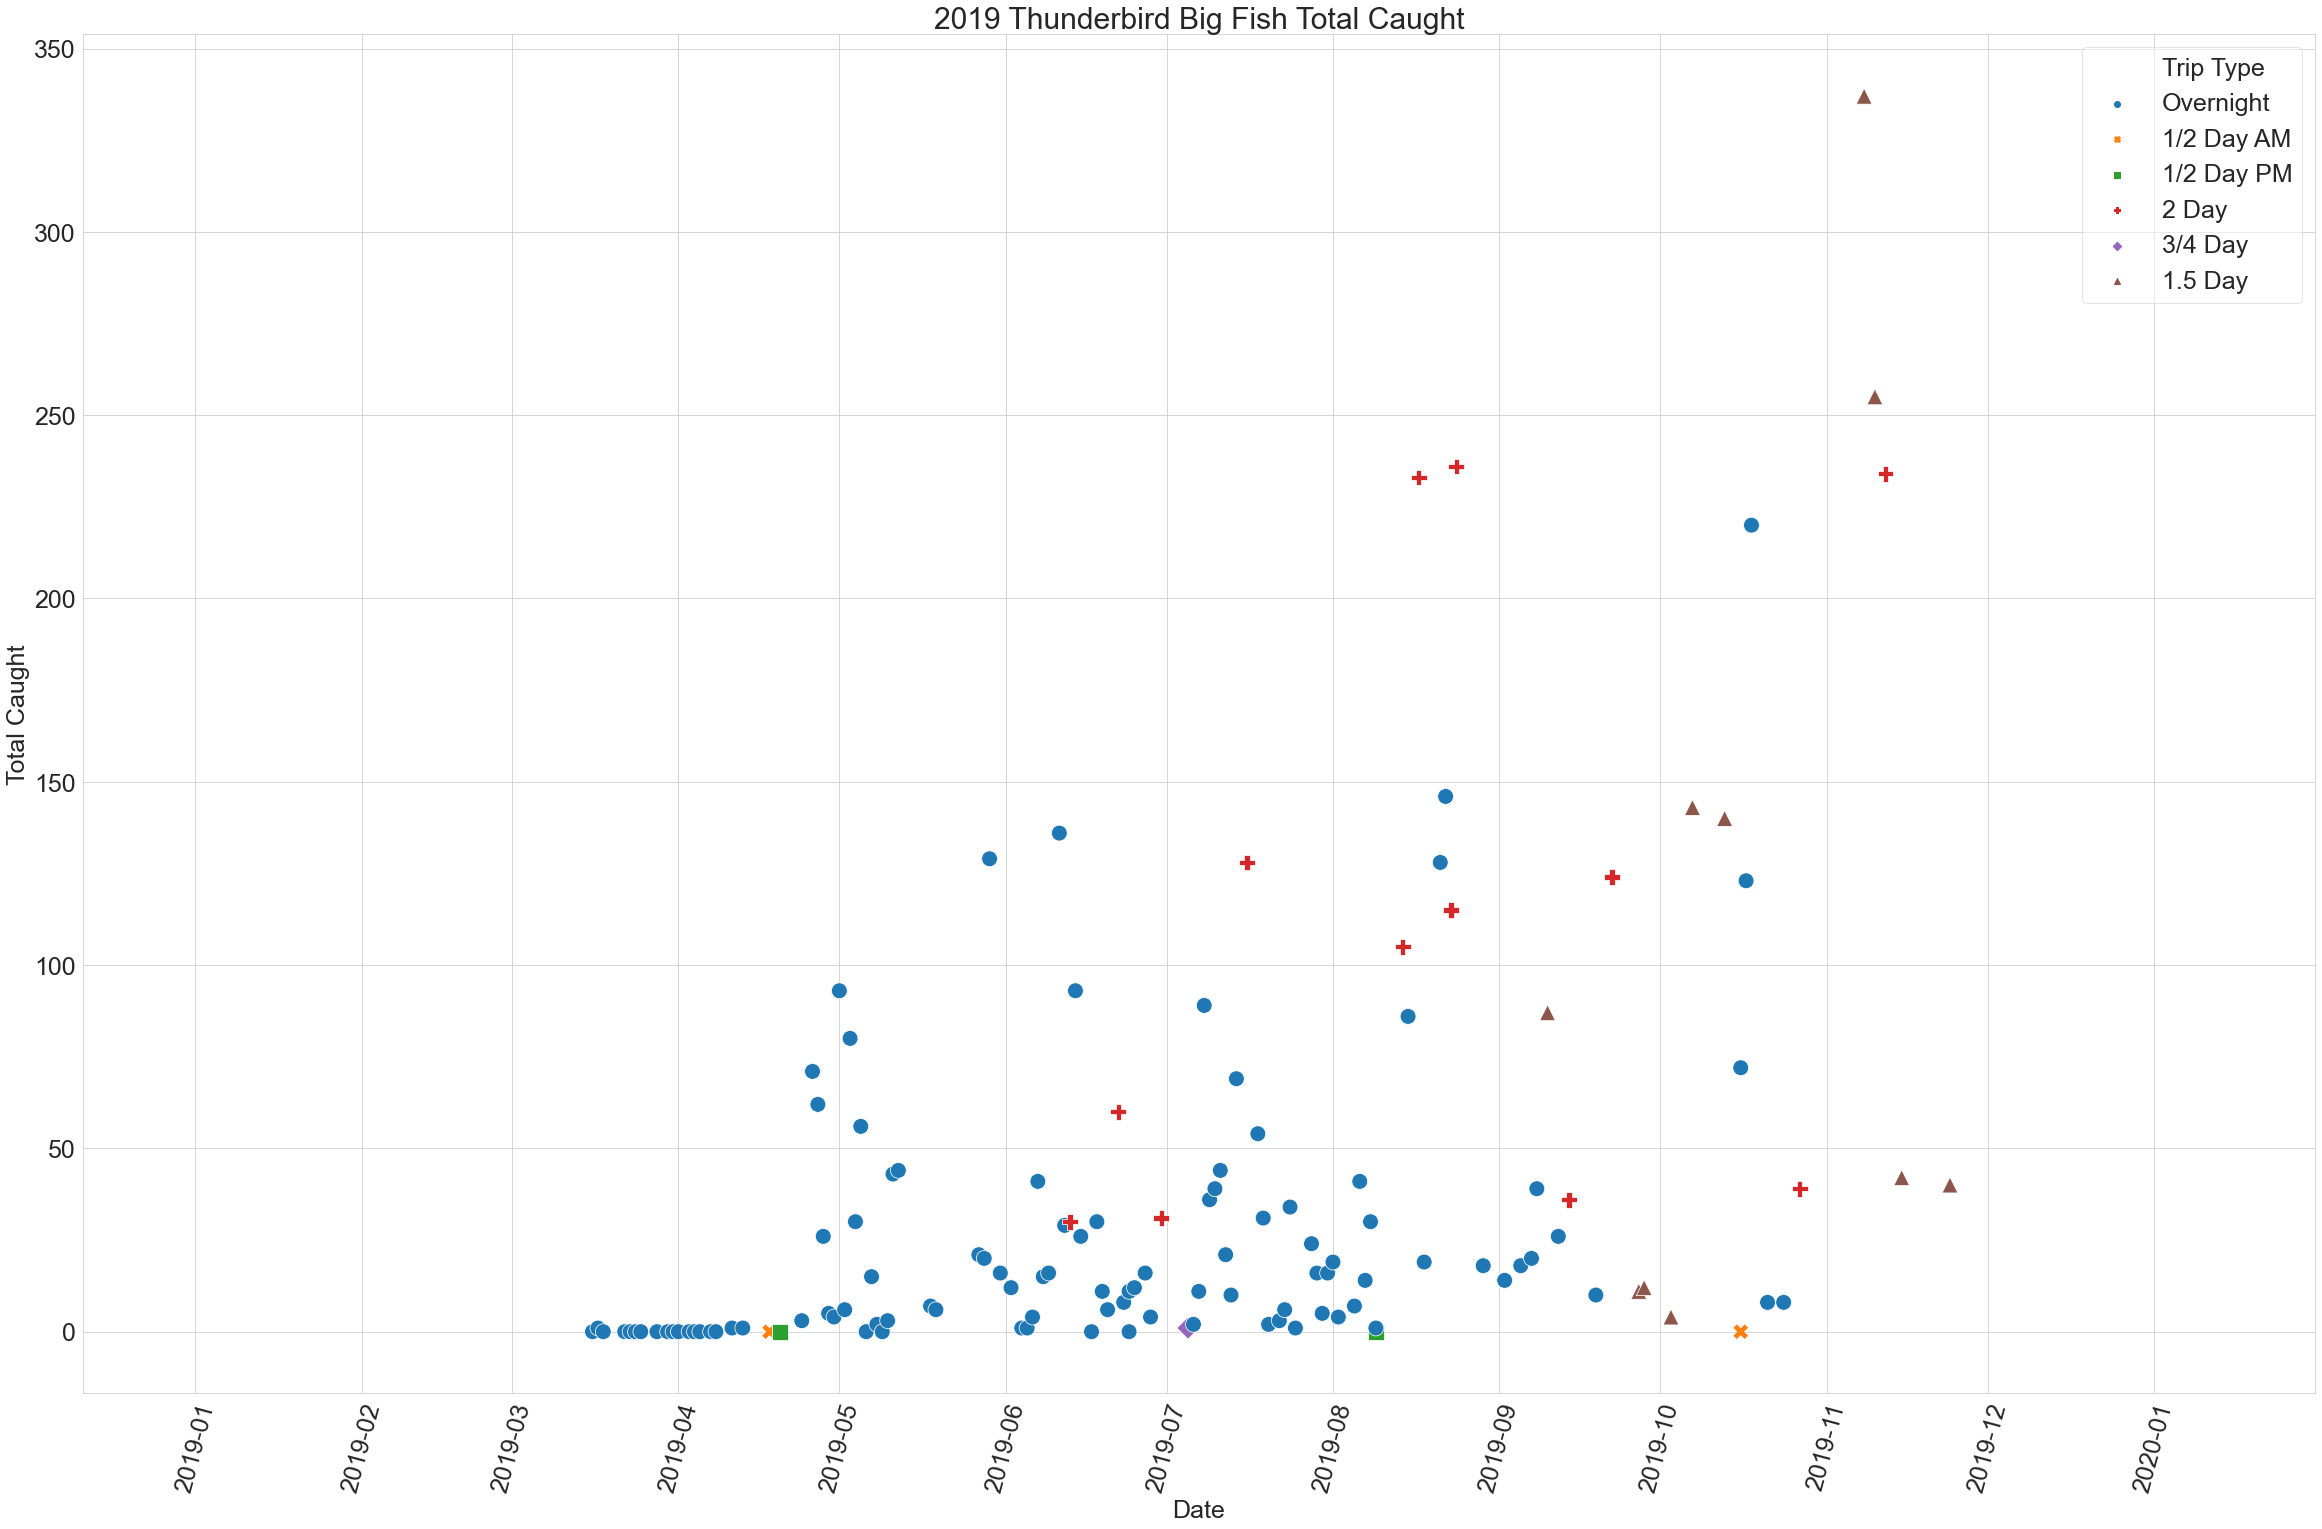

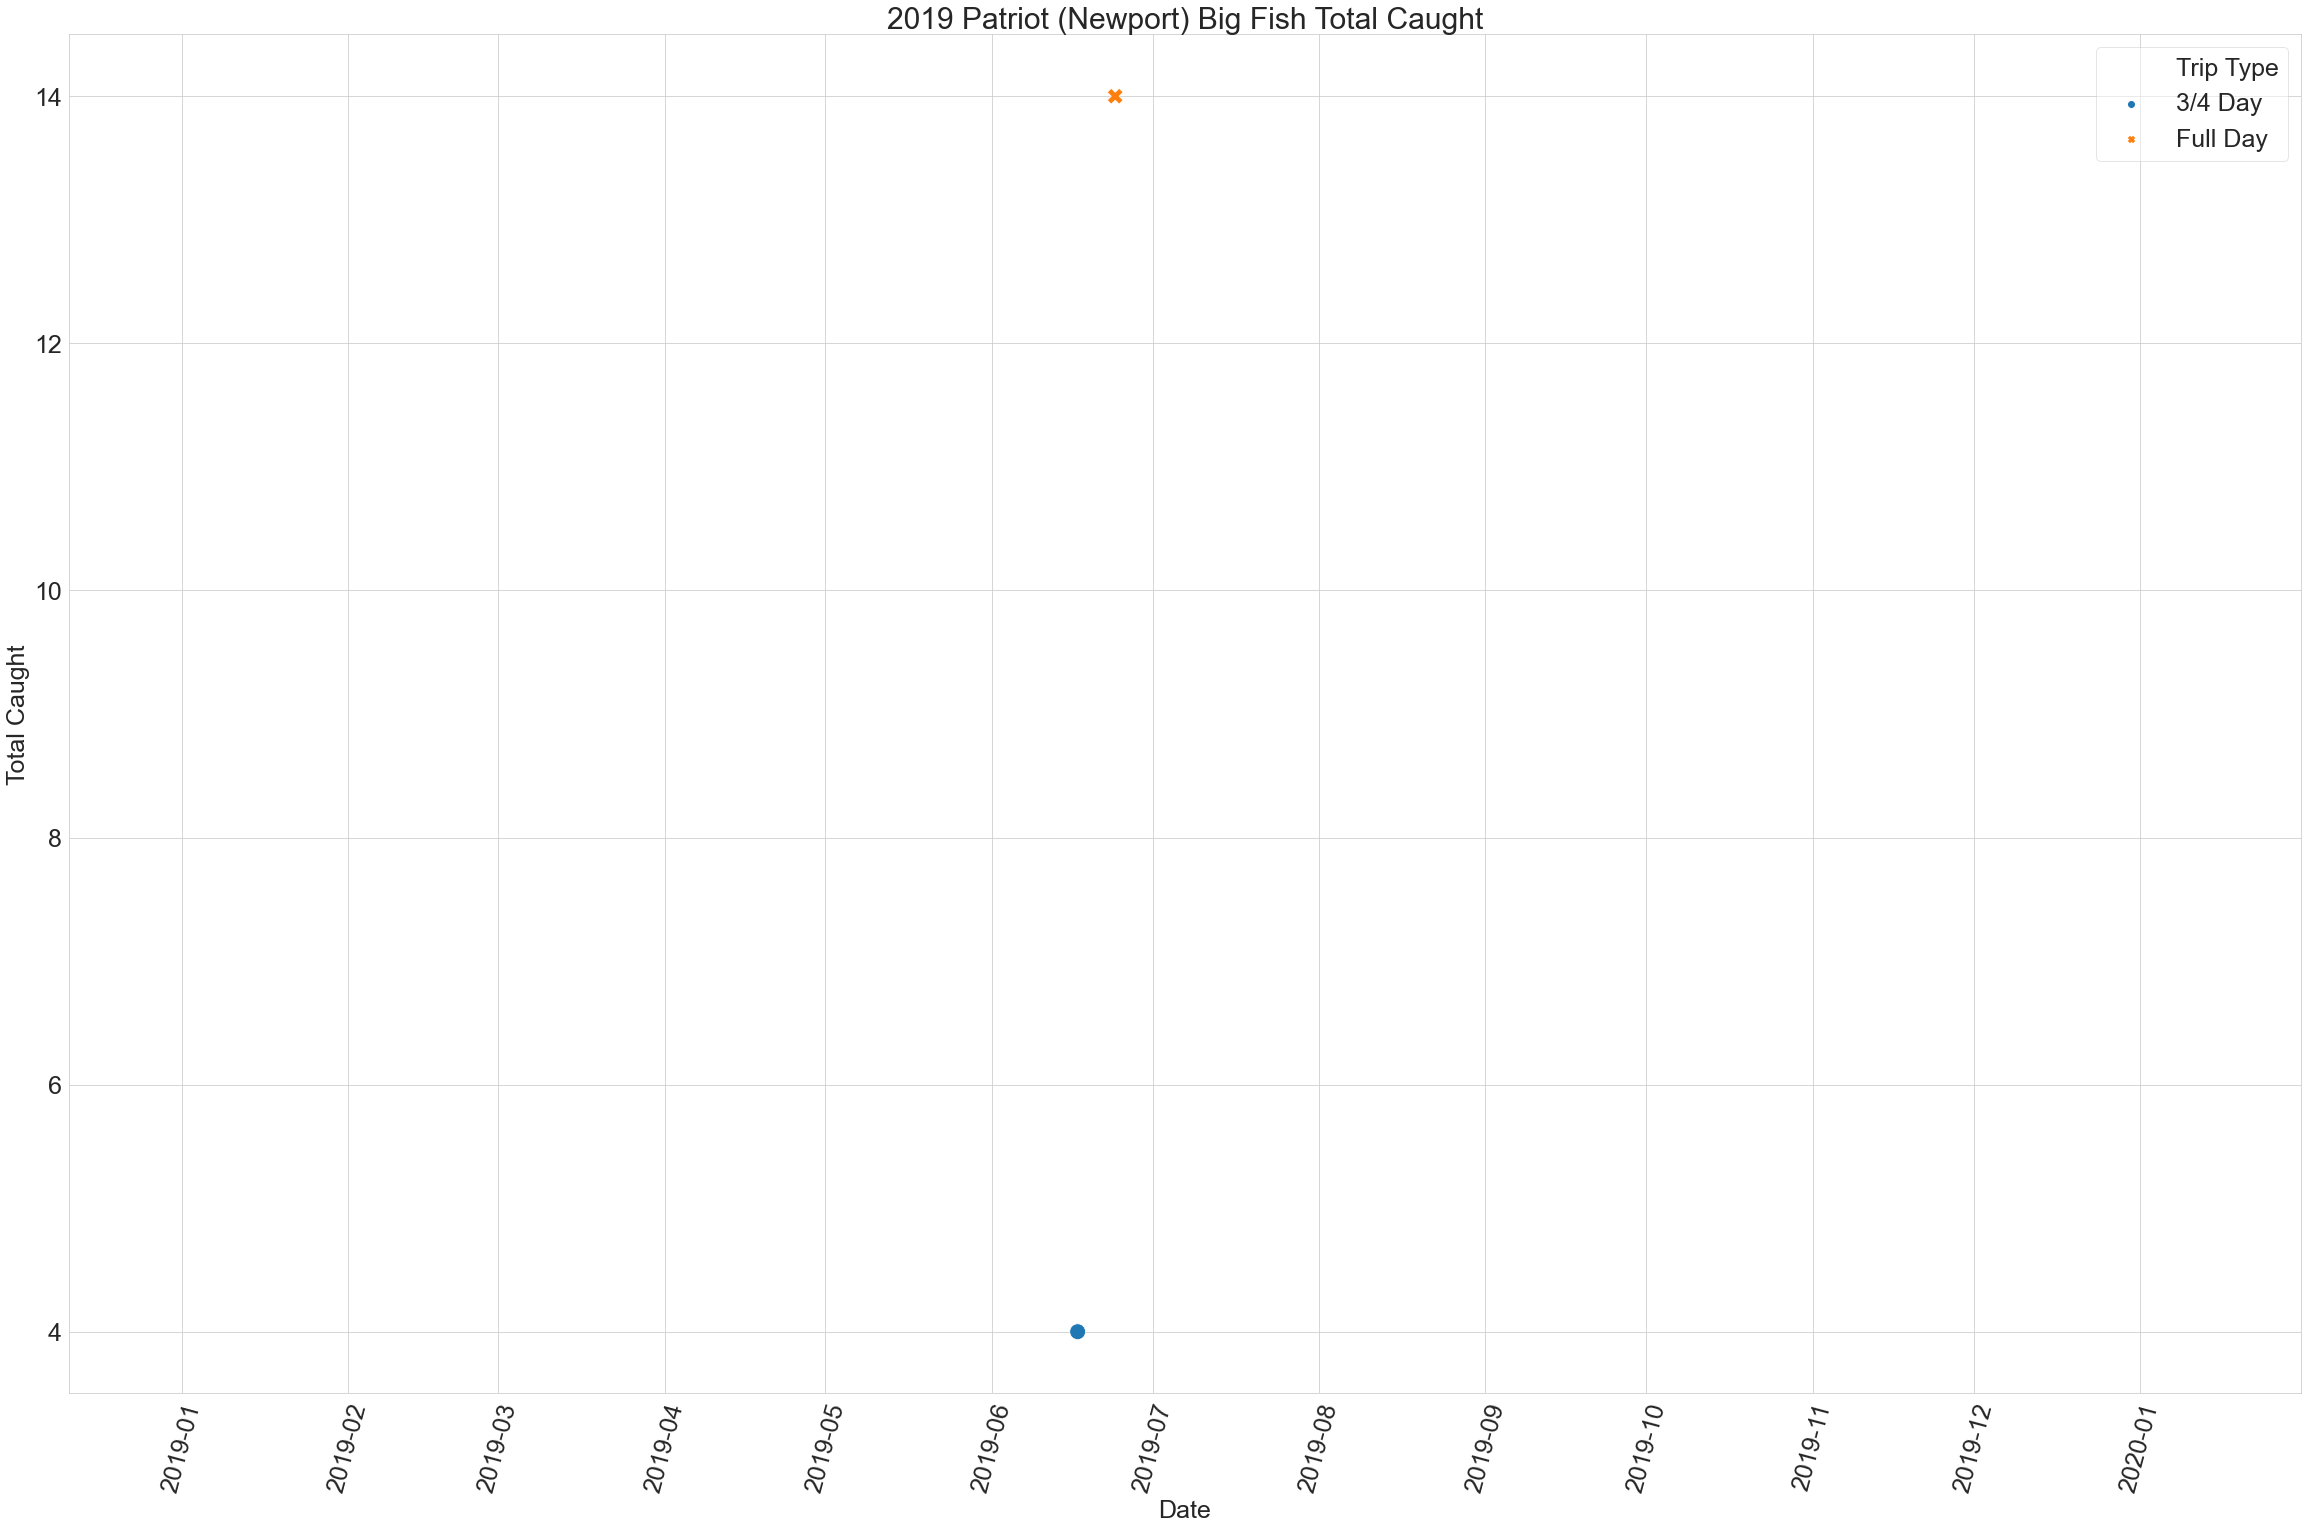

In [13]:
for boat in daveysBig2019.Boat.unique():
    #sbn.set_style('whitegrid')
    plt.rcParams.update({'font.size':25})
    fig, ax = plt.subplots(figsize=(40,25))
    chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysBig2019[daveysBig2019.Boat==boat],
                            hue='Trip Type', style='Trip Type',s=250)
    ax.set_title('2019 '+ boat + ' Big Fish Total Caught')
    ax.legend(framealpha=0.5)
    chart.set_xticklabels(labels=daveysBig2019.Date.unique(),rotation=75)
    ax.set_xlim([daveysBig2019['Date'].iloc[0] - pd.DateOffset(months=1),
                 daveysBig2019['Date'].iloc[-1] + pd.DateOffset(months=1)])
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    figure = chart.get_figure()
    #figure.savefig('2019 '+ boat + ' Big Fish Total Caught')

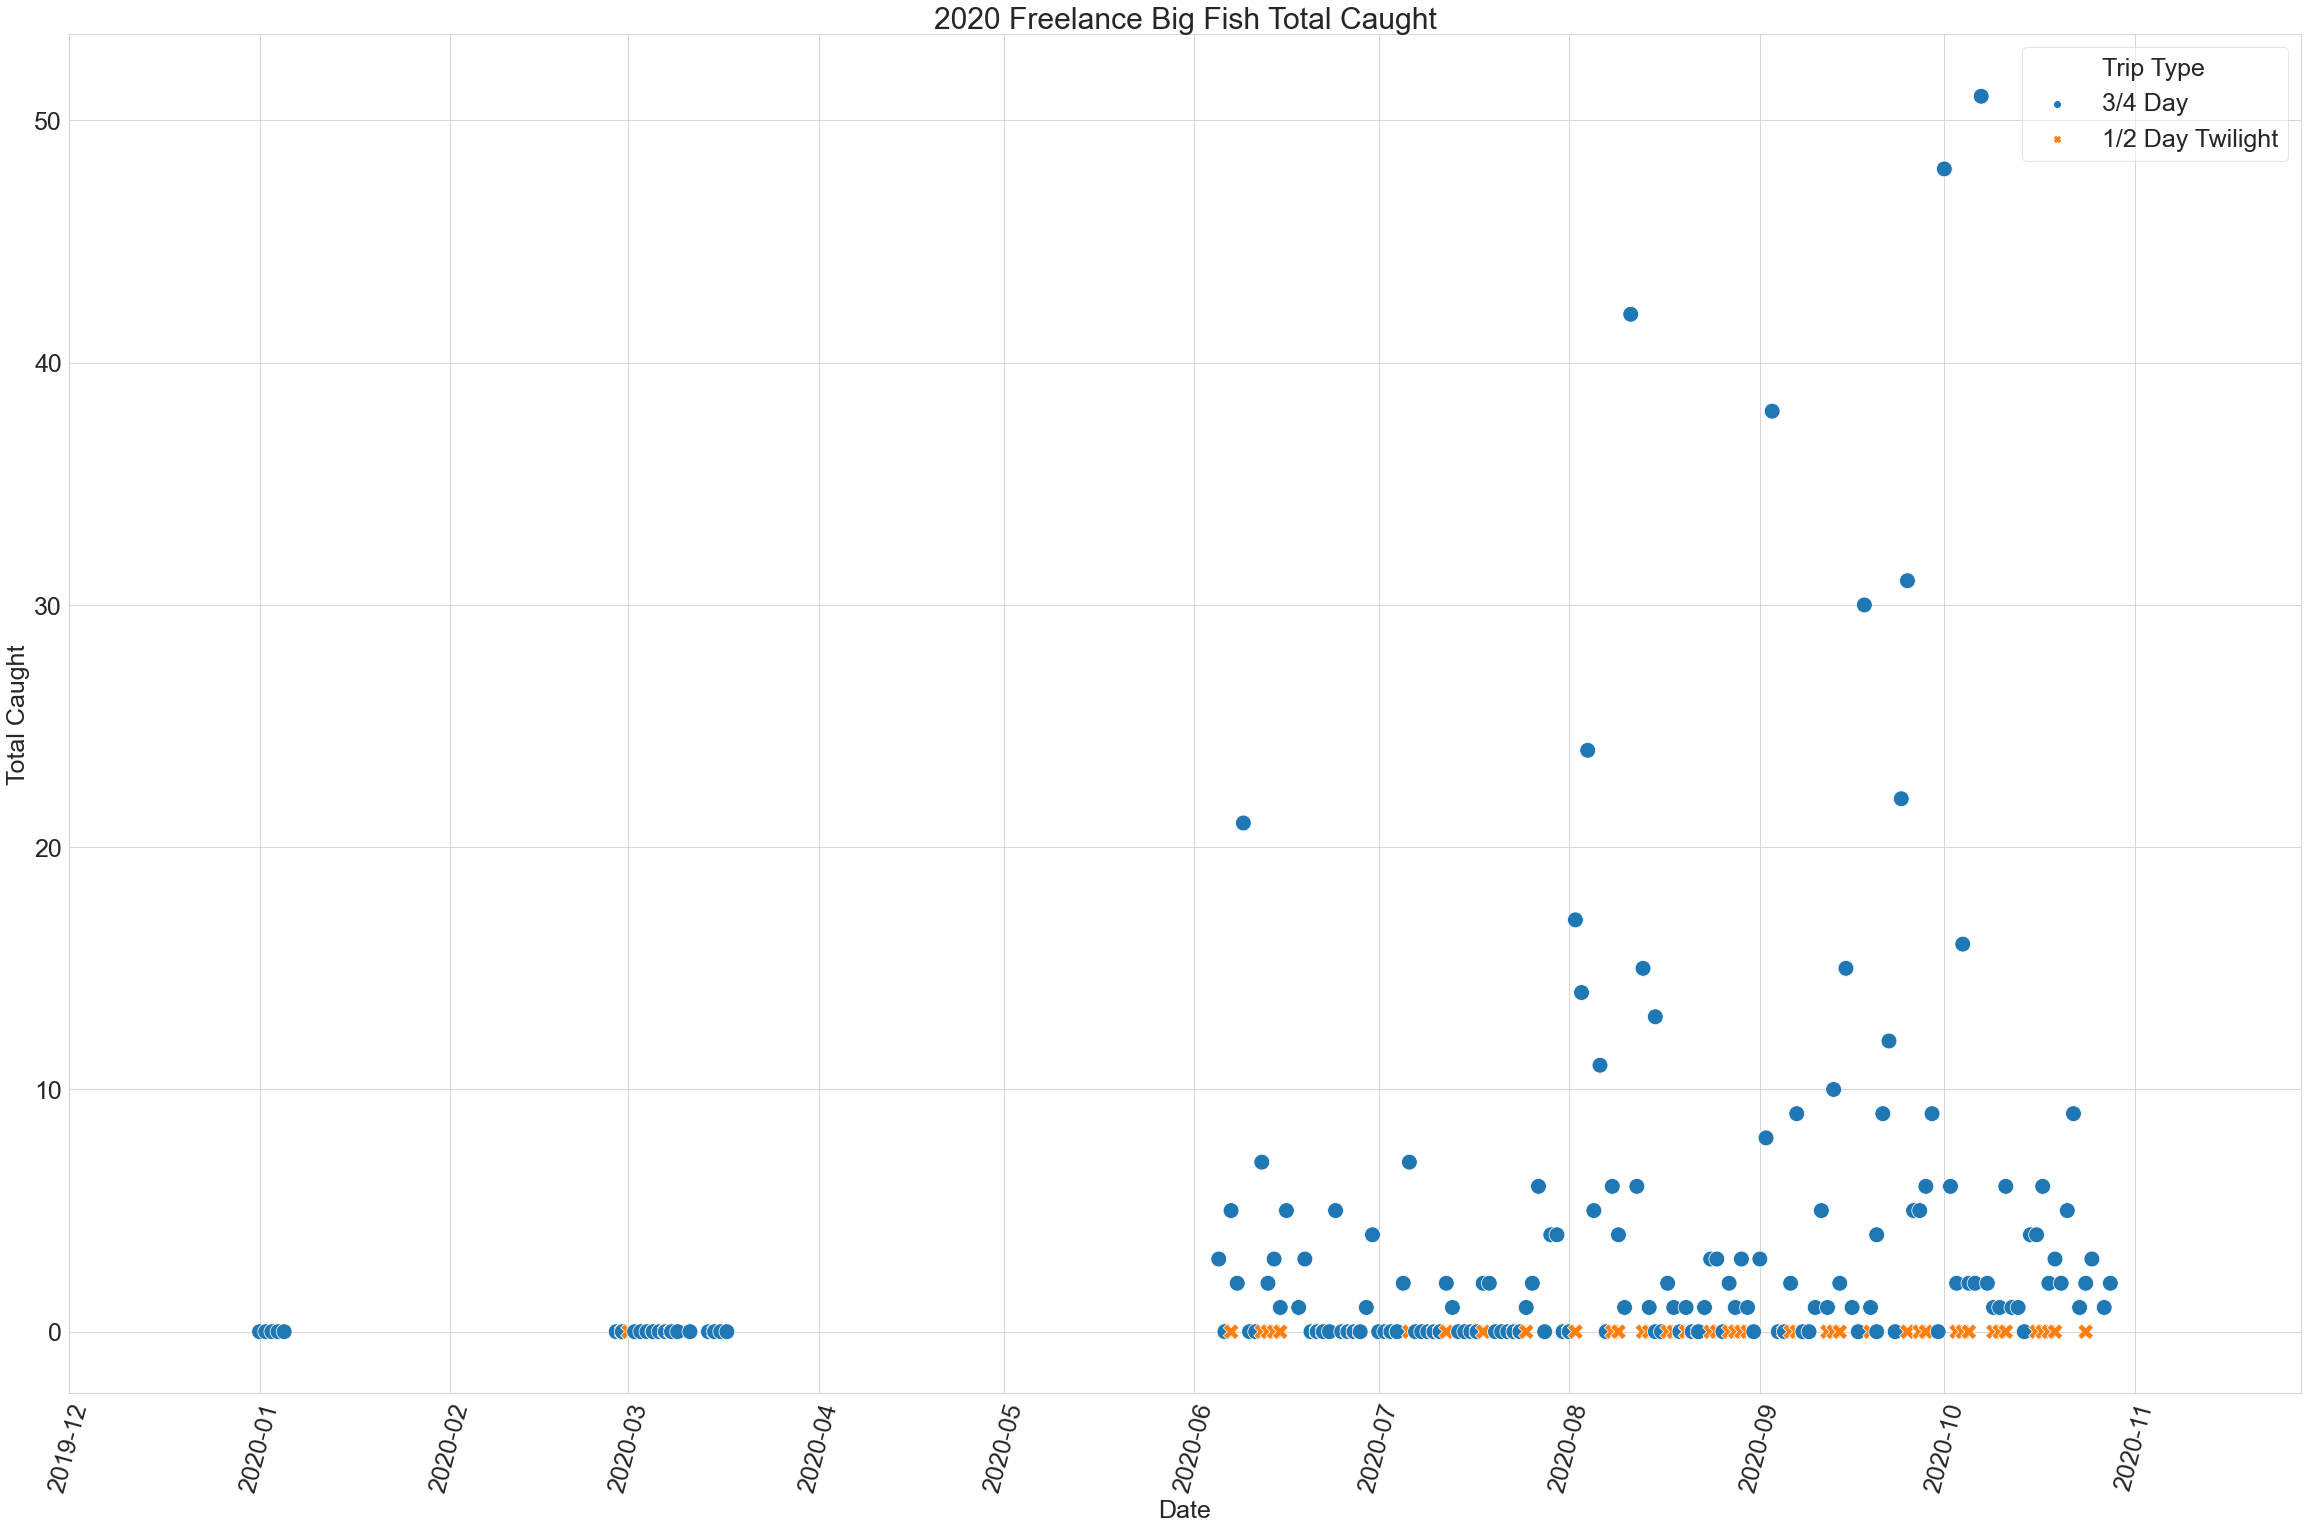

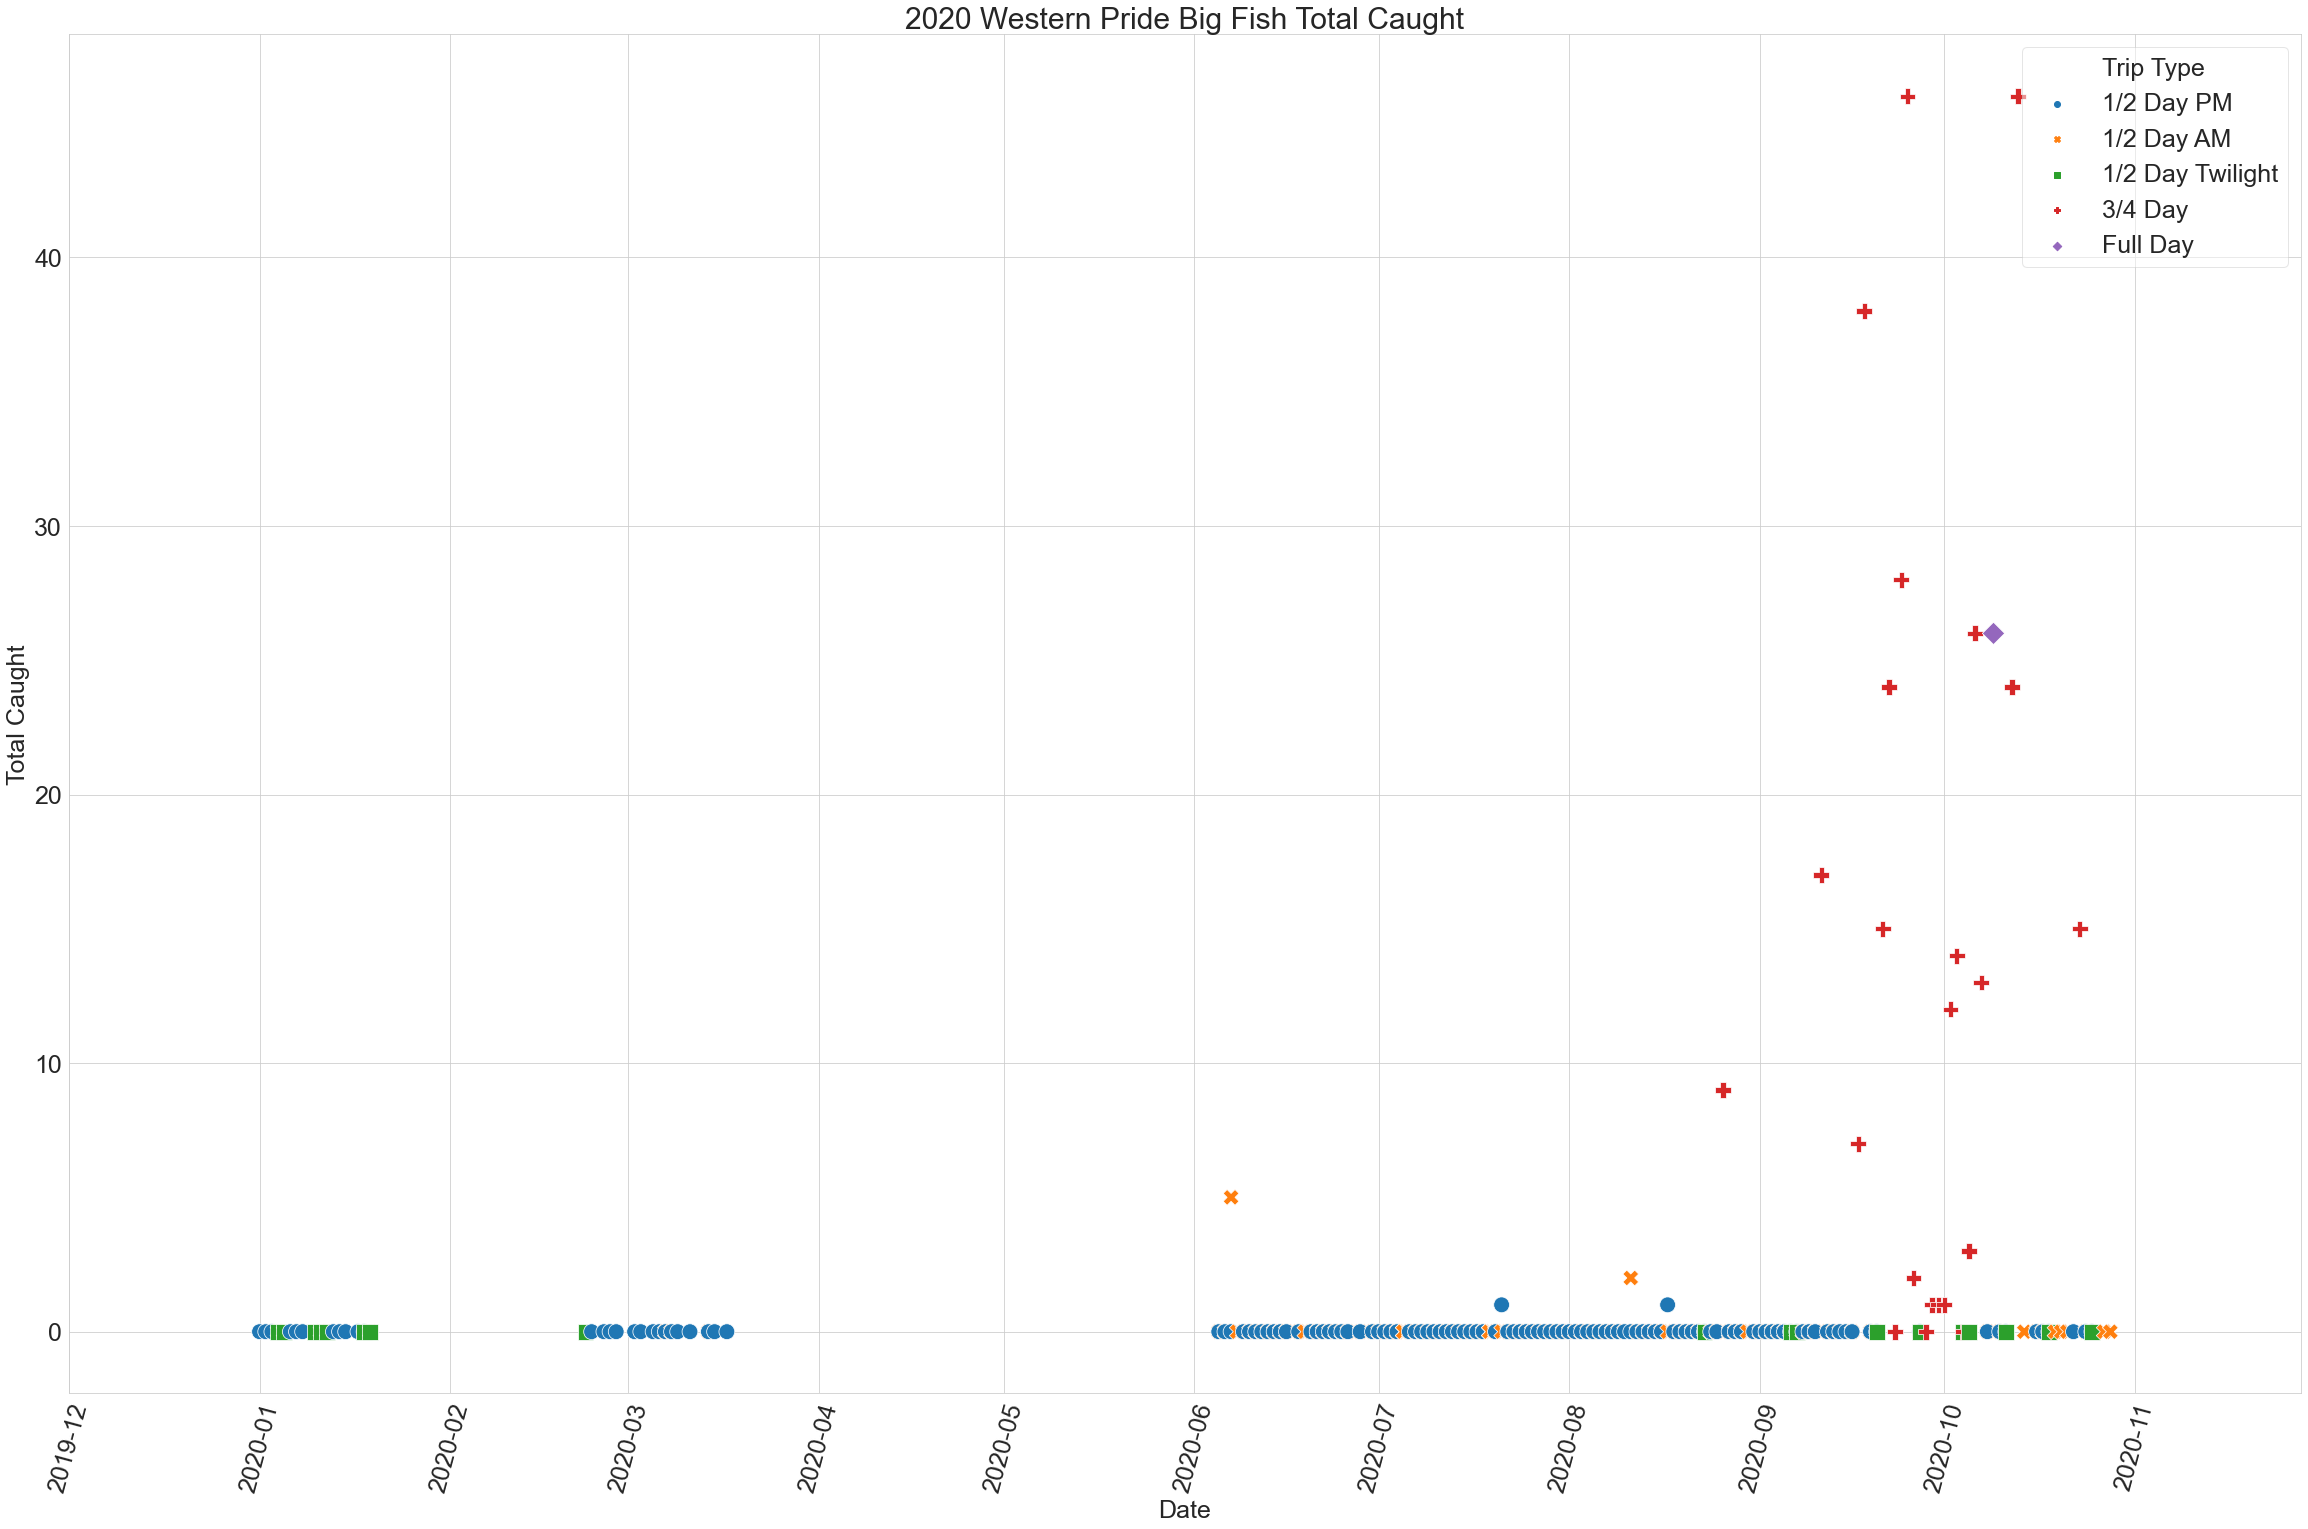

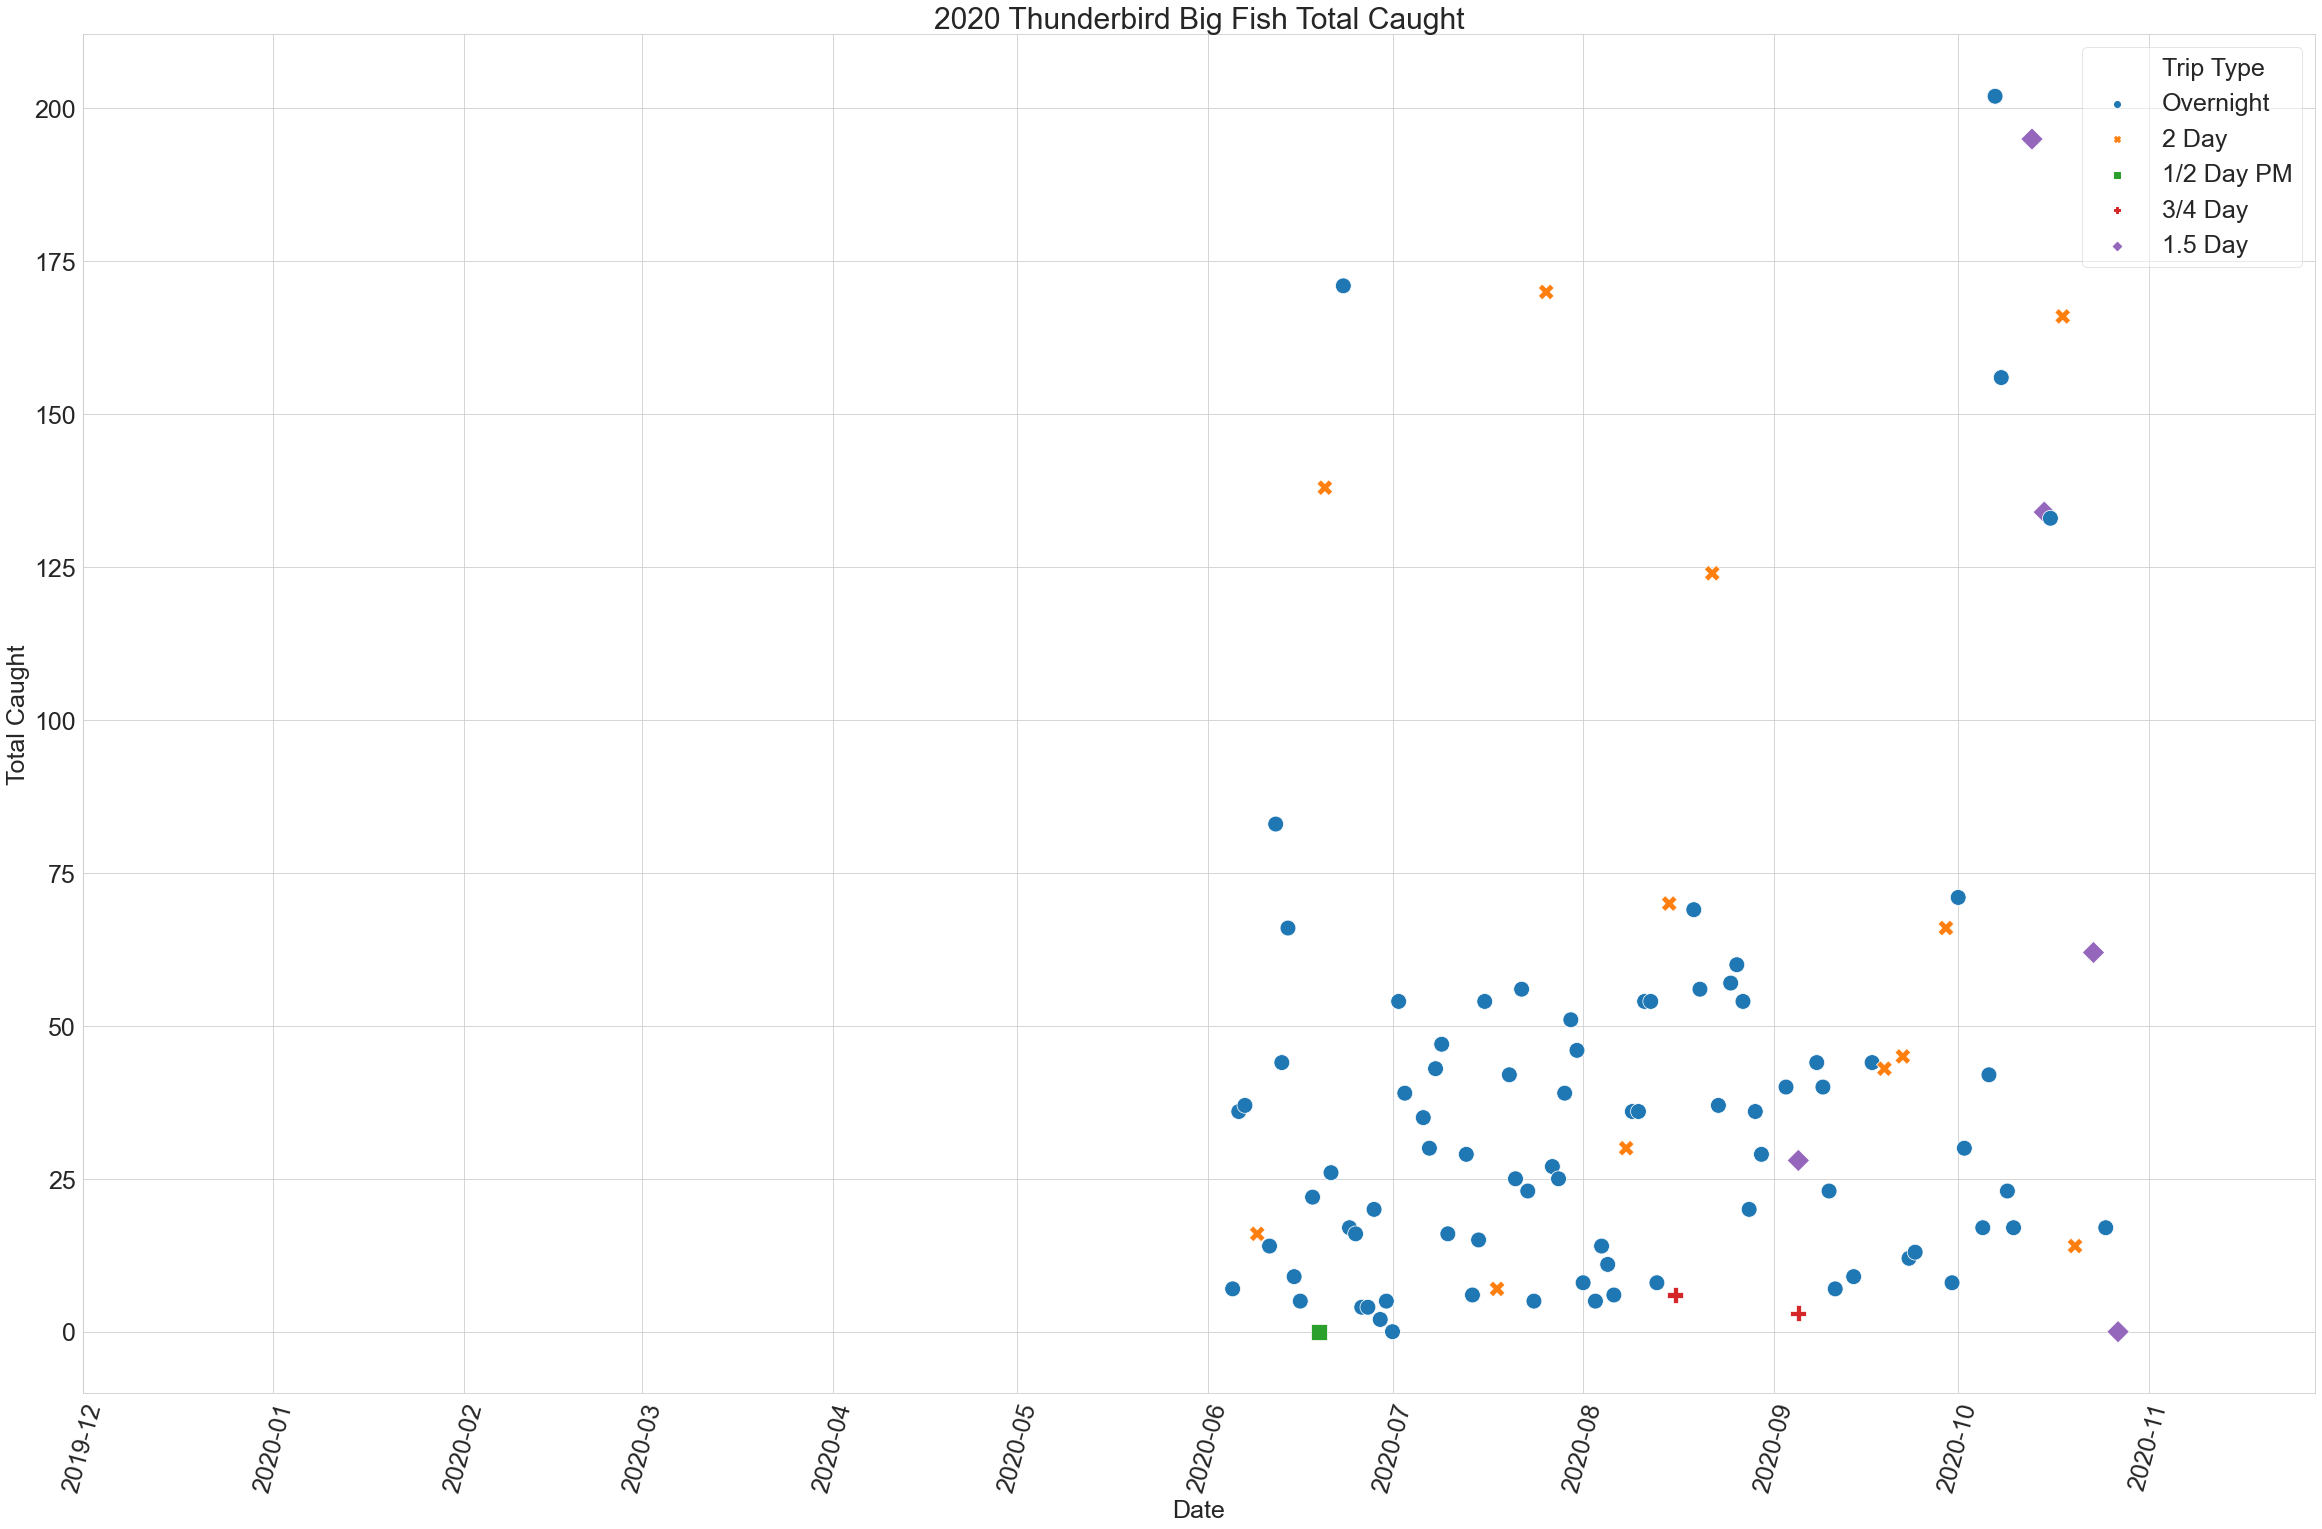

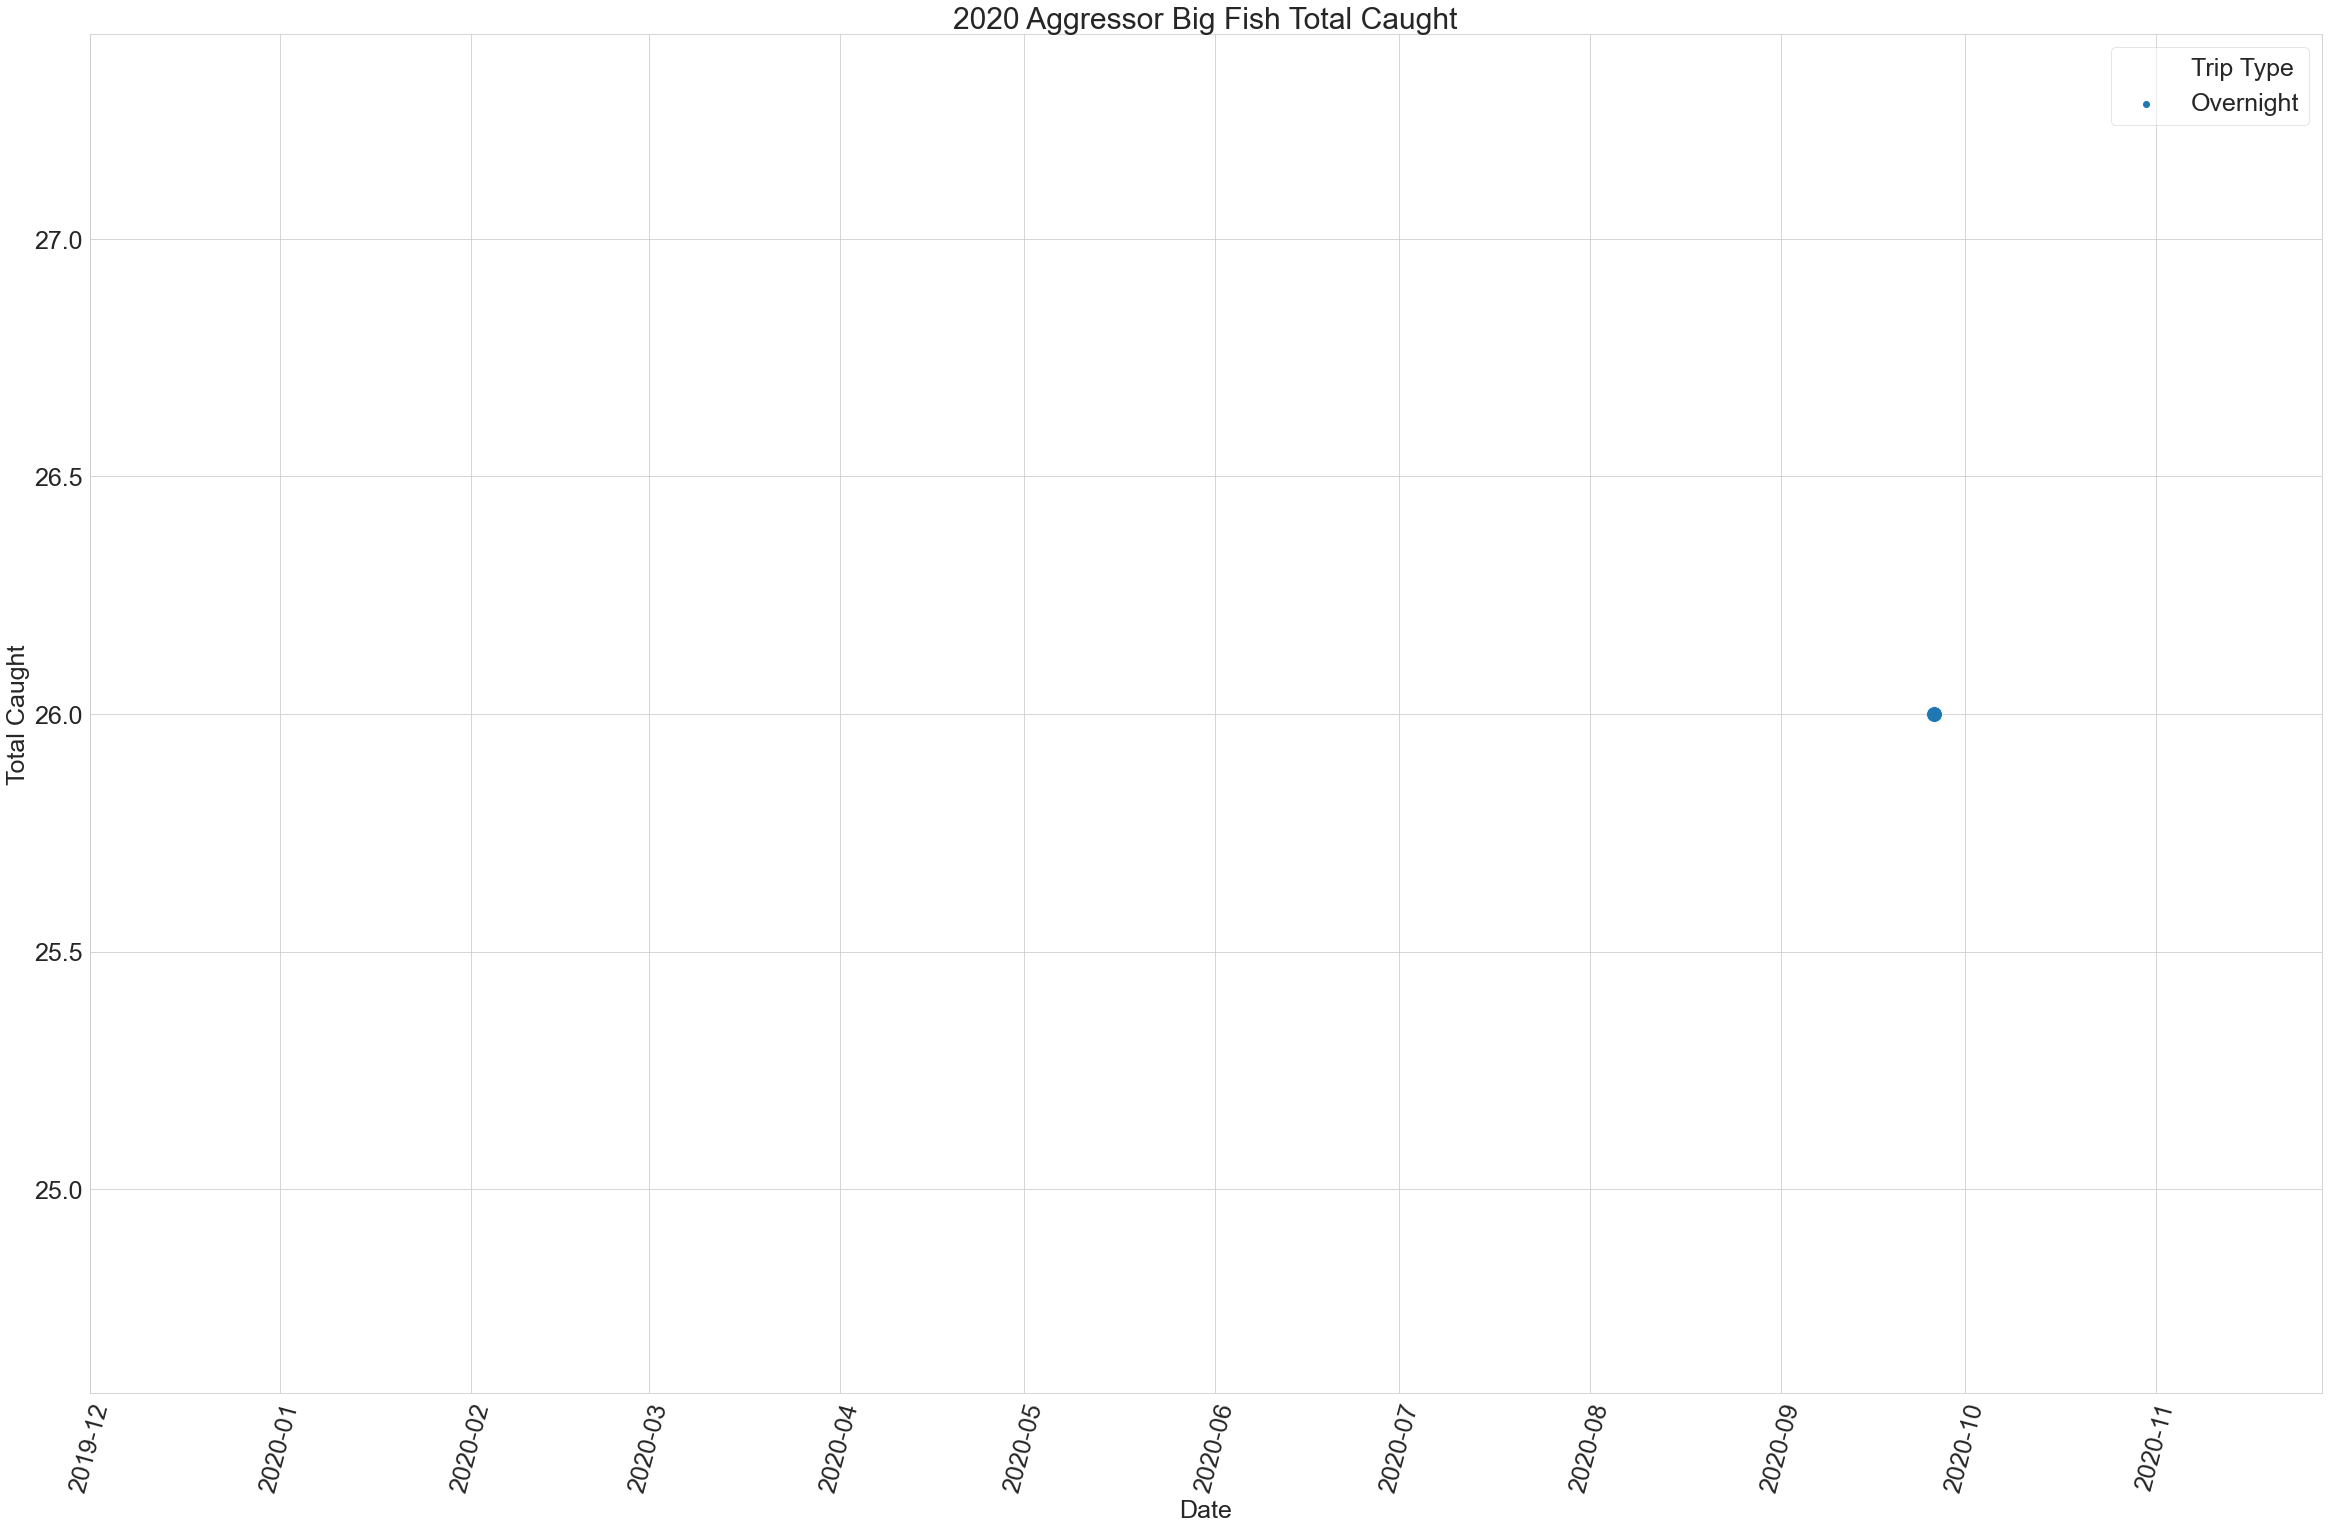

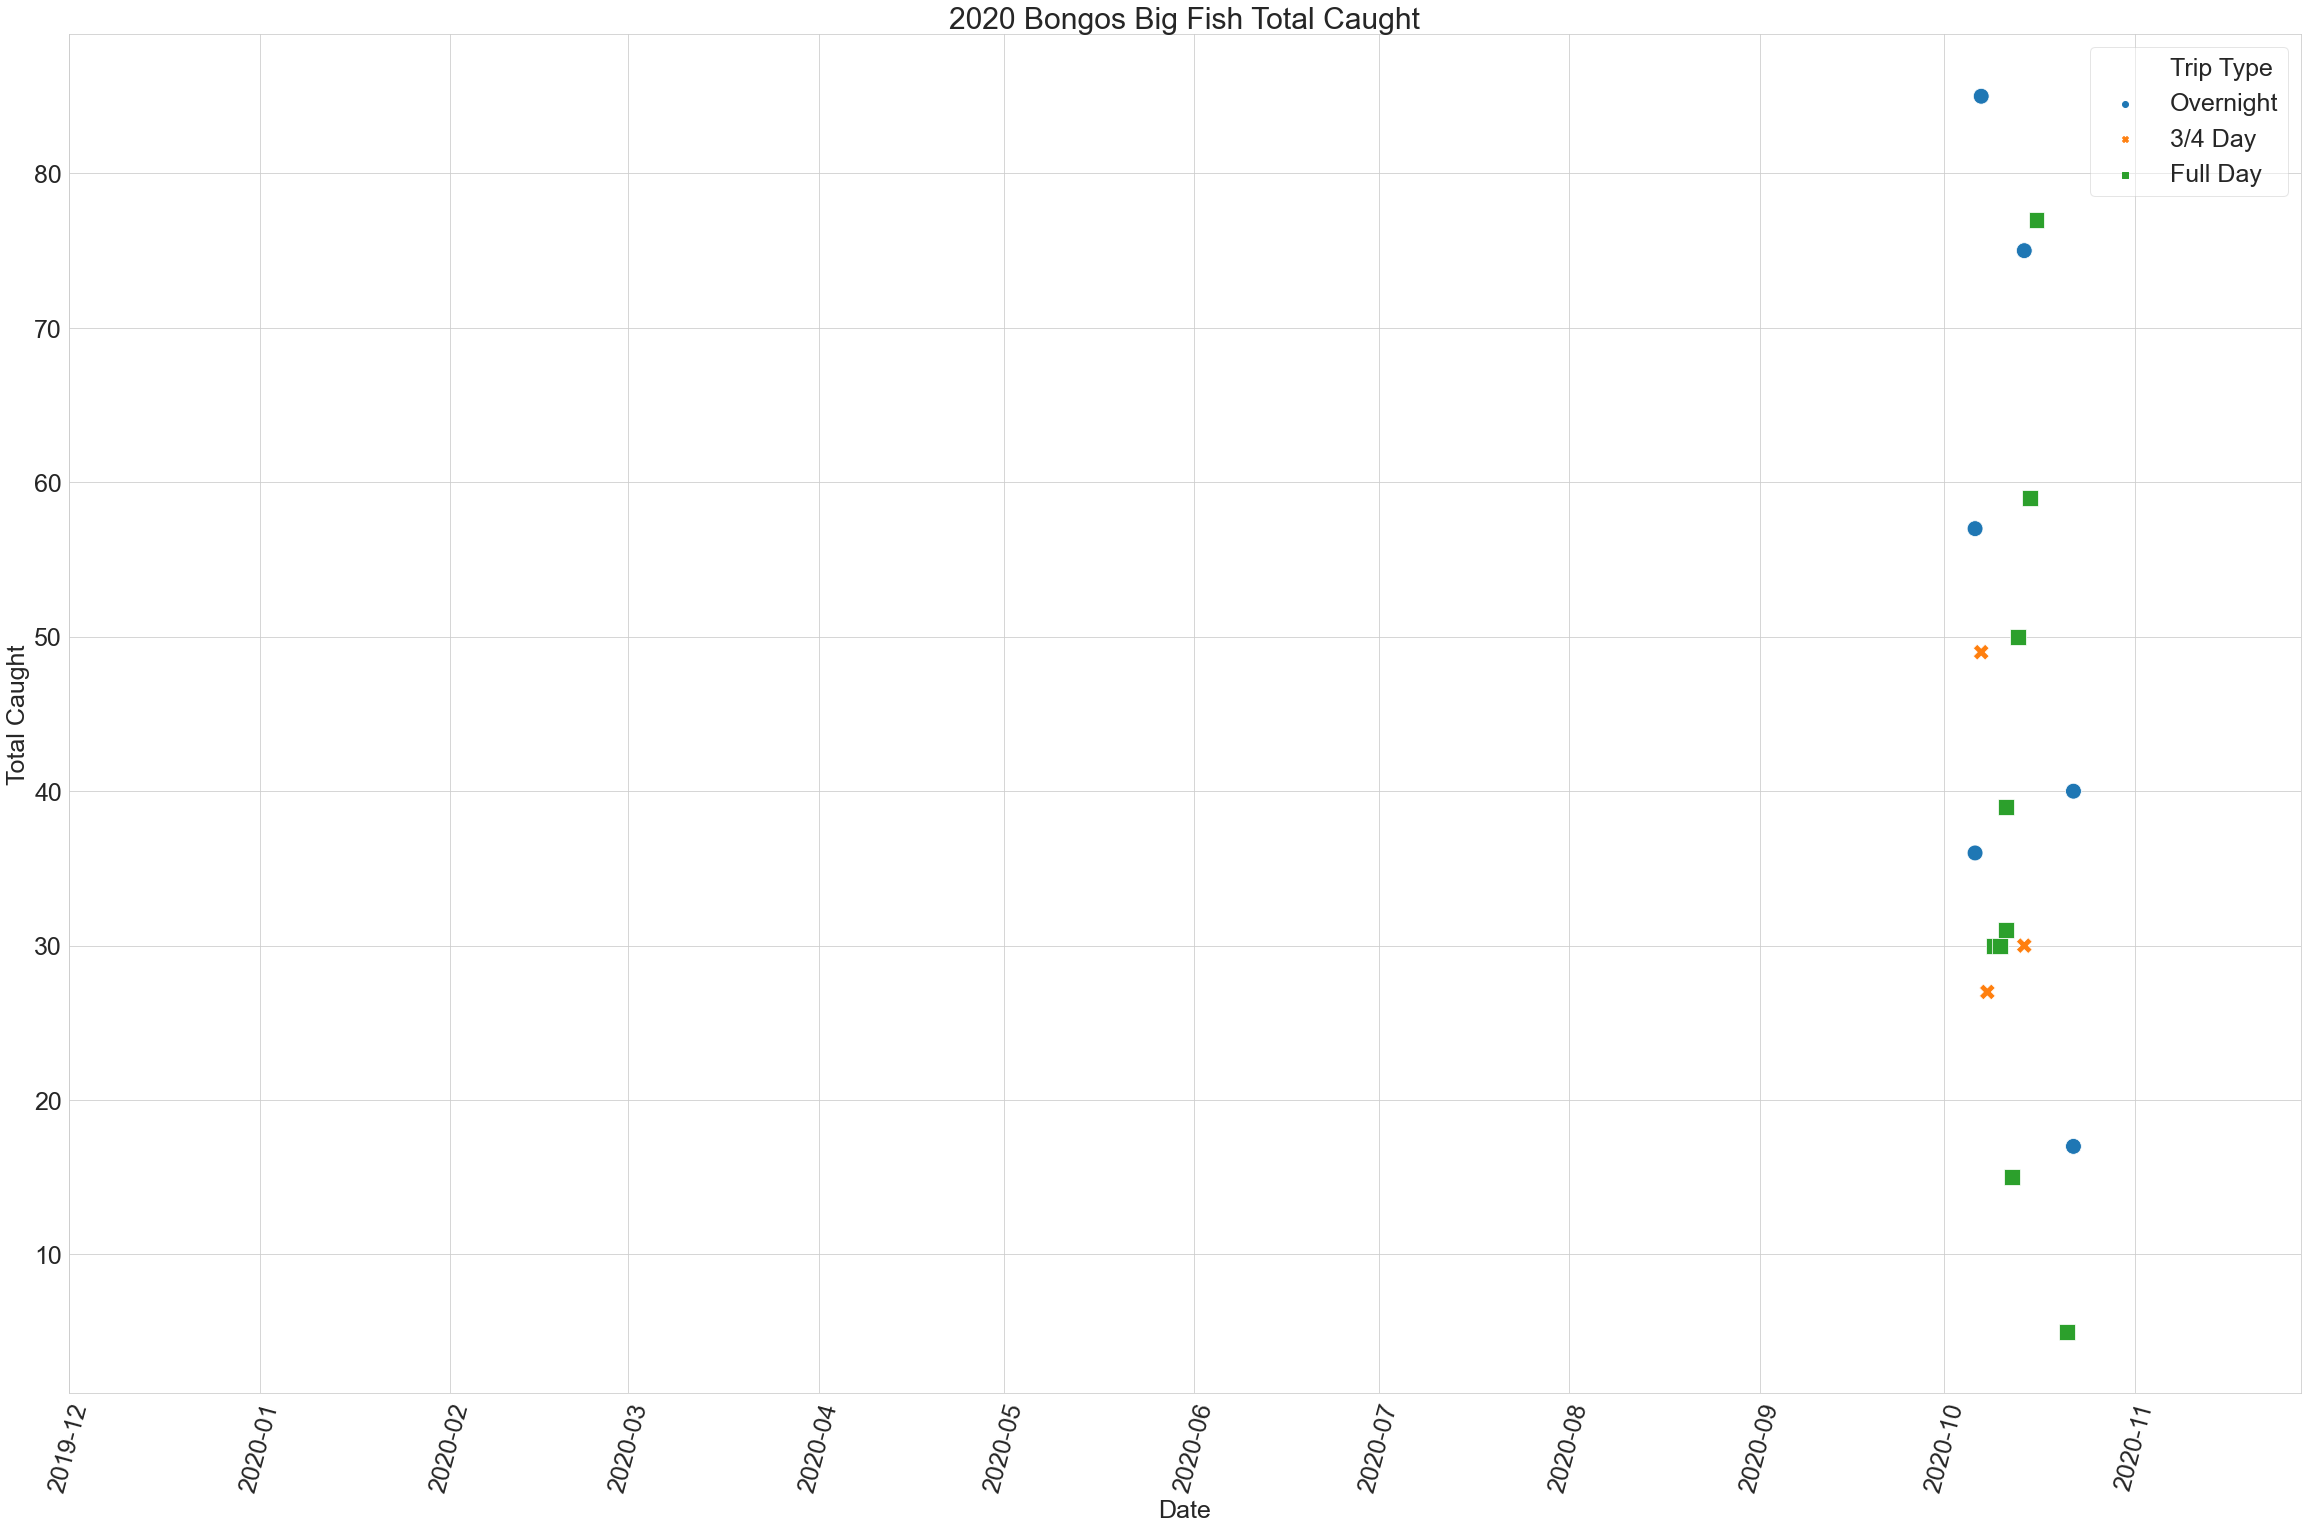

In [14]:
for boat in daveysBig2020.Boat.unique():
    #sbn.set_style('whitegrid')
    plt.rcParams.update({'font.size':25})
    fig, ax = plt.subplots(figsize=(40,25))
    chart = sbn.scatterplot(x='Date',y='Total Caught',data=daveysBig2020[daveysBig2020.Boat==boat],
                            hue='Trip Type', style='Trip Type',s=250)
    ax.set_title('2020 '+ boat + ' Big Fish Total Caught')
    ax.legend(framealpha=0.5)
    chart.set_xticklabels(labels=daveysBig2020.Date.unique(),rotation=75)
    ax.set_xlim([daveysBig2020['Date'].iloc[0] - pd.DateOffset(months=1),
                 daveysBig2020['Date'].iloc[-1] + pd.DateOffset(months=1)])
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    figure = chart.get_figure()
    #figure.savefig('2020 '+ boat + ' Big Fish Total Caught')

In [15]:
print('Daveys Locker 2019 Big Fish Averages:')
print('-------------------------------------')
for boat in daveysBig2019.Boat.unique():
    for tripType in daveysBig2019['Trip Type'].unique():
        print(boat + " " + tripType + ": " + 
             str(daveysBig2019.loc[(daveysBig2019.Boat == boat) & (daveysBig2019['Trip Type'] == tripType)].Average.sum() /
                 len(daveysBig2019.loc[(daveysBig2019.Boat == boat) & (daveysBig2019['Trip Type'] == tripType)].index)))
print('\nDaveys Locker 2020 Big Fish Averages:')
print('-------------------------------------')
for boat in daveysBig2020.Boat.unique():
    for tripType in daveysBig2020['Trip Type'].unique():
        print(boat + " " + tripType + ": " + 
             str(daveysBig2020.loc[(daveysBig2020.Boat == boat) & (daveysBig2020['Trip Type'] == tripType)].Average.sum() /
             len(daveysBig2020.loc[(daveysBig2020.Boat == boat) & (daveysBig2020['Trip Type'] == tripType)].index)))

Daveys Locker 2019 Big Fish Averages:
-------------------------------------
Western Pride 1/2 Day PM: 0.0059475251470715515
Western Pride 1/2 Day Twilight: 0.0
Western Pride 1/2 Day AM: 0.00029708853238265005
Western Pride 3/4 Day: 0.1310734099351253
Western Pride Full Day: nan
Western Pride Overnight: nan
Western Pride 2 Day: nan
Western Pride 1.5 Day: nan
Bongos 1/2 Day PM: 0.041666666666666664
Bongos 1/2 Day Twilight: 0.0
Bongos 1/2 Day AM: 0.05555555555555555
Bongos 3/4 Day: 0.38571428571428573
Bongos Full Day: 1.0797727272727273
Bongos Overnight: 1.75
Bongos 2 Day: nan
Bongos 1.5 Day: nan
Freelance 1/2 Day PM: nan
Freelance 1/2 Day Twilight: 0.0
Freelance 1/2 Day AM: nan
Freelance 3/4 Day: 0.07033779149065003
Freelance Full Day: nan
Freelance Overnight: nan
Freelance 2 Day: nan
Freelance 1.5 Day: nan
Thunderbird 1/2 Day PM: 0.0
Thunderbird 1/2 Day Twilight: nan
Thunderbird 1/2 Day AM: 0.0
Thunderbird 3/4 Day: 0.022222222222222223
Thunderbird Full Day: nan
Thunderbird Overnight: 0.

In [16]:
print('Daveys Locker 2019 Small Fish Averages:')
print('-------------------------------------')
for boat in daveysSmall2019.Boat.unique():
    for tripType in daveysSmall2019['Trip Type'].unique():
        print(boat + " " + tripType + ": " + 
             str(daveysSmall2019.loc[(daveysSmall2019.Boat == boat) & (daveysSmall2019['Trip Type'] == tripType)].Average.sum() /
                 len(daveysSmall2019.loc[(daveysSmall2019.Boat == boat) & (daveysSmall2019['Trip Type'] == tripType)].index)))
print('\nDaveys Locker 2020 Small Fish Averages:')
print('-------------------------------------')
for boat in daveysSmall2020.Boat.unique():
    for tripType in daveysSmall2020['Trip Type'].unique():
        print(boat + " " + tripType + ": " + 
             str(daveysSmall2020.loc[(daveysSmall2020.Boat == boat) & (daveysSmall2020['Trip Type'] == tripType)].Average.sum() /
             len(daveysSmall2020.loc[(daveysSmall2020.Boat == boat) & (daveysSmall2020['Trip Type'] == tripType)].index)))

Daveys Locker 2019 Small Fish Averages:
-------------------------------------
Western Pride 1/2 Day PM: 3.6652850586470587
Western Pride 1/2 Day Twilight: 2.1071913286197352
Western Pride 1/2 Day AM: 5.187229256987504
Western Pride 3/4 Day: 4.52744280576515
Western Pride Full Day: nan
Western Pride Overnight: nan
Western Pride 2 Day: nan
Western Pride 1.5 Day: nan
Bongos 1/2 Day PM: 4.383333333333334
Bongos 1/2 Day Twilight: 0.3333333333333333
Bongos 1/2 Day AM: 4.8388888888888895
Bongos 3/4 Day: 8.852380952380953
Bongos Full Day: 5.816931818181819
Bongos Overnight: 4.249999999999999
Bongos 2 Day: nan
Bongos 1.5 Day: nan
Freelance 1/2 Day PM: nan
Freelance 1/2 Day Twilight: 2.372071589758366
Freelance 1/2 Day AM: nan
Freelance 3/4 Day: 4.080636760921909
Freelance Full Day: nan
Freelance Overnight: nan
Freelance 2 Day: nan
Freelance 1.5 Day: nan
Thunderbird 1/2 Day PM: 2.192267773741567
Thunderbird 1/2 Day Twilight: nan
Thunderbird 1/2 Day AM: 3.031297756586588
Thunderbird 3/4 Day: 0.6


[]

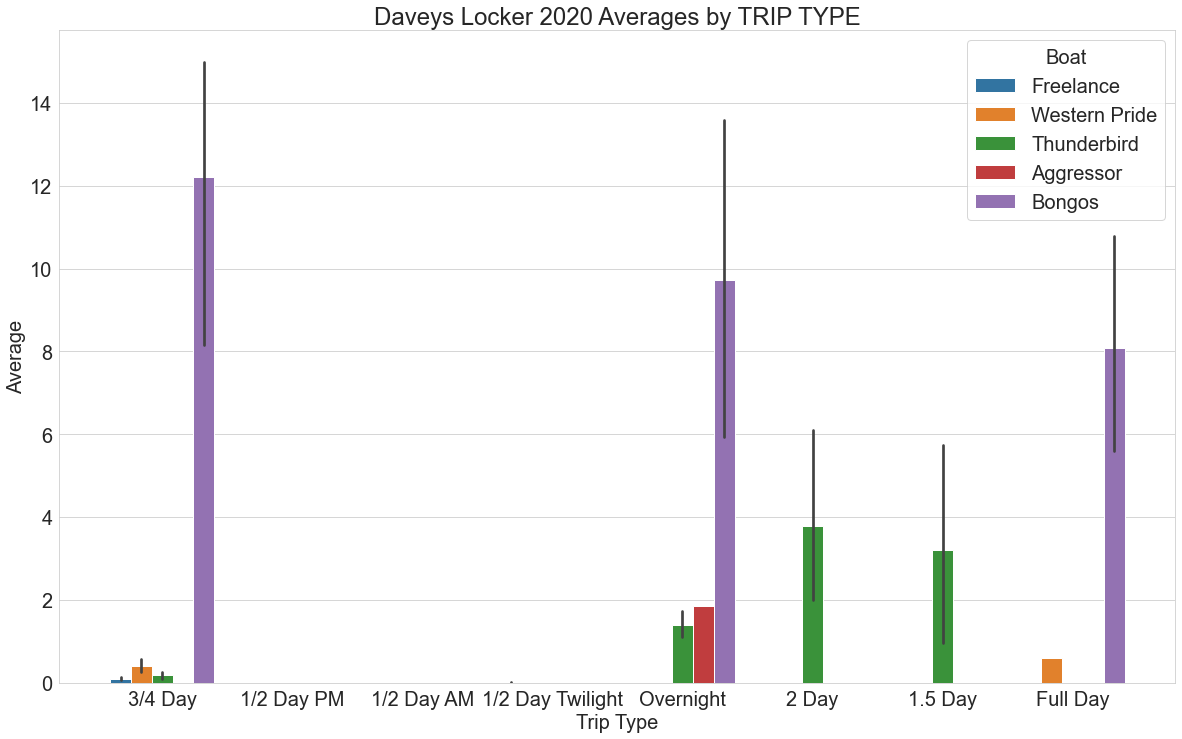

In [26]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(20,12))
ax = sbn.barplot(x="Trip Type",y="Average",data=daveysBig2020, hue="Boat")
ax.set_title('Daveys Locker 2020 Averages by TRIP TYPE')

plt.plot()
#figure.savefig("daveys 2019 Totals")

[]

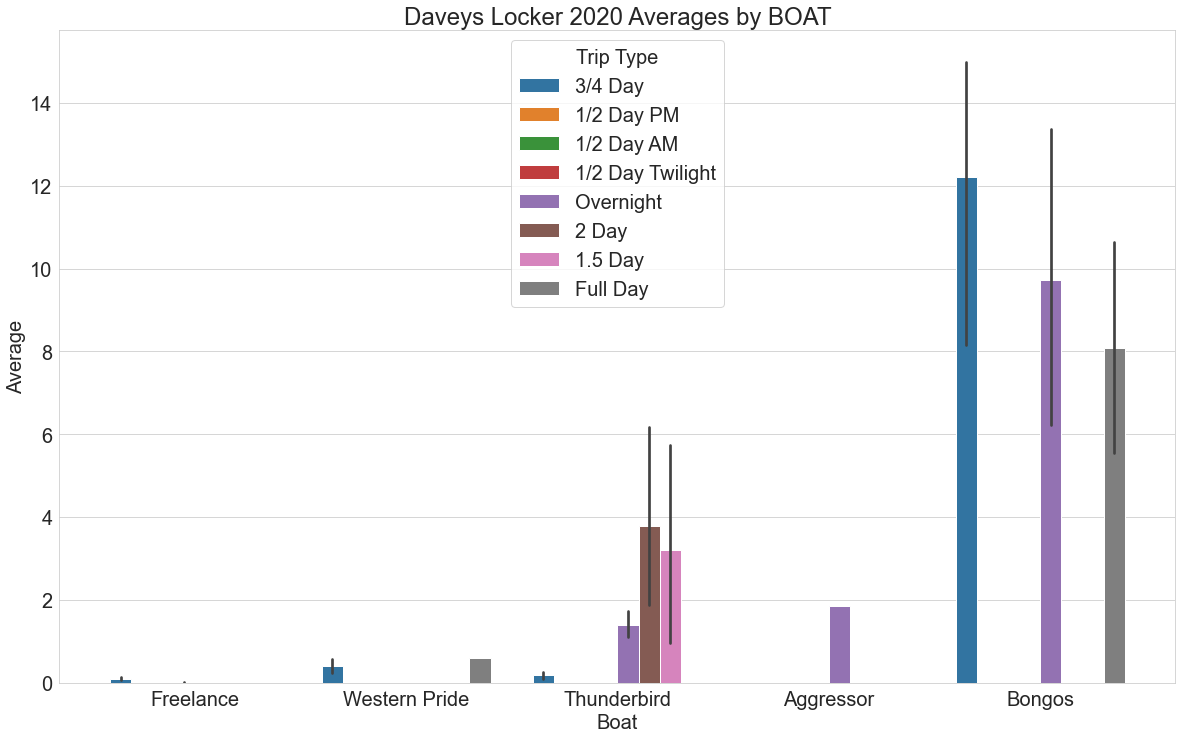

In [25]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(20,12))
ax = sbn.barplot(x="Boat",y="Average",data=daveysBig2020, hue="Trip Type")
ax.set_title('Daveys Locker 2020 Averages by BOAT')
plt.plot()

[]

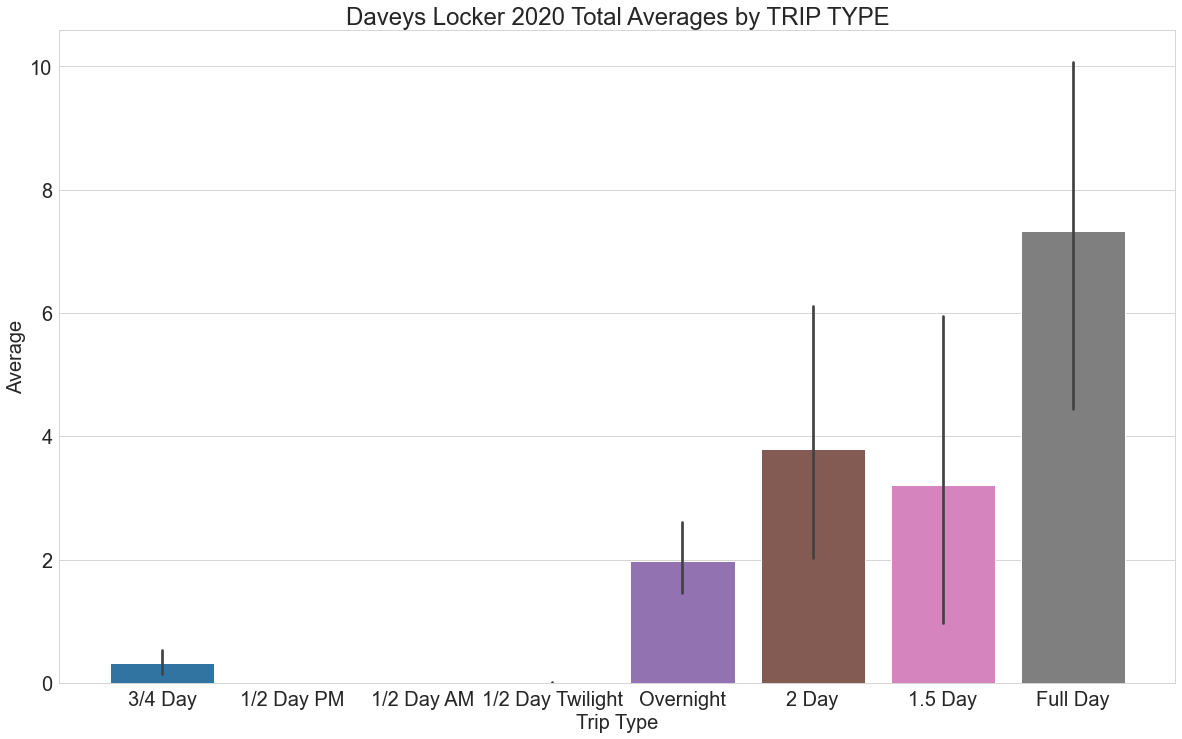

In [28]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(20,12))
ax = sbn.barplot(x="Trip Type",y="Average",data=daveysBig2020)
ax.set_title('Daveys Locker 2020 Total Averages by TRIP TYPE')
plt.plot()

[]

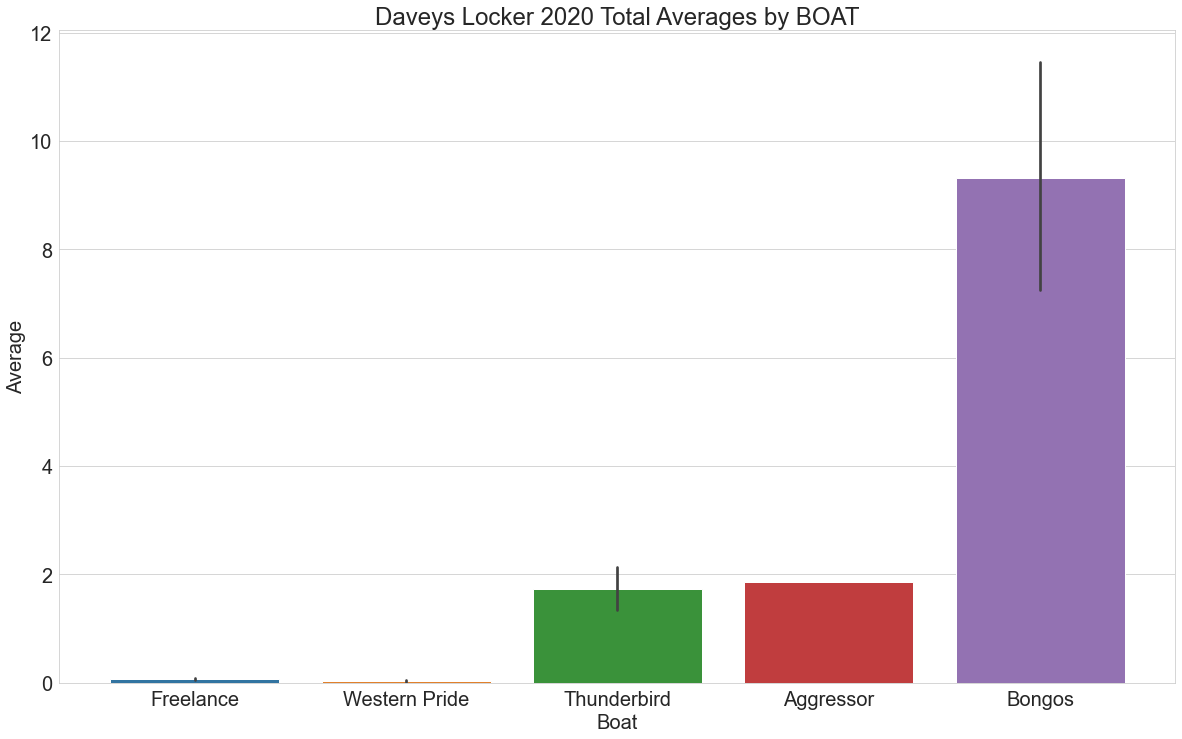

In [29]:
sbn.set_style('whitegrid')
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(20,12))
ax = sbn.barplot(x="Boat",y="Average",data=daveysBig2020)
ax.set_title('Daveys Locker 2020 Total Averages by BOAT')
plt.plot()